In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
import json

In [2]:
url = []
for p in range(0,289):
    x= requests.get(f"https://groww.in/stocks/filter?closePriceHigh=100000&closePriceLow=0&marketCapHigh=2000000&marketCapLow=0&page={p}&size=15&sortType=ASC")
    soup = BeautifulSoup(x.text)
    data=soup.find_all("td",class_='bodyBaseHeavy')
    for i in data:
        url.append(i.find('a').get('href'))

ConnectionError: HTTPSConnectionPool(host='groww.in', port=443): Max retries exceeded with url: /stocks/filter?closePriceHigh=100000&closePriceLow=0&marketCapHigh=2000000&marketCapLow=0&page=0&size=15&sortType=ASC (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002268474D220>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

### loading saved dataframe

In [3]:
stock = pd.read_csv(r"C:\Users\DINESH\OneDrive\Desktop\innomatics\webscrapping\stockdf.csv")

In [4]:
stock

stock_name          industry        cap  market_cap  \
0              Reliance Industries  Oil, Gas & Fuels  Large Cap  1976492.87   
1        Tata Consultancy Services       IT Services  Large Cap  1510895.49   
2                        HDFC Bank             Banks  Large Cap  1078493.29   
3                       ICICI Bank             Banks  Large Cap   717745.02   
4                          Infosys       IT Services  Large Cap   706572.19   
...                            ...               ...        ...         ...   
2669             Inditrade Capital  Consumer Finance  Small Cap       76.25   
2670                  Vivimed Labs   Pharmaceuticals  Small Cap       40.63   
2671    Yamini Investments Company   Capital Markets  Small Cap       56.78   
2672              B C C Fuba India     Tech Hardware  Small Cap       79.34   
2673  Biogen Pharmachem Industries            Energy  Small Cap       75.70   

      pe_ratio  pb_ratio  div_yield   book_value     eps         roe  
0        28.25      2.63       0.31  1110.341197  103.42    9.117900  
1        33.67     15.01       2.79   275.043706  122.62   44.352000  
2        18.27      2.47       0.98   575.761202   77.72   13.498984  
3        16.91      3.00       0.78   341.286895   60.47   17.719490  
4        28.97     10.09       2.00   168.804021   58.77   30.462100  
...        ...       ...        ...          ...     ...         ...  
2669      0.00      0.65       0.00    50.510583   -7.87  -15.398800  
2670      0.00      0.29       0.00    16.736248  -38.34 -181.125500  
2671      0.00      0.84       0.00     1.286417    0.00    0.350900  
2672     21.77      4.44       0.00    11.663025    2.38   22.144700  
2673     58.00      1.36       0.00     0.853760    0.02    2.210300  

[2674 rows x 10 columns]

### Data exploration

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stock_name  2674 non-null   object 
 1   industry    2445 non-null   object 
 2   cap         2652 non-null   object 
 3   market_cap  2652 non-null   float64
 4   pe_ratio    2652 non-null   float64
 5   pb_ratio    2652 non-null   float64
 6   div_yield   2652 non-null   float64
 7   book_value  2652 non-null   float64
 8   eps         2652 non-null   float64
 9   roe         2650 non-null   float64
dtypes: float64(7), object(3)
memory usage: 209.0+ KB


In [6]:
stock.describe().T

count          mean           std           min         25%  \
market_cap  2652.0  14988.886324  72368.620874     23.920000  255.810000   
pe_ratio    2652.0     66.389487    557.513820      0.000000   10.900000   
pb_ratio    2652.0      5.767802     13.330122      0.000000    1.580000   
div_yield   2652.0      0.517436      1.599419      0.000000    0.000000   
book_value  2652.0    262.733907   1334.372310  -3952.433011   24.300111   
eps         2652.0     25.904649    130.090676   -232.730000    0.840000   
roe         2650.0     -0.239068    294.863916 -10788.103200    3.336675   

                    50%          75%           max  
market_cap  1051.640000  5569.690000  1.976493e+06  
pe_ratio      25.235000    49.490000  2.561036e+04  
pb_ratio       3.210000     6.365000  4.418800e+02  
div_yield      0.080000     0.570000  3.806000e+01  
book_value    76.435074   198.313864  3.626991e+04  
eps            7.290000    23.735000  3.822920e+03  
roe           10.409600    17.313800  2.815414e+03

In [8]:
stock.head()

stock_name          industry        cap  market_cap  \
0        Reliance Industries  Oil, Gas & Fuels  Large Cap  1976492.87   
1  Tata Consultancy Services       IT Services  Large Cap  1510895.49   
2                  HDFC Bank             Banks  Large Cap  1078493.29   
3                 ICICI Bank             Banks  Large Cap   717745.02   
4                    Infosys       IT Services  Large Cap   706572.19   

   pe_ratio  pb_ratio  div_yield   book_value     eps        roe  
0     28.25      2.63       0.31  1110.341197  103.42   9.117900  
1     33.67     15.01       2.79   275.043706  122.62  44.352000  
2     18.27      2.47       0.98   575.761202   77.72  13.498984  
3     16.91      3.00       0.78   341.286895   60.47  17.719490  
4     28.97     10.09       2.00   168.804021   58.77  30.462100

In [9]:
stock.tail()

stock_name          industry        cap  market_cap  \
2669             Inditrade Capital  Consumer Finance  Small Cap       76.25   
2670                  Vivimed Labs   Pharmaceuticals  Small Cap       40.63   
2671    Yamini Investments Company   Capital Markets  Small Cap       56.78   
2672              B C C Fuba India     Tech Hardware  Small Cap       79.34   
2673  Biogen Pharmachem Industries            Energy  Small Cap       75.70   

      pe_ratio  pb_ratio  div_yield  book_value    eps       roe  
2669      0.00      0.65        0.0   50.510583  -7.87  -15.3988  
2670      0.00      0.29        0.0   16.736248 -38.34 -181.1255  
2671      0.00      0.84        0.0    1.286417   0.00    0.3509  
2672     21.77      4.44        0.0   11.663025   2.38   22.1447  
2673     58.00      1.36        0.0    0.853760   0.02    2.2103

### applying IQR for getting outliers

In [10]:
import pandas as pd

def remove_outliers_iqr(stock):
    outliers = pd.DataFrame()
    for col in stock.columns:
        if pd.api.types.is_numeric_dtype(stock[col]):
            Q1 = stock[col].quantile(0.25)
            Q3 = stock[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = stock[col].copy()  # Make a copy of the column to preserve original data
            outliers[col][(stock[col] < lower_bound) | (stock[col] > upper_bound)] = None
    return outliers

# Call the function to remove outliers using IQR
outliers_df = remove_outliers_iqr(stock)

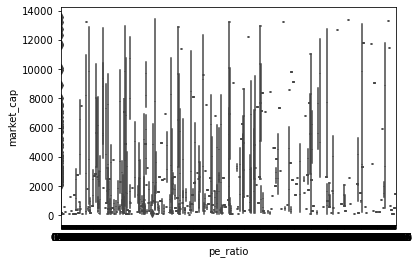

In [11]:
sns.boxplot(data=outliers_df, x='pe_ratio', y='market_cap')
plt.show()

### capping the outliers

C:\Users\DINESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DINESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DINESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DINESH\anaconda3\li

<AxesSubplot:>

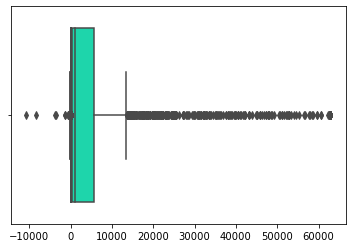

In [12]:
a = np.where(stock['pe_ratio']>stock['pe_ratio'].quantile(0.95),stock['pe_ratio'].quantile(0.95),stock['pe_ratio'])
sns.boxplot(a,color='#00F3BB')
b = np.where(stock['pb_ratio']>stock['pb_ratio'].quantile(0.95),stock['pb_ratio'].quantile(0.95),stock['pb_ratio'])
sns.boxplot(b,color='#00F3BB')
c = np.where(stock['market_cap']>stock['market_cap'].quantile(0.95),stock['market_cap'].quantile(0.95),stock['market_cap'])
sns.boxplot(c,color='#00F3BB')
d = np.where(stock['div_yield']>stock['div_yield'].quantile(0.95),stock['div_yield'].quantile(0.95),stock['div_yield'])
sns.boxplot(d,color='#00F3BB')

e = np.where(stock['roe']>stock['roe'].quantile(0.95),stock['roe'].quantile(0.95),stock['roe'])
sns.boxplot(e,color='#00F3BB')
f = np.where(stock['eps']>stock['eps'].quantile(0.95),stock['eps'].quantile(0.95),stock['eps'])
sns.boxplot(f,color='#00F3BB')

In [13]:
stock.drop_duplicates(inplace=True)#removing duplicates

In [14]:
stock.isna().sum()#checking for null values

stock_name      0
industry      223
cap            22
market_cap     22
pe_ratio       22
pb_ratio       22
div_yield      22
book_value     22
eps            22
roe            24
dtype: int64

In [15]:
stock.dropna(inplace=True)#dropping null values

In [16]:
stock['industry'].value_counts()

Chemicals                   231
Machinery                   142
Metals & Mining             138
Food Products               138
Pharmaceuticals             123
Capital Markets             117
Textiles                    109
Auto Components             107
Construction                 80
Electrical Equip.            77
IT Services                  66
Apparel & Luxury             65
Building Materials           51
Tech Hardware                51
Consumer Finance             49
Software                     46
Financial Services           44
Trading Companies            43
Hotels & Leisure             40
Banks                        39
Packaging                    36
Energy                       35
Household Durables           35
Health Care                  33
Specialty Retail             33
Paper & Wood Prods           33
Media                        32
Building Products            32
Commercial Serv              24
Entertainment                23
Air Freight & Logistics      20
Oil, Gas

In [17]:
stock

stock_name          industry        cap  market_cap  \
0              Reliance Industries  Oil, Gas & Fuels  Large Cap  1976492.87   
1        Tata Consultancy Services       IT Services  Large Cap  1510895.49   
2                        HDFC Bank             Banks  Large Cap  1078493.29   
3                       ICICI Bank             Banks  Large Cap   717745.02   
4                          Infosys       IT Services  Large Cap   706572.19   
...                            ...               ...        ...         ...   
2669             Inditrade Capital  Consumer Finance  Small Cap       76.25   
2670                  Vivimed Labs   Pharmaceuticals  Small Cap       40.63   
2671    Yamini Investments Company   Capital Markets  Small Cap       56.78   
2672              B C C Fuba India     Tech Hardware  Small Cap       79.34   
2673  Biogen Pharmachem Industries            Energy  Small Cap       75.70   

      pe_ratio  pb_ratio  div_yield   book_value     eps         roe  
0        28.25      2.63       0.31  1110.341197  103.42    9.117900  
1        33.67     15.01       2.79   275.043706  122.62   44.352000  
2        18.27      2.47       0.98   575.761202   77.72   13.498984  
3        16.91      3.00       0.78   341.286895   60.47   17.719490  
4        28.97     10.09       2.00   168.804021   58.77   30.462100  
...        ...       ...        ...          ...     ...         ...  
2669      0.00      0.65       0.00    50.510583   -7.87  -15.398800  
2670      0.00      0.29       0.00    16.736248  -38.34 -181.125500  
2671      0.00      0.84       0.00     1.286417    0.00    0.350900  
2672     21.77      4.44       0.00    11.663025    2.38   22.144700  
2673     58.00      1.36       0.00     0.853760    0.02    2.210300  

[2341 rows x 10 columns]

### Analysis

In [18]:
number=stock.select_dtypes(include="number").columns

In [19]:
object1=stock.select_dtypes(include="object").columns

### grouping with marketcap to each column

In [20]:
for i in object1:
    for j in number:
        groupby=stock.groupby(i)[j].mean().reset_index()
        abc=groupby.sort_values(by=j,ascending=False)
        
        display(abc)

stock_name  market_cap
1709            Reliance Industries  1976492.87
2079      Tata Consultancy Services  1510895.49
805                       HDFC Bank  1078493.29
878                      ICICI Bank   717745.02
970                         Infosys   706572.19
...                             ...         ...
742          Global Capital Markets       41.02
2268                   Vivimed Labs       40.63
678   Future Supply Chain Solutions       38.13
1819              Sanwaria Consumer       36.81
1120              Karnavati Finance       23.92

[2341 rows x 2 columns]

stock_name  pe_ratio
1376   Multi Commodity Exchange of India  25610.36
1496                  Oriental Aromatics   7282.00
1002              JIO Financial Services   5439.00
1806                   Samrat Pharmachem   5380.71
1938                  Smartlink Holdings   1726.50
...                                  ...       ...
1484               Opto Circuits (India)      0.00
617   Equippp Social Impact Technologies      0.00
615                   Envair Electrodyne      0.00
263                       Bajel Projects      0.00
976                     Inox Wind Energy      0.00

[2341 rows x 2 columns]

stock_name  pb_ratio
1144                  Kimia Biosciences    441.88
681                   GACM Technologies    122.75
1815               Sanjivani Paranteral    102.83
163                             Arshiya     79.52
2277                  Waaree Renewables     77.89
...                                 ...       ...
1271          Mahanagar Telephone Nigam      0.00
997                               J C T      0.00
1785    Sadbhav Infrastructure Projects      0.00
1278  Mahindra Holidays & Resorts India      0.00
1042                   Jaypee Infratech      0.00

[2341 rows x 2 columns]

stock_name  div_yield
2230                              Vedanta      38.06
888                                  IFCI      37.98
2054                     TV Today Network      26.96
867                        Hindustan Zinc      24.12
1422                    Narmada Gelatines      24.05
...                                   ...        ...
598                Electronics Mart India       0.00
600                  Electrotherm (India)       0.00
609                         Empower India       0.00
611            Energy Development Company       0.00
463   Country Club Hospitality & Holidays       0.00

[2341 rows x 2 columns]

stock_name    book_value
2313                    Yamuna Syndicate  36269.908740
353            Bombay Oxygen Investments  26735.620000
1272                Maharashtra Scooters  21642.309711
1014                        JSW Holdings  20778.245586
1417              Nalwa Sons Investments  20584.497276
...                                  ...           ...
1705                    Reliance Capital   -454.748171
2092                          Tayo Rolls   -473.489279
600                 Electrotherm (India)   -777.353563
1974  State Trading Corporation of India   -924.993183
40                         Aban Offshore  -3952.433011

[2341 rows x 2 columns]

stock_name      eps
2313                   Yamuna Syndicate  3822.92
300              Bengal & Assam Company  3423.33
353           Bombay Oxygen Investments  3116.13
358                               Bosch   788.44
2221                  Vardhman Holdings   627.37
...                                 ...      ...
2193           Universus Photo Imagings  -171.53
351   Bombay Burmah Trading Corporation  -172.08
2146                 Trejhara Solutions  -207.03
1196              Lakshmi Mills Company  -225.21
40                        Aban Offshore  -232.73

[2341 rows x 2 columns]

stock_name         roe
1815        Sanjivani Paranteral   2815.4137
166           Artson Engineering    720.0430
675           Future Enterprises    562.5547
243           BGR Energy Systems    444.4591
677                Future Retail    376.4498
...                          ...         ...
683               GE Power India  -1389.6069
1846   Sel Manufacturing Company  -1417.3849
1933  Sintex Plastics Technology  -3451.8651
1144           Kimia Biosciences  -3831.4752
163                      Arshiya -10788.1032

[2341 rows x 2 columns]

industry     market_cap
40          Oil, Gas & Fuels  165634.585500
5         Auto Manufacturers  134314.281818
54                   Tobacco  131041.980000
6                      Banks  121133.947179
32                 Insurance  110715.914167
52          Telecom Services   81572.868182
43         Personal Products   64562.988667
19        Electric Utilities   62925.116000
2                   Airlines   61202.330000
47               Road & Rail   59674.290000
30               IT Services   55340.221970
25             Gas Utilities   48229.115714
0        Aerospace & Defense   34798.269231
21                    Energy   32451.026000
23        Financial Services   27997.726364
56           Transport Infra   25326.335625
16           Consumer Retail   25157.371000
31  Industrial Conglomerates   23938.020000
15          Consumer Finance   20787.792449
7                  Beverages   19696.082778
38          Media & Services   19180.805000
9         Building Materials   17787.422941
46               Restaurants   17234.050769
44           Pharmaceuticals   13721.687805
34             Life Sciences   13054.280000
26               Health Care   13028.555152
14              Construction   11205.809375
39           Metals & Mining   10781.884493
45     Professional Services   10392.549000
55         Trading Companies   10114.272326
20         Electrical Equip.   10001.297922
50          Specialty Retail    9515.013030
3           Apparel & Luxury    9149.544615
4            Auto Components    7742.014206
12                 Chemicals    7442.354156
24             Food Products    6490.564130
49                  Software    6242.437609
8              Biotechnology    6220.823333
28        Household Durables    5460.027429
29        Household Products    5346.312500
35                 Machinery    5187.366690
13           Commercial Serv    5148.617917
11           Capital Markets    5070.888803
27          Hotels & Leisure    4996.731000
10         Building Products    4776.015625
1    Air Freight & Logistics    4726.037000
57           Water Utilities    4523.730000
37                     Media    3986.539375
51             Tech Hardware    3843.628824
36                    Marine    3529.375000
22             Entertainment    2234.443913
42        Paper & Wood Prods    2054.753939
48            Semiconductors    1843.634286
53                  Textiles    1625.406239
41                 Packaging    1325.772222
17         Consumer Services    1096.533571
18              Distributors     595.726154
33          Leisure Products     120.390000

industry    pe_ratio
11           Capital Markets  258.681111
29        Household Products  236.642500
48            Semiconductors  201.322857
23        Financial Services  182.739773
5         Auto Manufacturers  127.687273
50          Specialty Retail  110.142424
51             Tech Hardware  101.101569
1    Air Freight & Logistics   97.140500
12                 Chemicals   93.465584
18              Distributors   93.072308
38          Media & Services   81.700000
57           Water Utilities   72.960000
46               Restaurants   65.172308
28        Household Durables   62.321143
0        Aerospace & Defense   61.633846
37                     Media   59.720000
26               Health Care   59.014242
30               IT Services   58.881515
4            Auto Components   56.158879
22             Entertainment   55.048261
49                  Software   54.671957
33          Leisure Products   50.950000
20         Electrical Equip.   50.819870
47               Road & Rail   48.800000
55         Trading Companies   45.281860
3           Apparel & Luxury   44.793385
43         Personal Products   44.298000
10         Building Products   44.254062
25             Gas Utilities   43.427143
7                  Beverages   43.354444
13           Commercial Serv   42.736667
44           Pharmaceuticals   41.608699
21                    Energy   41.436286
16           Consumer Retail   40.884000
32                 Insurance   40.660833
19        Electric Utilities   39.429000
24             Food Products   39.373696
27          Hotels & Leisure   39.263750
17         Consumer Services   38.688571
14              Construction   37.913750
35                 Machinery   36.342113
45     Professional Services   35.521000
9         Building Materials   34.966471
39           Metals & Mining   30.616232
15          Consumer Finance   27.594286
42        Paper & Wood Prods   26.203939
41                 Packaging   26.086667
34             Life Sciences   24.470909
53                  Textiles   24.190000
31  Industrial Conglomerates   22.567273
36                    Marine   22.517500
52          Telecom Services   22.235455
8              Biotechnology   22.156667
54                   Tobacco   20.822500
6                      Banks   17.640769
40          Oil, Gas & Fuels   17.537000
56           Transport Infra   15.704375
2                   Airlines    8.165000

industry   pb_ratio
43         Personal Products  13.985333
44           Pharmaceuticals  10.042683
46               Restaurants   9.732308
48            Semiconductors   9.607143
50          Specialty Retail   9.250303
5         Auto Manufacturers   8.656364
30               IT Services   8.495909
1    Air Freight & Logistics   7.842500
20         Electrical Equip.   7.771558
25             Gas Utilities   7.484286
0        Aerospace & Defense   7.445385
7                  Beverages   7.360556
29        Household Products   7.342500
28        Household Durables   7.069714
26               Health Care   6.998788
56           Transport Infra   6.368125
21                    Energy   6.316286
51             Tech Hardware   6.204118
13           Commercial Serv   6.174167
35                 Machinery   6.021620
32                 Insurance   5.974167
17         Consumer Services   5.898571
49                  Software   5.862174
45     Professional Services   5.784000
3           Apparel & Luxury   5.762769
11           Capital Markets   5.751197
22             Entertainment   5.705217
18              Distributors   5.567692
27          Hotels & Leisure   5.412250
31  Industrial Conglomerates   5.405455
52          Telecom Services   5.200000
4            Auto Components   5.151121
47               Road & Rail   5.140000
10         Building Products   5.009062
24             Food Products   4.869130
14              Construction   4.794250
16           Consumer Retail   4.682000
54                   Tobacco   4.357500
12                 Chemicals   4.262900
34             Life Sciences   4.160909
39           Metals & Mining   4.114493
55         Trading Companies   4.060930
19        Electric Utilities   3.545000
23        Financial Services   3.405682
8              Biotechnology   3.268333
37                     Media   3.163438
53                  Textiles   3.142844
15          Consumer Finance   2.969184
9         Building Materials   2.956275
57           Water Utilities   2.700000
40          Oil, Gas & Fuels   2.688000
33          Leisure Products   2.520000
41                 Packaging   2.402500
38          Media & Services   2.395000
42        Paper & Wood Prods   2.265455
6                      Banks   1.990000
36                    Marine   1.910000
2                   Airlines   0.000000

industry  div_yield
54                   Tobacco   2.405000
37                     Media   1.476875
40          Oil, Gas & Fuels   1.448000
23        Financial Services   1.406591
25             Gas Utilities   1.340000
19        Electric Utilities   1.187000
31  Industrial Conglomerates   1.150909
47               Road & Rail   1.120000
12                 Chemicals   0.863853
39           Metals & Mining   0.816594
43         Personal Products   0.769333
42        Paper & Wood Prods   0.745455
6                      Banks   0.735641
45     Professional Services   0.682000
11           Capital Markets   0.674530
5         Auto Manufacturers   0.623636
30               IT Services   0.578939
55         Trading Companies   0.577907
53                  Textiles   0.570734
4            Auto Components   0.560280
41                 Packaging   0.505278
9         Building Materials   0.496471
36                    Marine   0.485000
21                    Energy   0.472000
28        Household Durables   0.471429
13           Commercial Serv   0.456250
0        Aerospace & Defense   0.450769
44           Pharmaceuticals   0.450244
35                 Machinery   0.437817
18              Distributors   0.400000
24             Food Products   0.393986
1    Air Freight & Logistics   0.359500
49                  Software   0.355652
38          Media & Services   0.335000
32                 Insurance   0.322500
17         Consumer Services   0.315714
51             Tech Hardware   0.312549
15          Consumer Finance   0.305510
3           Apparel & Luxury   0.297692
10         Building Products   0.286875
26               Health Care   0.282121
29        Household Products   0.270000
27          Hotels & Leisure   0.269750
20         Electrical Equip.   0.268442
14              Construction   0.266000
56           Transport Infra   0.245625
7                  Beverages   0.237222
50          Specialty Retail   0.219091
52          Telecom Services   0.214545
34             Life Sciences   0.197273
8              Biotechnology   0.181667
46               Restaurants   0.177692
22             Entertainment   0.137826
48            Semiconductors   0.022857
16           Consumer Retail   0.021000
33          Leisure Products   0.000000
2                   Airlines   0.000000
57           Water Utilities   0.000000

industry   book_value
11           Capital Markets  1584.700825
55         Trading Companies   998.665520
5         Auto Manufacturers   539.686333
38          Media & Services   523.106935
23        Financial Services   466.617714
54                   Tobacco   396.034533
31  Industrial Conglomerates   392.031420
9         Building Materials   378.512441
53                  Textiles   302.767507
12                 Chemicals   276.936209
15          Consumer Finance   274.209113
57           Water Utilities   269.870805
20         Electrical Equip.   268.388638
4            Auto Components   258.449585
35                 Machinery   241.756854
40          Oil, Gas & Fuels   240.451715
51             Tech Hardware   202.520443
41                 Packaging   201.940934
43         Personal Products   192.367440
47               Road & Rail   190.407431
24             Food Products   185.739915
6                      Banks   185.212755
44           Pharmaceuticals   185.057102
25             Gas Utilities   178.697098
50          Specialty Retail   176.731419
18              Distributors   174.418778
45     Professional Services   148.960292
34             Life Sciences   148.595512
36                    Marine   147.447546
0        Aerospace & Defense   147.392822
39           Metals & Mining   142.042061
30               IT Services   139.484852
26               Health Care   139.424421
42        Paper & Wood Prods   136.917280
28        Household Durables   133.056384
37                     Media   129.928277
3           Apparel & Luxury   125.791871
10         Building Products   123.229021
49                  Software   120.062400
13           Commercial Serv   118.126170
33          Leisure Products   114.833894
8              Biotechnology   105.984105
14              Construction   103.677333
7                  Beverages   103.168277
1    Air Freight & Logistics   102.537435
19        Electric Utilities    98.761761
22             Entertainment    93.130526
46               Restaurants    88.078055
16           Consumer Retail    85.990328
32                 Insurance    85.016283
27          Hotels & Leisure    71.101236
29        Household Products    57.888002
56           Transport Infra    46.570907
17         Consumer Services    43.974905
48            Semiconductors    29.978619
21                    Energy    24.673493
52          Telecom Services   -39.927364
2                   Airlines   -79.328675

industry         eps
5         Auto Manufacturers  105.103636
55         Trading Companies  102.284419
11           Capital Markets   99.454615
2                   Airlines   92.155000
54                   Tobacco   90.385000
31  Industrial Conglomerates   81.116364
40          Oil, Gas & Fuels   51.095000
43         Personal Products   39.765333
15          Consumer Finance   39.607755
35                 Machinery   39.590423
4            Auto Components   36.423925
25             Gas Utilities   34.248571
23        Financial Services   34.134545
9         Building Materials   28.807843
44           Pharmaceuticals   27.233740
6                      Banks   26.486154
0        Aerospace & Defense   26.477692
12                 Chemicals   26.259004
45     Professional Services   24.995000
51             Tech Hardware   22.993529
20         Electrical Equip.   22.455714
32                 Insurance   21.665833
30               IT Services   21.499697
39           Metals & Mining   20.504565
47               Road & Rail   20.070000
42        Paper & Wood Prods   19.958788
38          Media & Services   19.825000
26               Health Care   18.570909
49                  Software   17.841957
41                 Packaging   17.740278
10         Building Products   17.616563
3           Apparel & Luxury   17.009385
24             Food Products   16.202174
28        Household Durables   15.204000
14              Construction   13.618500
37                     Media   12.673125
29        Household Products   12.587500
18              Distributors   11.630769
27          Hotels & Leisure   11.535000
34             Life Sciences   11.046364
16           Consumer Retail   10.934000
7                  Beverages   10.611111
13           Commercial Serv   10.375833
53                  Textiles   10.032018
57           Water Utilities    9.970000
21                    Energy    9.848857
50          Specialty Retail    9.100606
22             Entertainment    8.539565
46               Restaurants    7.280769
33          Leisure Products    5.680000
8              Biotechnology    4.523333
1    Air Freight & Logistics    2.578000
36                    Marine    0.900000
52          Telecom Services   -1.183636
48            Semiconductors   -1.292857
19        Electric Utilities   -1.425000
17         Consumer Services   -1.562143
56           Transport Infra   -4.640625

industry         roe
16           Consumer Retail   58.067280
43         Personal Products   24.295907
54                   Tobacco   21.194875
40          Oil, Gas & Fuels   20.963605
52          Telecom Services   19.858627
3           Apparel & Luxury   18.934543
57           Water Utilities   18.049100
5         Auto Manufacturers   17.567364
25             Gas Utilities   17.422171
20         Electrical Equip.   15.897931
30               IT Services   15.329929
0        Aerospace & Defense   15.179515
38          Media & Services   14.730825
35                 Machinery   14.338269
13           Commercial Serv   14.318158
6                      Banks   13.908897
29        Household Products   13.126350
41                 Packaging   11.582900
11           Capital Markets   11.259948
39           Metals & Mining   10.819543
4            Auto Components   10.780658
31  Industrial Conglomerates   10.404227
47               Road & Rail   10.225000
26               Health Care   10.110145
42        Paper & Wood Prods    9.566991
10         Building Products    9.432650
15          Consumer Finance    9.338592
23        Financial Services    9.328068
28        Household Durables    9.108100
45     Professional Services    8.906970
36                    Marine    8.271175
55         Trading Companies    8.171528
46               Restaurants    7.810815
24             Food Products    7.675980
18              Distributors    7.394577
22             Entertainment    7.095348
51             Tech Hardware    6.772835
32                 Insurance    6.655025
27          Hotels & Leisure    6.532577
19        Electric Utilities    6.178880
37                     Media    4.048028
33          Leisure Products    3.646300
9         Building Materials    2.999627
21                    Energy    2.916243
48            Semiconductors    1.857629
34             Life Sciences    0.744964
56           Transport Infra    0.216369
49                  Software   -0.234137
44           Pharmaceuticals   -0.255031
7                  Beverages   -0.590128
17         Consumer Services   -1.134343
12                 Chemicals   -2.900794
50          Specialty Retail   -4.857006
14              Construction   -4.875799
8              Biotechnology   -5.189967
53                  Textiles  -12.164194
2                   Airlines  -94.686650
1    Air Freight & Logistics -533.470845

cap     market_cap
0  Large Cap  112510.235660
1    Mid Cap   10281.157025
2  Small Cap    1052.948712

cap    pe_ratio
1    Mid Cap  116.281048
0  Large Cap   74.798229
2  Small Cap   50.569188

cap  pb_ratio
0  Large Cap  9.046285
1    Mid Cap  6.763059
2  Small Cap  4.547006

cap  div_yield
0  Large Cap   1.056146
1    Mid Cap   0.726856
2  Small Cap   0.430559

cap  book_value
1    Mid Cap  361.461071
0  Large Cap  349.828171
2  Small Cap  255.539302

cap        eps
0  Large Cap  59.141458
1    Mid Cap  43.759943
2  Small Cap  19.401476

cap        roe
0  Large Cap  17.403507
1    Mid Cap  14.795842
2  Small Cap  -3.142948

### mean values for industries 

In [21]:
mean_market_cap = stock.groupby(['industry', 'cap'])['market_cap'].mean()

# Convert the resulting Series into a DataFrame
mean_market_cap_df = mean_market_cap.reset_index()

# Create a cross-tabulation using the mean market capitalization values
cross_tab = pd.crosstab(index=mean_market_cap_df["industry"], columns=mean_market_cap_df["cap"], values=mean_market_cap_df["market_cap"], aggfunc=np.mean)

cross_tab


cap                           Large Cap       Mid Cap    Small Cap
industry                                                          
Aerospace & Defense       104203.567500  10176.715000  2172.828571
Air Freight & Logistics    33517.700000   8116.600000   946.418462
Airlines                  117558.860000           NaN  4845.800000
Apparel & Luxury           79031.531667   9117.287500   933.194314
Auto Components            42789.047143   9763.860000  1280.233500
Auto Manufacturers        210282.015714           NaN  1370.747500
Banks                     199752.260000  10613.037273  2635.710000
Beverages                  83847.322500   5210.020000  1071.552308
Biotechnology              34475.230000           NaN   569.942000
Building Materials         97632.605000   9505.330000  1192.640000
Building Products          32778.033333   8429.940000   831.145600
Capital Markets            34678.346667  11328.242105   741.036742
Chemicals                  58399.043158  10805.271143  1307.443503
Commercial Serv            75284.000000   7243.092500  1016.340000
Construction              106648.595000   9718.489444  1457.863750
Consumer Finance           82030.130909   9903.384444   935.859655
Consumer Retail           239938.300000   8124.930000   438.810000
Consumer Services                   NaN   6496.800000   681.128462
Distributors                        NaN           NaN   595.726154
Electric Utilities        119558.446000  13221.125000  1672.226667
Electrical Equip.          59531.942222  13104.054286   941.772222
Energy                    175711.648333   8483.617143  1005.940909
Entertainment                       NaN   7881.110000   665.925556
Financial Services        108453.189091  13585.820000   791.533125
Food Products              94800.024286   8364.043125   854.547739
Gas Utilities              64058.370000  14997.430000  2314.530000
Health Care                46070.554286  10760.488571  1690.790526
Hotels & Leisure           50579.805000   9243.940000  1096.840323
Household Durables         38160.820000  12120.883000  1322.137917
Household Products                  NaN  17343.260000  1347.330000
IT Services               273477.506923   8702.830000   958.086809
Industrial Conglomerates   60813.502500   6788.555000  1297.420000
Insurance                 132048.548000   7807.800000   297.690000
Leisure Products                    NaN           NaN   120.390000
Life Sciences              64842.975000           NaN  1545.681111
Machinery                  35594.472727   9405.038333  1115.382710
Marine                              NaN  10615.580000  1167.306667
Media                      24608.610000  12210.912000  1611.772692
Media & Services           68187.370000   7272.480000   631.685000
Metals & Mining            76901.827333  10785.464500  1152.071456
Oil, Gas & Fuels          361075.891111  14020.312500   989.634286
Packaging                           NaN   6082.615000  1045.957941
Paper & Wood Prods                  NaN  12984.466667   961.782667
Personal Products         135253.127143  14332.210000  1048.675714
Pharmaceuticals            71446.490526  11382.768095  1099.351205
Professional Services      57693.290000  10376.465000   945.268000
Restaurants                85460.570000  11626.682500   944.970000
Road & Rail                59674.290000           NaN          NaN
Semiconductors                      NaN   7503.030000   900.401667
Software                   46138.612500  10410.730000   849.216286
Specialty Retail           59639.982500   6859.768333  1490.299565
Tech Hardware              31985.920000   9518.542000   945.328462
Telecom Services          211663.312500  14752.893333  1597.405000
Textiles                   23013.840000  11198.648889   539.066667
Tobacco                   505092.180000   9464.980000   145.780000
Trading Companies         367422.360000  11832.920000   820.322821
Transport Infra           127540.653333   9591.450000  1083.996667
Water Utilities                     NaN        

In [22]:
import numpy as np

# Create a crosstab to analyze the relationship between industry and market capitalization grouped by capitalization category
crosstab_result = pd.crosstab(index=stock["industry"], columns=stock["cap"], values=stock["market_cap"], aggfunc=np.mean)

# Display the crosstab resulcrosstab_result
crosstab_result

cap                           Large Cap       Mid Cap    Small Cap
industry                                                          
Aerospace & Defense       104203.567500  10176.715000  2172.828571
Air Freight & Logistics    33517.700000   8116.600000   946.418462
Airlines                  117558.860000           NaN  4845.800000
Apparel & Luxury           79031.531667   9117.287500   933.194314
Auto Components            42789.047143   9763.860000  1280.233500
Auto Manufacturers        210282.015714           NaN  1370.747500
Banks                     199752.260000  10613.037273  2635.710000
Beverages                  83847.322500   5210.020000  1071.552308
Biotechnology              34475.230000           NaN   569.942000
Building Materials         97632.605000   9505.330000  1192.640000
Building Products          32778.033333   8429.940000   831.145600
Capital Markets            34678.346667  11328.242105   741.036742
Chemicals                  58399.043158  10805.271143  1307.443503
Commercial Serv            75284.000000   7243.092500  1016.340000
Construction              106648.595000   9718.489444  1457.863750
Consumer Finance           82030.130909   9903.384444   935.859655
Consumer Retail           239938.300000   8124.930000   438.810000
Consumer Services                   NaN   6496.800000   681.128462
Distributors                        NaN           NaN   595.726154
Electric Utilities        119558.446000  13221.125000  1672.226667
Electrical Equip.          59531.942222  13104.054286   941.772222
Energy                    175711.648333   8483.617143  1005.940909
Entertainment                       NaN   7881.110000   665.925556
Financial Services        108453.189091  13585.820000   791.533125
Food Products              94800.024286   8364.043125   854.547739
Gas Utilities              64058.370000  14997.430000  2314.530000
Health Care                46070.554286  10760.488571  1690.790526
Hotels & Leisure           50579.805000   9243.940000  1096.840323
Household Durables         38160.820000  12120.883000  1322.137917
Household Products                  NaN  17343.260000  1347.330000
IT Services               273477.506923   8702.830000   958.086809
Industrial Conglomerates   60813.502500   6788.555000  1297.420000
Insurance                 132048.548000   7807.800000   297.690000
Leisure Products                    NaN           NaN   120.390000
Life Sciences              64842.975000           NaN  1545.681111
Machinery                  35594.472727   9405.038333  1115.382710
Marine                              NaN  10615.580000  1167.306667
Media                      24608.610000  12210.912000  1611.772692
Media & Services           68187.370000   7272.480000   631.685000
Metals & Mining            76901.827333  10785.464500  1152.071456
Oil, Gas & Fuels          361075.891111  14020.312500   989.634286
Packaging                           NaN   6082.615000  1045.957941
Paper & Wood Prods                  NaN  12984.466667   961.782667
Personal Products         135253.127143  14332.210000  1048.675714
Pharmaceuticals            71446.490526  11382.768095  1099.351205
Professional Services      57693.290000  10376.465000   945.268000
Restaurants                85460.570000  11626.682500   944.970000
Road & Rail                59674.290000           NaN          NaN
Semiconductors                      NaN   7503.030000   900.401667
Software                   46138.612500  10410.730000   849.216286
Specialty Retail           59639.982500   6859.768333  1490.299565
Tech Hardware              31985.920000   9518.542000   945.328462
Telecom Services          211663.312500  14752.893333  1597.405000
Textiles                   23013.840000  11198.648889   539.066667
Tobacco                   505092.180000   9464.980000   145.780000
Trading Companies         367422.360000  11832.920000   820.322821
Transport Infra           127540.653333   9591.450000  1083.996667
Water Utilities                     NaN        

In [23]:
# Step 1: Calculate the average P/E ratio for each industry
industry_avg_pe = stock.groupby('industry')['pe_ratio'].mean().reset_index()
industry_avg_pe.rename(columns={'pe_ratio': 'avg_pe_ratio'}, inplace=True)

# Step 2: Merge the average P/E ratio back to the original dataset
stock_with_avg_pe = pd.merge(stock, industry_avg_pe, on='industry', how='left')

# Step 3: Calculate the difference between the P/E ratio of each stock and the average P/E ratio of its industry
stock_with_avg_pe['pe_ratio_difference'] = stock_with_avg_pe['pe_ratio'] - stock_with_avg_pe['avg_pe_ratio']

# Displaying the analysis
print(stock_with_avg_pe[['stock_name', 'industry', 'pe_ratio', 'avg_pe_ratio', 'pe_ratio_difference']])


                        stock_name          industry  pe_ratio  avg_pe_ratio  \
0              Reliance Industries  Oil, Gas & Fuels     28.25     17.537000   
1        Tata Consultancy Services       IT Services     33.67     58.881515   
2                        HDFC Bank             Banks     18.27     17.640769   
3                       ICICI Bank             Banks     16.91     17.640769   
4                          Infosys       IT Services     28.97     58.881515   
...                            ...               ...       ...           ...   
2336             Inditrade Capital  Consumer Finance      0.00     27.594286   
2337                  Vivimed Labs   Pharmaceuticals      0.00     41.608699   
2338    Yamini Investments Company   Capital Markets      0.00    258.681111   
2339              B C C Fuba India     Tech Hardware     21.77    101.101569   
2340  Biogen Pharmachem Industries            Energy     58.00     41.436286   

      pe_ratio_difference  
0          

In [24]:
industry_comparison = stock.groupby('industry').mean()

# Sort industries based on key financial indicators (e.g., market_cap, pe_ratio, pb_ratio, div_yield)
sorted_industries = industry_comparison.sort_values(by='market_cap', ascending=False)

print("Industry Comparison based on Mean Financial Indicators:")
print(sorted_industries)

Industry Comparison based on Mean Financial Indicators:
                             market_cap    pe_ratio   pb_ratio  div_yield  \
industry                                                                    
Oil, Gas & Fuels          165634.585500   17.537000   2.688000   1.448000   
Auto Manufacturers        134314.281818  127.687273   8.656364   0.623636   
Tobacco                   131041.980000   20.822500   4.357500   2.405000   
Banks                     121133.947179   17.640769   1.990000   0.735641   
Insurance                 110715.914167   40.660833   5.974167   0.322500   
Telecom Services           81572.868182   22.235455   5.200000   0.214545   
Personal Products          64562.988667   44.298000  13.985333   0.769333   
Electric Utilities         62925.116000   39.429000   3.545000   1.187000   
Airlines                   61202.330000    8.165000   0.000000   0.000000   
Road & Rail                59674.290000   48.800000   5.140000   1.120000   
IT Services         

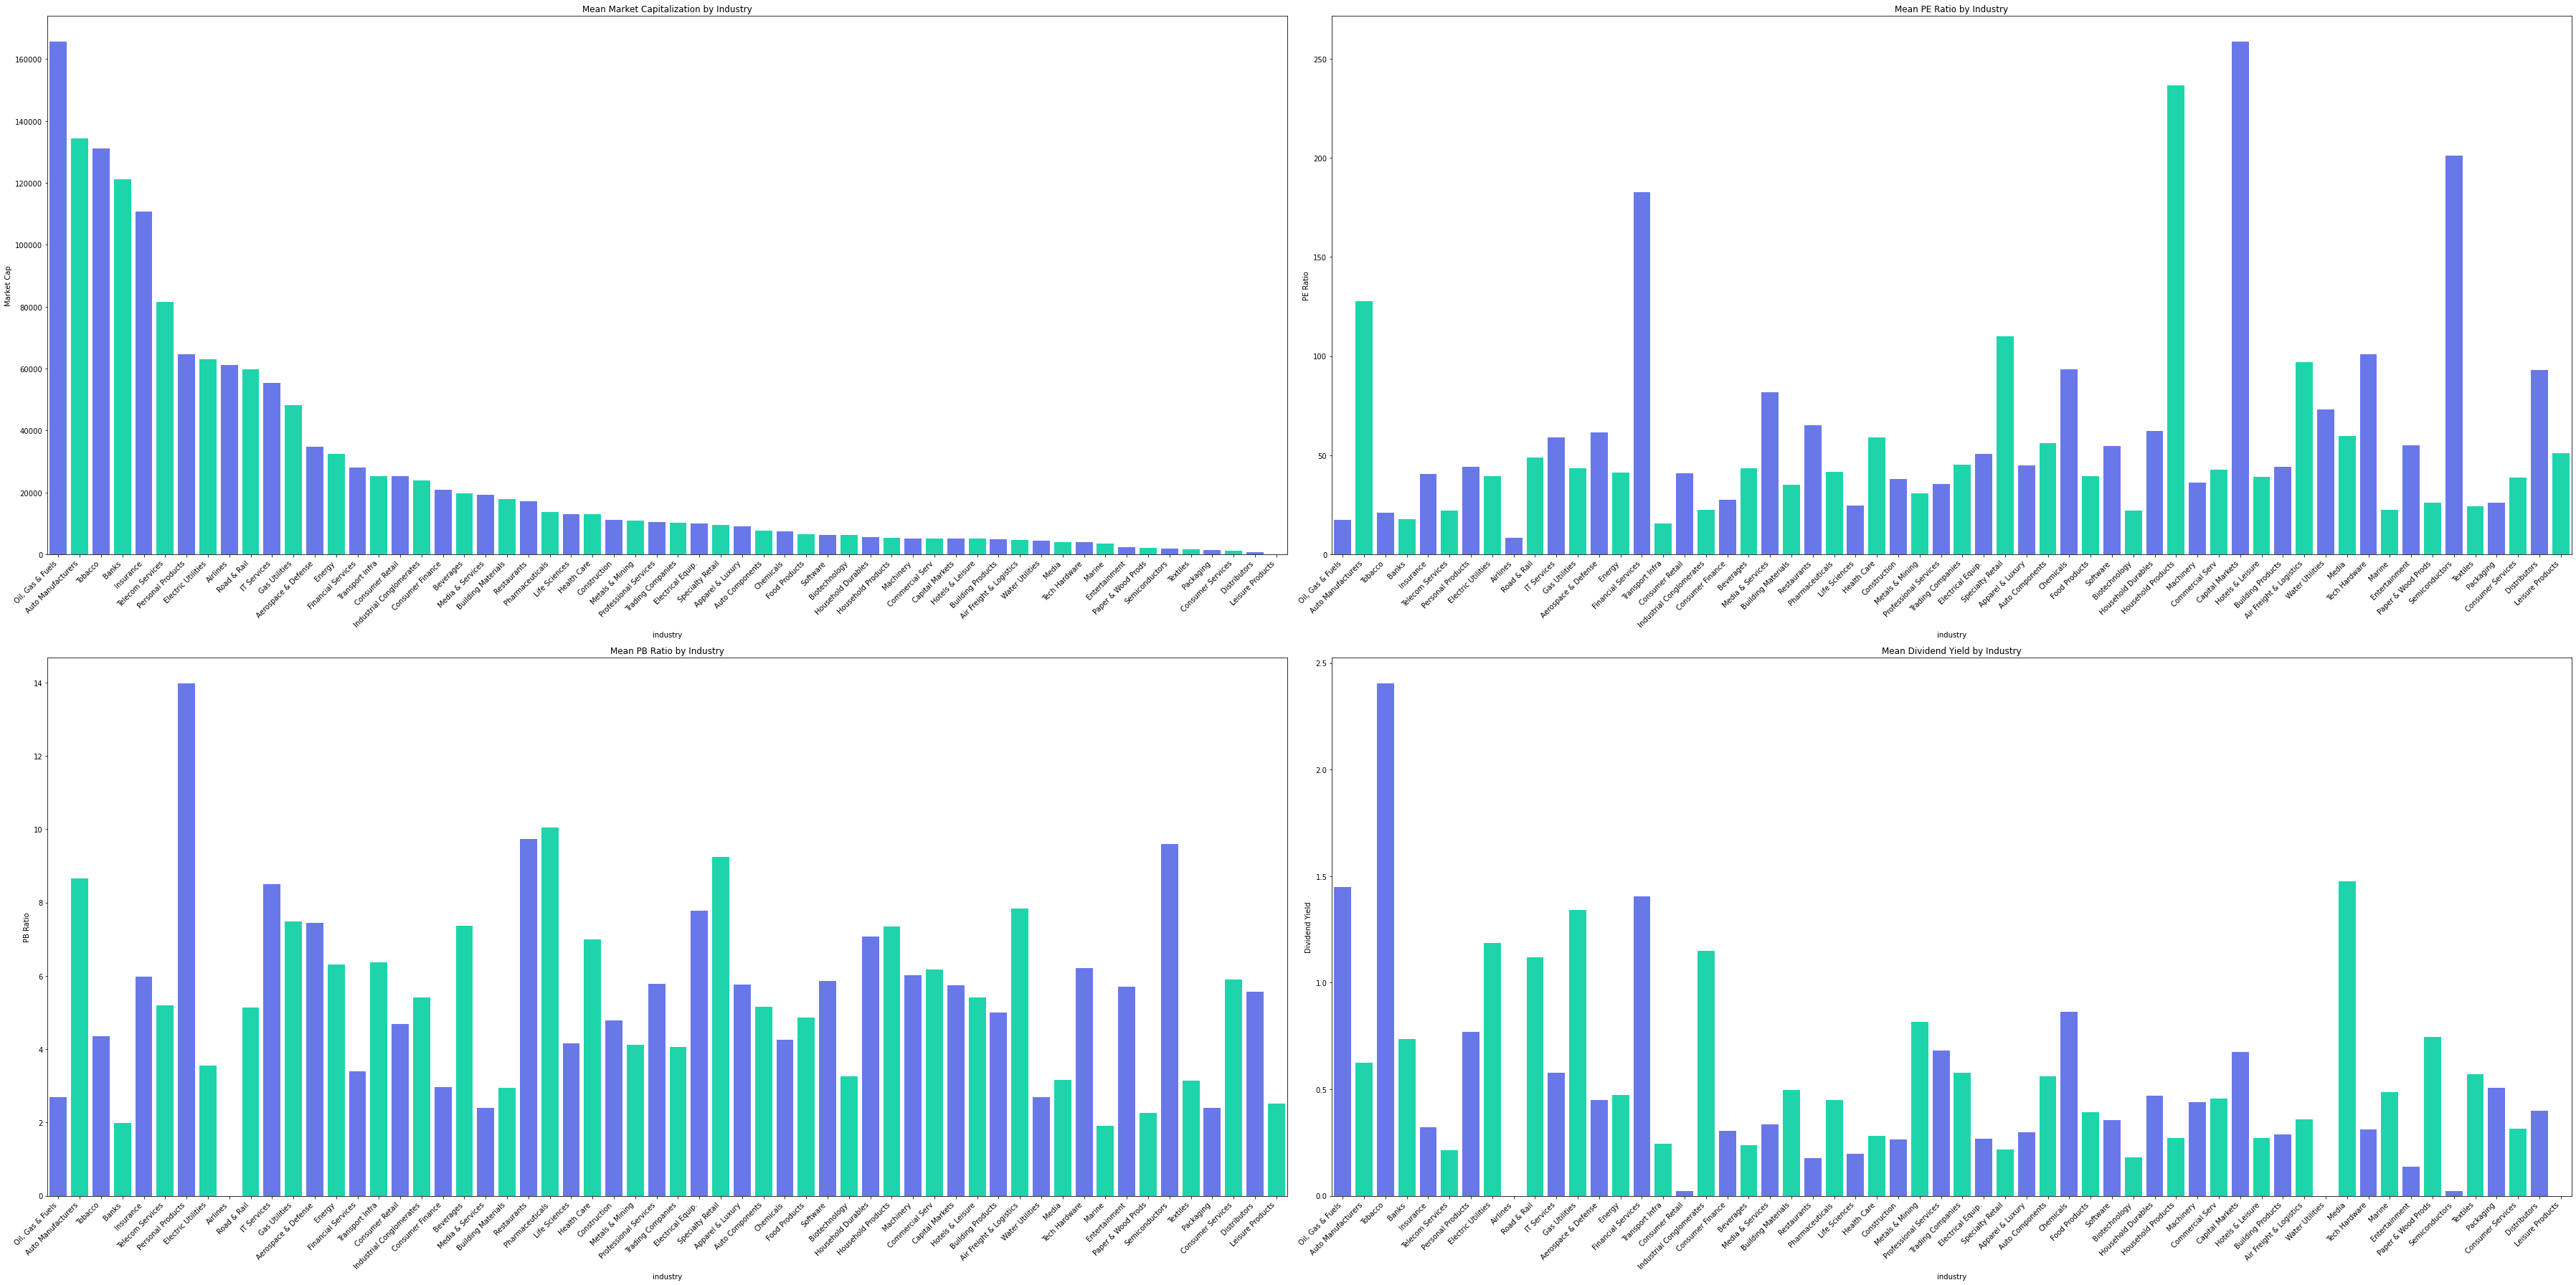

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by industry and calculate mean financial indicators
industry_comparison = stock.groupby('industry').mean()

# Sort industries based on market capitalization
sorted_industries = industry_comparison.sort_values(by='market_cap', ascending=False)

# Define custom colors
colors = ['#5367FF', '#00F3BB']

# Plotting
plt.figure(figsize=(50, 25))

# Bar plot for market capitalization
plt.subplot(2, 2, 1)
sns.barplot(x=sorted_industries.index, y=sorted_industries['market_cap'], palette=colors)
plt.title('Mean Market Capitalization by Industry')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Market Cap')

# Bar plot for PE ratio
plt.subplot(2, 2, 2)
sns.barplot(x=sorted_industries.index, y=sorted_industries['pe_ratio'], palette=colors)
plt.title('Mean PE Ratio by Industry')
plt.xticks(rotation=45, ha='right')
plt.ylabel('PE Ratio')

# Bar plot for PB ratio
plt.subplot(2, 2, 3)
sns.barplot(x=sorted_industries.index, y=sorted_industries['pb_ratio'], palette=colors)
plt.title('Mean PB Ratio by Industry')
plt.xticks(rotation=45, ha='right')
plt.ylabel('PB Ratio')

# Bar plot for dividend yield
plt.subplot(2, 2, 4)
sns.barplot(x=sorted_industries.index, y=sorted_industries['div_yield'], palette=colors)
plt.title('Mean Dividend Yield by Industry')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Dividend Yield')

plt.tight_layout()
plt.show()


### comparison between market cap and capsize

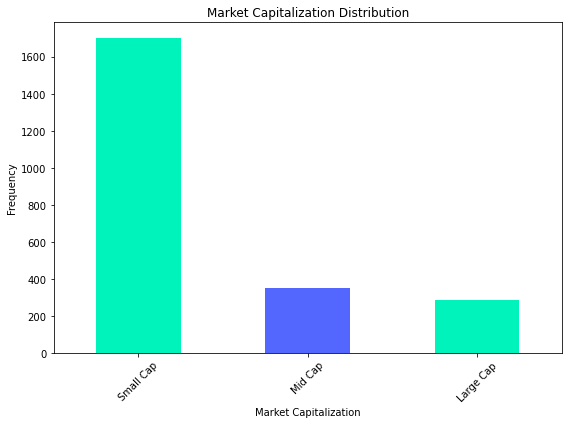

In [26]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'stock'
# Counting the occurrences of each market capitalization category
market_cap_counts = stock['cap'].value_counts()

plt.figure(figsize=(8, 6))
market_cap_counts.plot(kind='bar', color=['#00F3BB', '#5367FF'])  # Use a list of valid color codes
plt.title('Market Capitalization Distribution')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### checking  industry with market capital

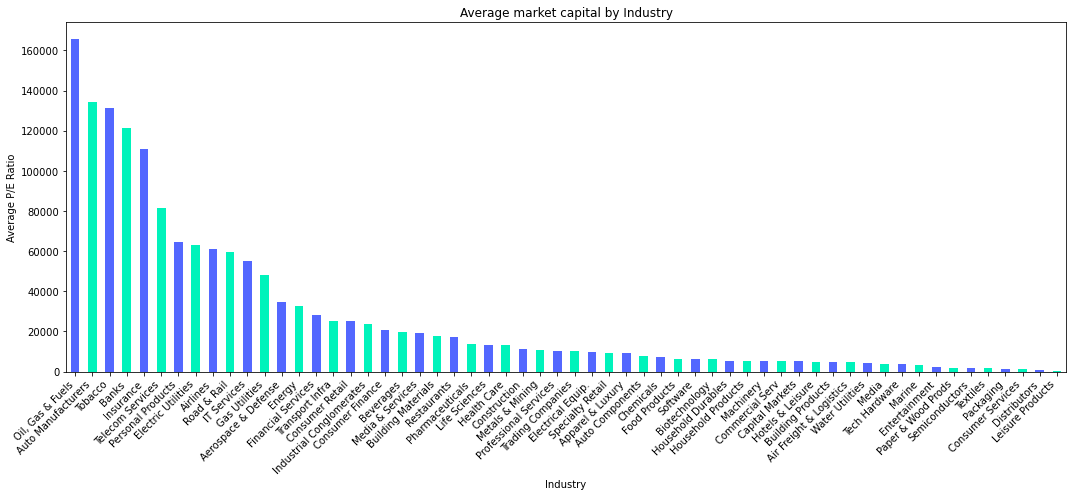

In [27]:
import matplotlib.pyplot as plt

# Grouping the DataFrame by 'industry' and calculating the mean of 'pe_ratio' for each group
pe_ratio_by_industry = stock.groupby('industry')['market_cap'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the results
plt.figure(figsize=(15, 7))
pe_ratio_by_industry.plot(kind='bar', color=['#5367FF', '#00F3BB'])
plt.title('Average market capital by Industry')
plt.xlabel('Industry')
plt.ylabel('Average P/E Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


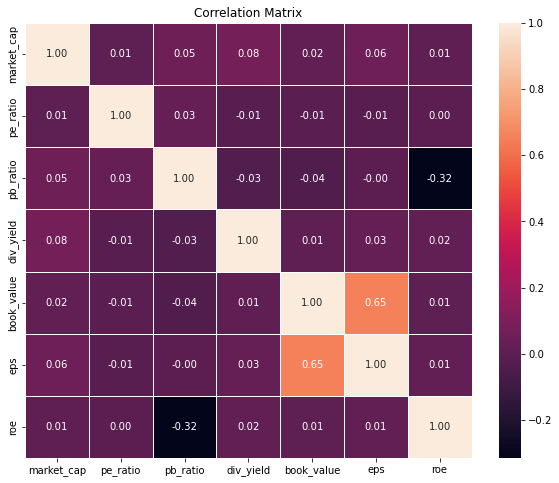

In [28]:
numerical_columns = ['market_cap', 'pe_ratio', 'pb_ratio', 'div_yield', 'book_value', 'eps', 'roe']
correlation_matrix = stock[numerical_columns].corr()

# Custom color palette
colors = ['#00F3BB', '#5367FF']

# Create a heatmap with custom color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### finding best top stocks on large cap&low pe&low pb

In [29]:

# Filter stocks with pe_ratio less than 20 and pb_ratio less than 2
filtered_stocks = stock[(stock['pe_ratio'] < 20) & (stock['pb_ratio'] < 2)]

# Sort filtered stocks by market capitalization in descending order and take the top 5
top_5_stocks = filtered_stocks.nlargest(10, 'market_cap')
top_5_stocks

stock_name            industry        cap  market_cap  \
7             State Bank of India               Banks  Large Cap   673585.09   
16  Oil & Natural Gas Corporation    Oil, Gas & Fuels  Large Cap   345328.66   
40         Indian Oil Corporation    Oil, Gas & Fuels  Large Cap   263784.73   
42                     Tata Steel     Metals & Mining  Large Cap   176283.76   
48           Punjab National Bank               Banks  Large Cap   143308.37   
47      Power Finance Corporation  Financial Services  Large Cap   143191.42   
66                 Bank of Baroda               Banks  Large Cap   142496.88   
58                    REC Limited  Financial Services  Large Cap   124709.49   
61                   GAIL (India)       Gas Utilities  Large Cap   119962.69   
64            Interglobe Aviation            Airlines  Large Cap   117558.86   

    pe_ratio  pb_ratio  div_yield  book_value     eps         roe  
7      10.56      1.84       1.50  410.545024   71.48   18.845496  
16      8.23      1.12       4.10  246.121246   33.34   15.866100  
40      5.63      1.58       1.57  118.379248   33.19   23.147800  
42      0.00      1.99       2.50   71.464799   -2.70    0.784100  
48     18.78      1.47       0.50   88.801984    6.93    7.802557  
47      7.61      1.53       2.44  282.697621   57.01   19.236500  
66      7.54      1.25       2.00  220.194928   36.53   16.589068  
58      9.50      1.91       2.66  247.952335   49.87   20.112500  
61     14.87      1.65       2.74  110.810290   12.27    7.252200  
64     16.33      0.00       0.00  -75.861370  186.46 -191.968700

#### finding lose stocks on low cap&high pe&high pb

In [30]:
# Filter stocks with pe_ratio greater than 20 and pb_ratio greater than 2
filtered_stocks = stock[(stock['pe_ratio'] > 20) & (stock['pb_ratio'] < 2)]

# Sort filtered stocks by market capitalization in descending order and take the top 5
top_5_stocks = filtered_stocks.nlargest(10, 'market_cap')

top_5_stocks


stock_name            industry        cap  market_cap  \
43        JIO Financial Services  Financial Services  Large Cap   172777.56   
51             Grasim Industries  Building Materials  Large Cap   140479.51   
186  New India Assurance Company           Insurance  Large Cap    47272.88   
216                       Biocon       Biotechnology  Large Cap    34475.23   
240  Tata Investment Corporation     Capital Markets  Large Cap    28399.39   
369    Jaiprakash Power Ventures              Energy    Mid Cap    13960.50   
416            Vardhman Textiles            Textiles    Mid Cap    12851.82   
426    Nuvoco Vistas Corporation  Building Materials    Mid Cap    12130.81   
474               Zydus Wellness       Food Products    Mid Cap    10138.83   
448               TV18 Broadcast               Media    Mid Cap    10005.01   

     pe_ratio  pb_ratio  div_yield   book_value    eps     roe  
43    5439.00      1.51       0.00   179.620494   0.05  0.0000  
51      24.64      1.67       0.47  1263.123737  85.41  7.9655  
186     50.77      1.74       0.67   164.928823   5.65  0.0000  
216     28.72      1.82       0.52   158.100117  10.00  3.8533  
240     82.38      1.20       0.86  4690.779019  68.14  1.3739  
369     35.74      1.30       0.00    15.621658   0.57  0.4759  
416     21.80      1.45       0.79   305.568965  20.39  6.0205  
426     48.87      1.37       0.00   247.930102   6.95  6.1732  
474     38.71      1.95       0.31   818.302169  41.16  5.4004  
448    265.27      0.58       0.00   100.258350   0.22  0.5367

### Top Down analysis

Macro-economic Analysis:
GDP Growth Rate: 8.7%
Inflation Rate: 4.55%

Sector Analysis: Oil, Gas & Fuels
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count  2.000000e+01   20.000000  20.000000  20.000000    20.000000   
mean   1.656346e+05   17.537000   2.688000   1.448000   240.451715   
std    4.394321e+05   24.544121   2.526422   1.706889   292.914982   
min    9.288000e+01    0.000000   0.000000   0.000000  -130.210894   
25%    1.859610e+03    4.867500   1.572500   0.000000    78.838485   
50%    1.478104e+04    9.865000   2.030000   0.455000   150.689277   
75%    9.568006e+04   18.335000   2.857500   2.887500   320.057758   
max    1.976493e+06  104.960000  11.910000   5.050000  1110.341197   

              eps        roe  
count   20.000000  20.000000  
mean    51.095000  20.963605  
std     63.223488  14.409692  
min    -39.640000  -3.083300  
25%     14.880000  12.751125  
50%     26.035000  19.896150  
75%     66.917500  33.028400  
max    210.190000

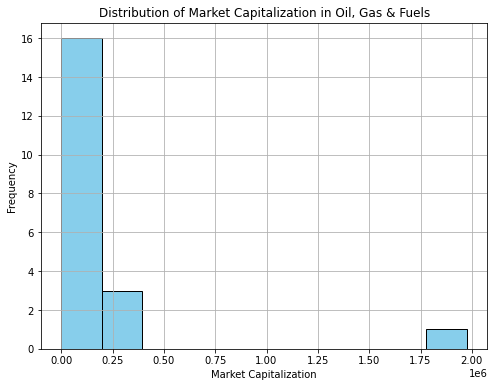

Sector Analysis: IT Services
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count  6.600000e+01   66.000000  66.000000  66.000000    66.000000   
mean   5.534022e+04   58.881515   8.495909   0.578939   139.484852   
std    2.121257e+05  130.980096   9.891709   0.852261   243.824142   
min    7.926000e+01    0.000000   0.000000   0.000000  -391.681392   
25%    3.457275e+02   17.075000   2.810000   0.000000    20.303469   
50%    9.757450e+02   32.255000   5.585000   0.180000    66.733602   
75%    6.826530e+03   55.150000  10.065000   0.910000   162.608683   
max    1.510895e+06  987.080000  49.710000   3.830000  1575.598771   

              eps         roe  
count   66.000000   66.000000  
mean    21.499697   15.329929  
std     47.728416   37.568922  
min   -207.030000 -152.812900  
25%      0.885000    4.509400  
50%      8.190000   14.625950  
75%     28.535000   24.547400  
max    155.180000  174.374900  



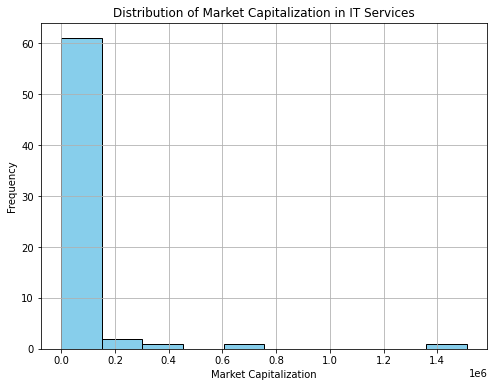

Sector Analysis: Banks
         market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count  3.900000e+01  39.000000  39.000000  39.000000   39.000000   39.000000   
mean   1.211339e+05  17.640769   1.990000   0.735641  185.212755   26.486154   
std    2.252775e+05  14.972624   0.962185   0.716441  192.602005   28.880709   
min    1.208890e+03   6.330000   0.950000   0.000000   12.703489    0.360000   
25%    9.561985e+03   9.290000   1.305000   0.000000   36.823659    5.265000   
50%    4.398949e+04  11.950000   1.840000   0.710000  114.030677   15.870000   
75%    1.068300e+05  19.075000   2.395000   1.080000  236.405246   38.240000   
max    1.078493e+06  78.940000   5.370000   2.230000  745.650979  111.440000   

             roe  
count  39.000000  
mean   13.908897  
std     4.531452  
min     2.514391  
25%    11.109565  
50%    14.328715  
75%    16.406021  
max    27.927591  



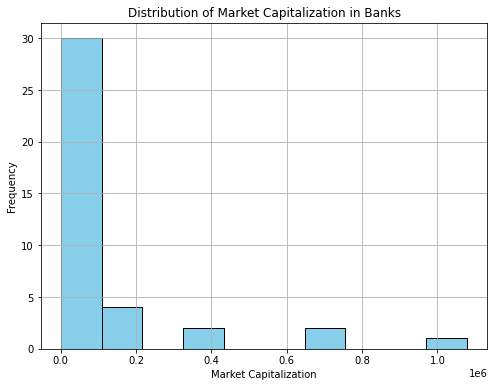

Sector Analysis: Insurance
          market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count      12.000000  12.000000  12.000000  12.000000   12.000000   12.000000   
mean   110715.914167  40.660833   5.974167   0.322500   85.016283   21.665833   
std    177857.992596  34.197684   3.606936   0.491641  181.803224   39.060989   
min       297.690000   0.000000   0.000000   0.000000 -454.748171  -52.700000   
25%     33182.370000   8.750000   3.097500   0.000000   74.178288    6.160000   
50%     60515.500000  42.115000   6.800000   0.145000  111.719265   13.105000   
75%     92598.717500  78.630000   8.937500   0.392500  149.301055   37.715000   
max    657420.260000  83.540000  10.590000   1.690000  272.309108  108.870000   

             roe  
count  12.000000  
mean    6.655025  
std     6.587927  
min    -2.265500  
25%     0.000000  
50%     8.677050  
75%    12.176175  
max    15.696300  



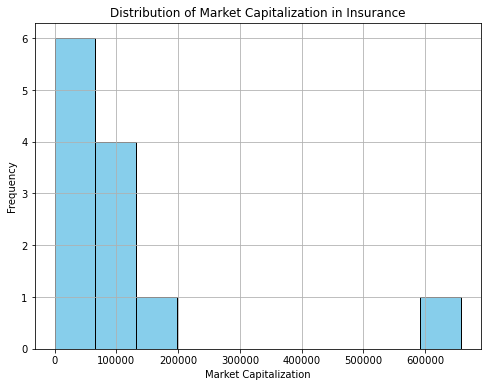

Sector Analysis: Telecom Services
          market_cap   pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      11.000000  11.000000  11.000000  11.000000   11.000000  11.000000   
mean    81572.868182  22.235455   5.200000   0.214545  -39.927364  -1.183636   
std    193064.579454  29.571600  10.497247   0.379457  152.028590  22.800294   
min       150.620000   0.000000   0.000000   0.000000 -353.148730 -51.310000   
25%      2780.720000   0.000000   0.000000   0.000000  -68.884362  -6.140000   
50%     14352.020000   0.000000   0.000000   0.000000   -3.652215  -0.950000   
75%     55571.620000  51.135000   5.540000   0.265000   52.334617  10.810000   
max    658060.620000  74.960000  35.520000   1.160000  138.362336  34.150000   

             roe  
count  11.000000  
mean   19.858627  
std    25.249359  
min    -0.242500  
25%     7.342000  
50%    14.242800  
75%    17.275250  
max    90.988900  



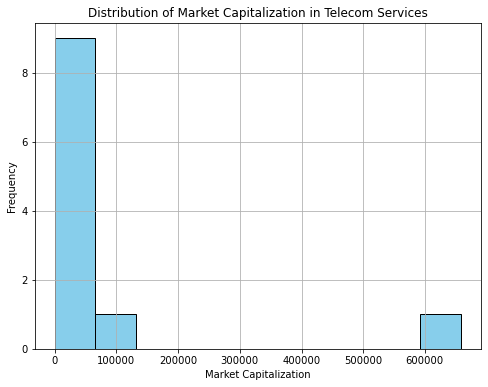

Sector Analysis: Personal Products
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      15.000000   15.000000  15.000000  15.000000    15.000000   
mean    64562.988667   44.298000  13.985333   0.769333   192.367440   
std    142208.471611   36.575776  13.912571   0.804785   361.060682   
min       113.130000    0.000000   1.080000   0.000000     1.088212   
25%       528.845000   14.795000   6.090000   0.000000    30.880267   
50%     14332.210000   53.790000  10.170000   0.680000    56.175957   
75%     61700.880000   63.165000  14.305000   1.390000   178.062027   
max    558039.670000  113.050000  50.660000   2.370000  1441.160584   

              eps        roe  
count   15.000000  15.000000  
mean    39.765333  24.295907  
std     63.343426  22.306375  
min     -2.450000   0.189100  
25%      3.390000   9.676800  
50%     16.330000  18.505500  
75%     45.125000  33.475650  
max    232.850000  71.814700  



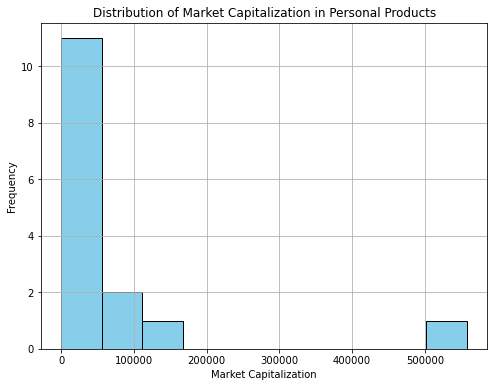

Sector Analysis: Tobacco
          market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count       4.000000   4.000000  4.000000   4.000000    4.000000    4.00000   
mean   131041.980000  20.822500  4.357500   2.405000  396.034533   90.38500   
std    249424.691852   3.564944  2.463011   1.916533  378.472025   92.42691   
min       145.780000  16.240000  1.500000   0.000000   55.372566    5.47000   
25%      4292.612500  19.150000  3.000000   1.297500   74.944908   13.69750   
50%      9464.980000  21.215000  4.310000   2.770000  399.827775   86.69000   
75%    136214.347500  22.887500  5.667500   3.877500  720.917400  163.37750   
max    505092.180000  24.620000  7.310000   4.080000  729.110016  182.69000   

             roe  
count   4.000000  
mean   21.194875  
std    10.290201  
min     6.673300  
25%    17.552575  
50%    24.447200  
75%    28.089500  
max    29.211800  



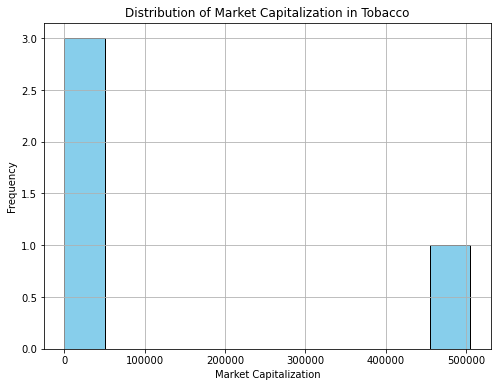

Sector Analysis: Construction
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      80.000000   80.000000  80.000000  80.000000    80.000000   
mean    11205.809375   37.913750   4.794250   0.266000   103.677333   
std     52270.385265   71.987448   8.028964   0.463904   172.377364   
min        64.040000    0.000000   0.000000   0.000000   -84.167523   
25%       353.292500   10.522500   1.667500   0.000000    18.095606   
50%      2156.870000   21.730000   2.755000   0.000000    46.033786   
75%      6587.120000   35.840000   5.042500   0.402500   140.750323   
max    465861.990000  584.290000  56.340000   2.650000  1086.840290   

              eps          roe  
count   80.000000    80.000000  
mean    13.618500    -4.875799  
std     38.572689   202.959867  
min    -77.740000 -1389.606900  
25%      0.320000     6.106350  
50%      5.745000    11.518450  
75%     13.492500    18.368425  
max    191.840000   720.043000  



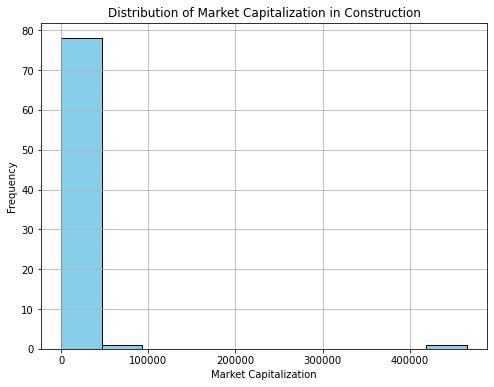

Sector Analysis: Consumer Finance
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      49.000000   49.000000  49.000000  49.000000    49.000000   
mean    20787.792449   27.594286   2.969184   0.305510   274.209113   
std     61018.434295   28.834019   1.706869   0.543645   399.598557   
min        23.920000    0.000000   0.650000   0.000000     1.055492   
25%       325.630000   11.470000   1.780000   0.000000    29.968373   
50%      2431.060000   18.450000   2.480000   0.000000   116.349712   
75%     15790.240000   33.960000   4.180000   0.430000   300.878261   
max    409208.530000  143.960000   8.100000   2.070000  1746.944553   

              eps        roe  
count   49.000000  49.000000  
mean    39.607755   9.338592  
std     61.915679  13.519101  
min    -61.230000 -64.321900  
25%      1.440000   6.275900  
50%     14.730000  11.167700  
75%     61.790000  17.315400  
max    223.040000  29.580300  



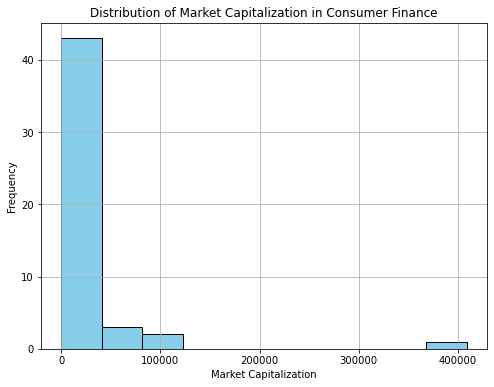

Sector Analysis: Pharmaceuticals
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     123.000000  123.000000  123.000000  123.000000   123.000000   
mean    13721.687805   41.608699   10.042683    0.450244   185.057102   
std     38862.212893   62.943940   40.830056    0.879987   245.143005   
min        40.630000    0.000000    0.000000    0.000000  -131.643393   
25%       334.305000   14.565000    2.430000    0.000000    43.191331   
50%      1305.300000   31.000000    3.870000    0.180000    95.835417   
75%     10303.795000   46.615000    6.350000    0.655000   245.850416   
max    362407.550000  558.750000  441.880000    6.430000  1528.499312   

             eps          roe  
count  123.00000   123.000000  
mean    27.23374    -0.255031  
std     67.83090   431.235999  
min    -84.46000 -3831.475200  
25%      1.86500     5.292650  
50%      9.18000    11.900100  
75%     29.70500    17.183750  
max    539.10000  2815.413700  



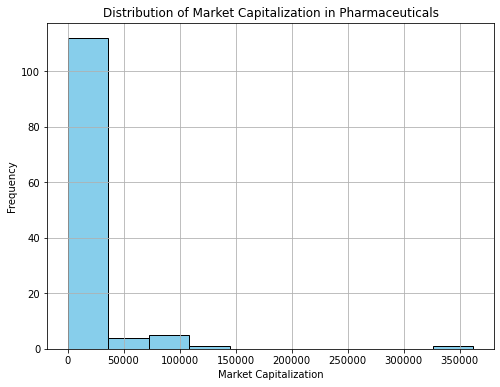

Sector Analysis: Auto Manufacturers
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      11.000000   11.000000  11.000000  11.000000    11.000000   
mean   134314.281818  127.687273   8.656364   0.623636   539.686333   
std    136547.968246  218.248742   7.019046   0.707846   744.742123   
min       426.290000   16.080000   0.000000   0.000000    -0.867776   
25%      1753.050000   27.560000   4.195000   0.070000    68.795694   
50%    101581.130000   31.850000   5.830000   0.230000   161.111274   
75%    232012.865000  122.975000  12.055000   0.895000   732.971314   
max    357401.840000  754.420000  20.960000   2.040000  2501.068806   

              eps        roe  
count   11.000000  11.000000  
mean   105.103636  17.567364  
std    127.305292   8.703852  
min      0.120000   1.552900  
25%      1.580000  13.248500  
50%     58.380000  18.466100  
75%    160.470000  23.193850  
max    387.680000  28.582200  



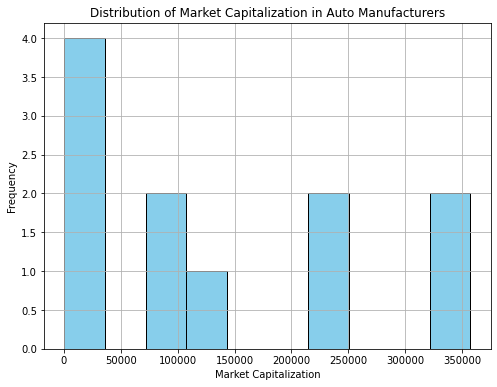

Sector Analysis: Trading Companies
          market_cap    pe_ratio   pb_ratio  div_yield    book_value  \
count      43.000000   43.000000  43.000000  43.000000     43.000000   
mean    10114.272326   45.281860   4.060930   0.577907    998.665520   
std     55879.828296   56.607371   3.437993   1.305641   5520.897942   
min        55.450000    0.000000   0.000000   0.000000   -924.993183   
25%       213.570000   12.460000   0.600000   0.000000     10.993835   
50%       476.230000   29.040000   3.610000   0.040000     55.812342   
75%      1074.455000   50.965000   7.260000   0.470000    230.575079   
max    367422.360000  290.360000  10.990000   6.870000  36269.908740   

               eps        roe  
count    43.000000  43.000000  
mean    102.284419   8.171528  
std     581.894876  10.386912  
min     -60.300000 -27.157400  
25%       0.875000   2.379450  
50%       3.400000   6.749900  
75%      16.245000  12.151200  
max    3822.920000  33.910200  



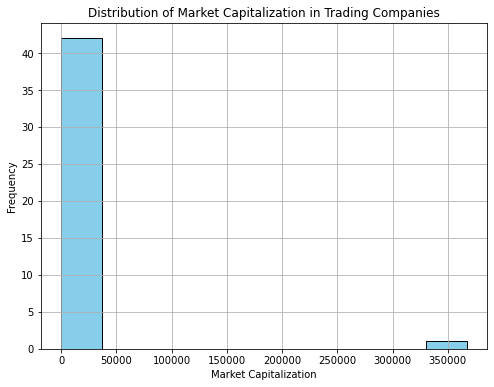

Sector Analysis: Apparel & Luxury
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      65.000000   65.000000  65.000000  65.000000    65.000000   
mean     9149.544615   44.793385   5.762769   0.297692   125.791871   
std     40629.483806   45.723165   6.439764   0.488751   219.170418   
min        63.350000    0.000000   0.000000   0.000000    -5.944732   
25%       154.610000   17.740000   1.580000   0.000000    17.120587   
50%       720.000000   34.540000   3.110000   0.080000    55.322699   
75%      3220.910000   58.850000   6.680000   0.500000   121.793716   
max    324627.890000  296.830000  26.470000   3.030000  1372.143946   

              eps         roe  
count   65.000000   65.000000  
mean    17.009385   18.934543  
std     61.844782   69.635770  
min    -63.250000  -44.159200  
25%      0.620000    2.973400  
50%      4.870000    9.923100  
75%     20.580000   18.584700  
max    483.710000  562.554700  



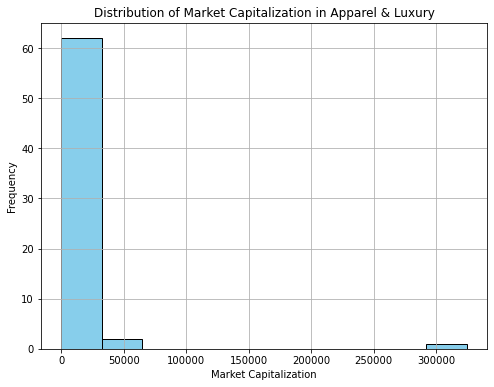

Sector Analysis: Chemicals
          market_cap     pe_ratio    pb_ratio   div_yield   book_value  \
count     231.000000   231.000000  231.000000  231.000000   231.000000   
mean     7442.354156    93.465584    4.262900    0.863853   276.936209   
std     23443.914422   593.731981    4.562937    1.998357   708.420882   
min        66.160000     0.000000    0.000000    0.000000  -155.951675   
25%       438.000000    12.840000    1.595000    0.110000    54.534577   
50%      1419.280000    25.160000    2.800000    0.360000   146.203579   
75%      4801.655000    49.340000    5.285000    0.970000   295.574874   
max    288497.920000  7282.000000   35.850000   24.050000  9972.408333   

              eps          roe  
count  231.000000   231.000000  
mean    26.259004    -2.900794  
std     54.157845   228.680718  
min   -171.530000 -3451.865100  
25%      2.630000     4.515450  
50%     11.920000    10.483800  
75%     32.355000    17.502300  
max    528.750000   216.886300  



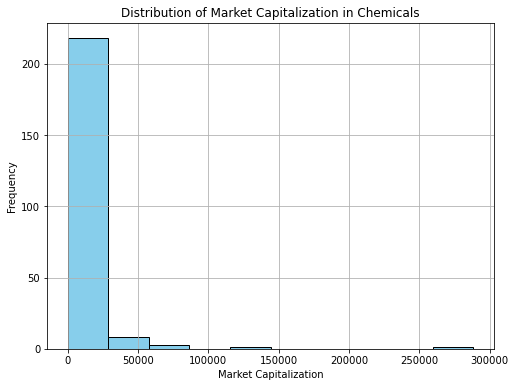

Sector Analysis: Energy
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      35.00000   35.000000  35.000000  35.000000    35.000000   
mean    32451.02600   41.436286   6.316286   0.472000    24.673493   
std     81448.36634   60.465164  14.270119   0.917887   752.032474   
min        75.70000    0.000000   0.000000   0.000000 -3952.433011   
25%       255.14500    4.785000   1.120000   0.000000    12.945042   
50%      2059.61000   23.130000   2.130000   0.000000    50.081249   
75%      8851.26000   51.175000   3.970000   0.490000   124.615609   
max    327407.93000  230.090000  77.890000   3.990000  1696.055227   

              eps         roe  
count   35.000000   35.000000  
mean     9.848857    2.916243  
std     56.897787   51.144614  
min   -232.730000 -269.532800  
25%      0.195000    0.727400  
50%      4.490000    6.514200  
75%     19.320000   15.422200  
max    214.520000   59.219100  



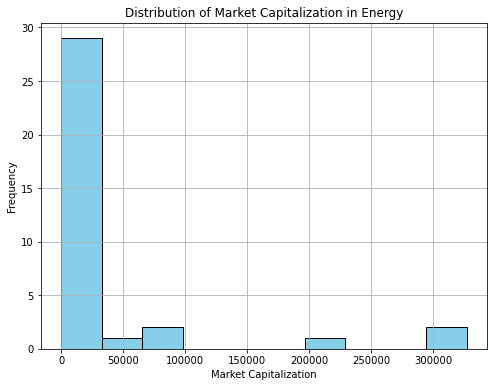

Sector Analysis: Building Materials
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      51.000000   51.000000  51.000000  51.000000    51.000000   
mean    17787.422941   34.966471   2.956275   0.496471   378.512441   
std     47882.817691   56.919548   3.145697   0.792810   826.535762   
min        82.640000    0.000000   0.000000   0.000000  -172.789640   
25%       460.410000    0.510000   1.310000   0.000000    51.810922   
50%      2020.090000   22.580000   2.180000   0.210000   119.985032   
75%      8654.070000   40.405000   3.415000   0.515000   309.882473   
max    286241.050000  310.530000  18.380000   3.550000  5403.258477   

              eps        roe  
count   51.000000  51.000000  
mean    28.807843   2.999627  
std     95.499794  20.544856  
min    -89.600000 -61.324400  
25%     -0.125000   1.456900  
50%      6.820000   5.828500  
75%     25.550000   9.236050  
max    622.660000  78.067500  



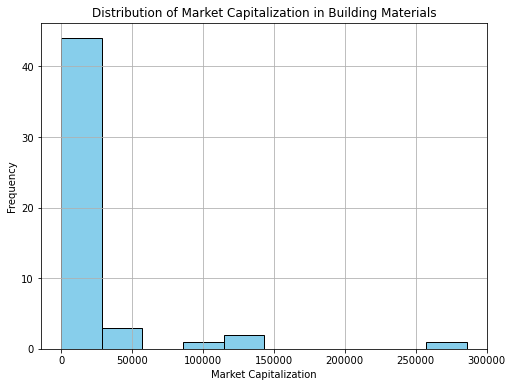

Sector Analysis: Transport Infra
          market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count      16.000000  16.000000  16.000000  16.000000   16.000000   16.000000   
mean    25326.335625  15.704375   6.368125   0.245625   46.570907   -4.640625   
std     70529.522709  18.203162  13.226419   0.767437  170.322740   33.197970   
min        82.350000   0.000000   0.000000   0.000000 -350.868532 -120.600000   
25%       314.127500   0.000000   0.675000   0.000000    3.193000   -3.925000   
50%      1625.620000   6.265000   2.120000   0.000000   31.371736    0.800000   
75%      4380.165000  32.752500   5.932500   0.000000   45.610636    7.857500   
max    282319.360000  48.310000  54.050000   3.070000  518.435929   33.470000   

              roe  
count   16.000000  
mean     0.216369  
std     46.070334  
min   -111.318900  
25%     -2.697025  
50%     10.378000  
75%     17.970400  
max     63.257200  



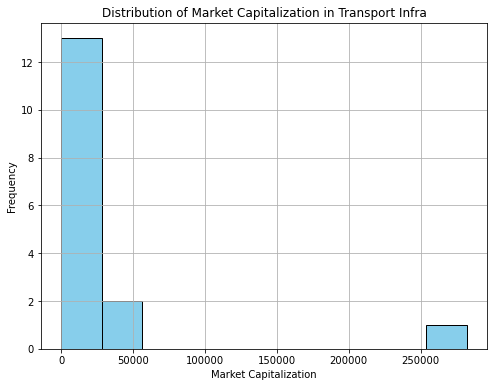

Sector Analysis: Electric Utilities
          market_cap    pe_ratio   pb_ratio  div_yield  book_value  \
count      10.000000   10.000000  10.000000  10.000000   10.000000   
mean    62925.116000   39.429000   3.545000   1.187000   98.761761   
std     81643.610487   48.754128   2.643034   1.534109   83.557912   
min       116.520000    0.000000   0.930000   0.000000   10.361358   
25%      4204.632500    3.107500   1.702500   0.000000   39.495909   
50%     32445.545000   23.350000   3.125000   0.370000   90.085409   
75%    102751.277500   49.307500   4.522500   2.032500  103.571279   
max    255627.100000  145.630000   9.940000   4.020000  246.599311   

              eps        roe  
count   10.000000  10.000000  
mean    -1.425000   6.178880  
std     37.684686  10.073978  
min   -103.330000 -12.446700  
25%     -0.185000  -1.553175  
50%      6.330000   9.072800  
75%     11.057500  12.399125  
max     38.540000  18.366800  



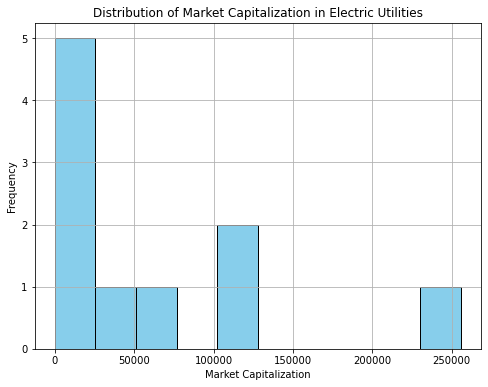

Sector Analysis: Food Products
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     138.000000  138.000000  138.000000  138.000000   138.000000   
mean     6490.564130   39.373696    4.869130    0.393986   185.739915   
std     25591.137933   68.865639    8.538153    0.602976   426.616353   
min        36.810000    0.000000    0.000000    0.000000  -192.054589   
25%       187.345000    0.267500    1.155000    0.000000    20.012533   
50%       473.100000   14.970000    2.275000    0.065000    63.689706   
75%      2540.415000   42.330000    5.377500    0.540000   174.926474   
max    239843.740000  533.380000   77.550000    2.950000  4265.833020   

              eps         roe  
count  138.000000  138.000000  
mean    16.202174    7.675980  
std     61.700278   22.034506  
min   -172.080000 -140.686600  
25%     -0.005000    0.666825  
50%      5.740000    9.300300  
75%     16.572500   15.335875  
max    540.230000   96.958000  



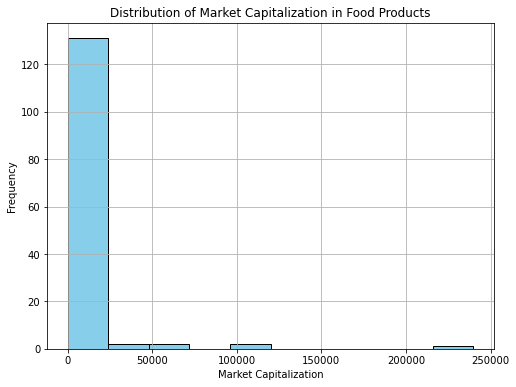

Sector Analysis: Financial Services
          market_cap     pe_ratio   pb_ratio  div_yield    book_value  \
count      44.000000    44.000000  44.000000  44.000000     44.000000   
mean    27997.726364   182.739773   3.405682   1.406591    466.617714   
std     59897.684158   838.387075   4.424549   5.706968   1630.975327   
min        70.860000     0.000000   0.000000   0.000000   -339.749945   
25%       162.522500     8.982500   1.347500   0.000000     19.670809   
50%       677.790000    18.400000   1.885000   0.060000     79.121998   
75%     15211.722500    32.580000   3.490000   0.995000    198.719966   
max    251377.240000  5439.000000  22.730000  37.980000  10064.545454   

              eps        roe  
count   44.000000  44.000000  
mean    34.134545   9.328068  
std    123.198130   8.606399  
min    -89.760000 -16.246500  
25%      0.517500   5.532450  
50%      6.090000   8.503850  
75%     22.705000  13.634700  
max    627.370000  31.525600  



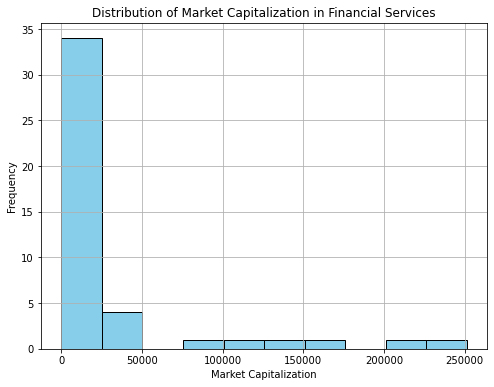

Sector Analysis: Consumer Retail
          market_cap    pe_ratio   pb_ratio  div_yield  book_value      eps  \
count      10.000000   10.000000  10.000000  10.000000   10.000000  10.0000   
mean    25157.371000   40.884000   4.682000   0.021000   85.990328  10.9340   
std     75505.645309   45.300682   4.983791   0.053841  112.255137  48.1702   
min        80.770000    0.000000   0.000000   0.000000  -31.702089 -81.9800   
25%       189.450000    7.317500   1.530000   0.000000   15.250879   1.0825   
50%       503.630000   27.895000   3.120000   0.000000   49.515035   3.9550   
75%      1003.967500   48.465000   5.490000   0.000000  119.650901  30.8975   
max    239938.300000  138.430000  13.770000   0.170000  288.372093  91.9500   

              roe  
count   10.000000  
mean    58.067280  
std    114.674419  
min      3.831300  
25%      8.041475  
50%     17.841850  
75%     27.706950  
max    376.449800  



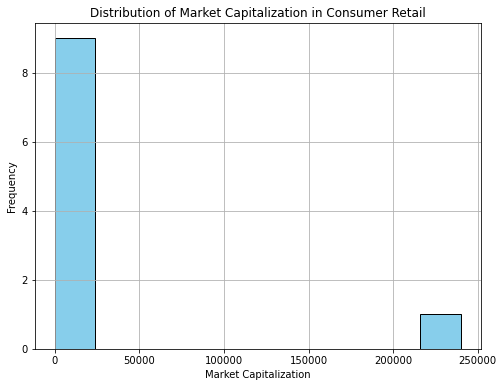

Sector Analysis: Aerospace & Defense
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      13.000000   13.000000  13.000000  13.000000   13.000000  13.000000   
mean    34798.269231   61.633846   7.445385   0.450769  147.392822  26.477692   
std     63608.965471   35.101715   2.068206   0.378494  104.320815  28.679155   
min       536.800000   26.320000   3.310000   0.000000   16.548074   0.900000   
25%      2840.370000   33.510000   6.700000   0.020000   89.377173   6.790000   
50%      3610.030000   42.980000   7.350000   0.550000  136.487298  21.670000   
75%     31333.760000   86.500000   9.280000   0.780000  214.641230  29.640000   
max    205865.660000  133.390000  10.900000   0.960000  376.136182  91.860000   

             roe  
count  13.000000  
mean   15.179515  
std     8.123844  
min     1.034300  
25%    10.923900  
50%    13.682400  
75%    22.427200  
max    29.201000  



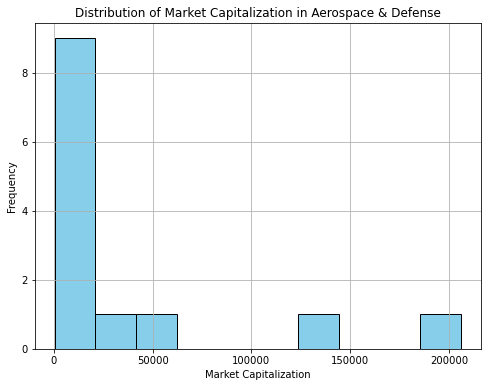

Sector Analysis: Metals & Mining
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     138.000000  138.000000  138.000000  138.000000   138.000000   
mean    10781.884493   30.616232    4.114493    0.816594   142.042061   
std     29723.993354   67.110111    5.133991    3.831395   386.114195   
min        92.440000    0.000000    0.000000    0.000000  -777.353563   
25%       249.525000   10.897500    1.770000    0.000000    22.461591   
50%      1281.455000   20.370000    2.780000    0.080000    69.534288   
75%      5136.472500   29.692500    4.620000    0.517500   161.536711   
max    200649.500000  711.450000   43.660000   38.060000  4100.850228   

              eps         roe  
count  138.000000  138.000000  
mean    20.504565   10.819543  
std     36.690624   21.014552  
min   -131.550000  -83.175800  
25%      1.622500    5.520100  
50%     11.035000   11.290900  
75%     28.302500   18.353500  
max    200.010000   84.370000  



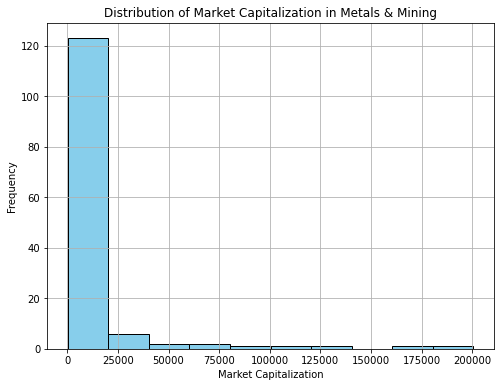

Sector Analysis: Beverages
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      18.000000   18.000000  18.000000  18.000000   18.000000  18.000000   
mean    19696.082778   43.354444   7.360556   0.237222  103.168277  10.611111   
std     46356.687597   40.082958   7.241218   0.386185  190.119682  21.965248   
min       140.870000    0.000000   0.000000   0.000000 -292.486931 -53.320000   
25%       384.400000   13.207500   1.777500   0.000000    4.488065   2.592500   
50%      1074.335000   25.940000   5.920000   0.080000   57.837118  10.885000   
75%      5030.527500   76.860000  11.330000   0.202500  167.289472  17.042500   
max    184715.590000  135.310000  26.630000   1.350000  587.630736  54.700000   

              roe  
count   18.000000  
mean    -0.590128  
std     37.610898  
min   -125.312300  
25%      4.034875  
50%     12.194400  
75%     17.966725  
max     29.639200  



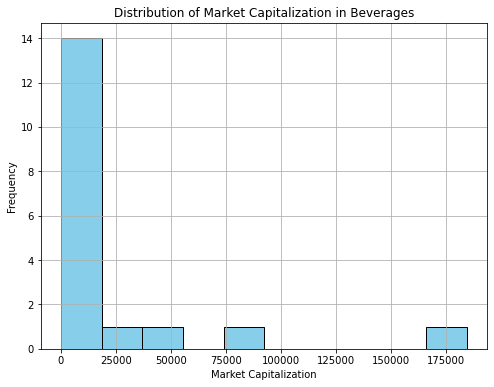

Sector Analysis: Industrial Conglomerates
          market_cap   pe_ratio   pb_ratio  div_yield   book_value  \
count      11.000000  11.000000  11.000000  11.000000    11.000000   
mean    23938.020000  22.567273   5.405455   1.150909   392.031420   
std     45703.425782  27.551131   6.147893   1.671529   490.978146   
min       156.180000   0.000000   0.000000   0.000000    -6.836282   
25%       877.845000   0.000000   1.100000   0.000000    55.203199   
50%      6077.580000   9.960000   2.610000   0.230000   244.263001   
75%     25923.350000  35.055000   9.155000   1.955000   483.031014   
max    156578.950000  78.150000  18.920000   4.940000  1632.969122   

              eps        roe  
count   11.000000  11.000000  
mean    81.116364  10.404227  
std    147.843146  19.282485  
min    -16.300000 -35.504700  
25%     -1.435000   4.954350  
50%     19.950000  12.167600  
75%     67.440000  22.050200  
max    484.720000  31.824400  



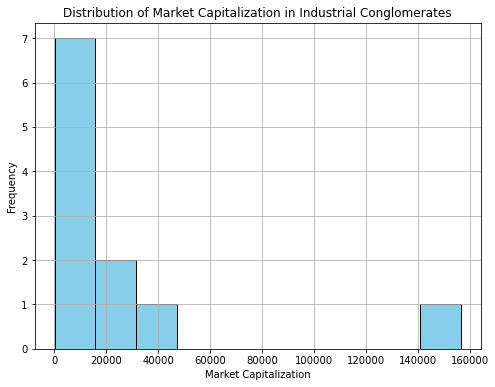

Sector Analysis: Specialty Retail
          market_cap     pe_ratio   pb_ratio  div_yield   book_value  \
count      33.000000    33.000000  33.000000  33.000000    33.000000   
mean     9515.013030   110.142424   9.250303   0.219091   176.731419   
std     25681.645394   267.011399  11.000944   0.435448   434.733885   
min        53.670000     0.000000   0.000000   0.000000  -100.426529   
25%       773.070000    20.900000   2.720000   0.000000    33.324156   
50%      1864.570000    44.090000   5.800000   0.000000    69.796663   
75%      6087.200000    78.720000   8.390000   0.220000   127.303577   
max    142969.950000  1511.000000  49.070000   1.940000  2498.877778   

              eps         roe  
count   33.000000   33.000000  
mean     9.100606   -4.857006  
std     26.319942  105.894047  
min   -105.810000 -587.551900  
25%      2.250000    2.680200  
50%      6.020000   10.581000  
75%     16.900000   21.210300  
max     63.180000   74.055400  



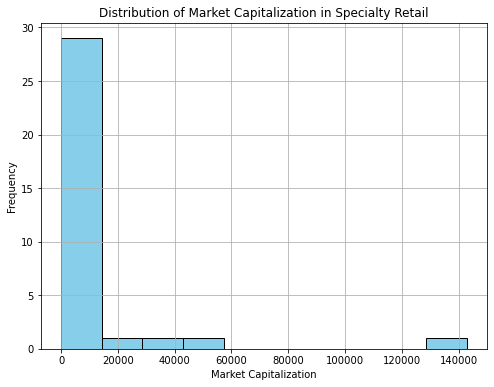

Sector Analysis: Restaurants
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      13.000000   13.000000  13.000000  13.000000   13.000000  13.000000   
mean    17234.050769   65.172308   9.732308   0.177692   88.078055   7.280769   
std     37596.461735   60.056364   7.285308   0.310461  135.694101  14.369082   
min        91.180000    0.000000   0.470000   0.000000    2.300484  -6.180000   
25%       638.970000   14.570000   4.900000   0.000000   14.125083   0.530000   
50%      2459.700000   46.900000   6.650000   0.000000   31.632905   1.750000   
75%     12876.430000  106.590000  15.670000   0.240000   97.939800   5.680000   
max    138206.010000  165.360000  22.860000   0.990000  491.138671  43.790000   

             roe  
count  13.000000  
mean    7.810815  
std    16.237680  
min   -29.987800  
25%    -2.520500  
50%    11.259900  
75%    19.114400  
max    29.341200  



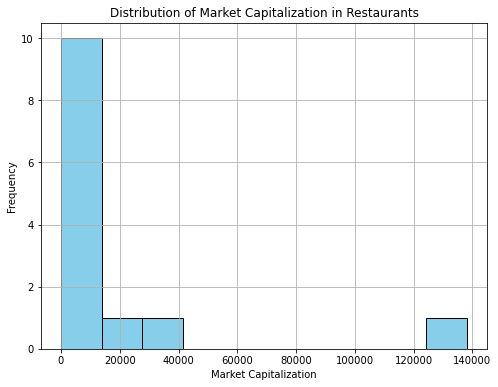

Sector Analysis: Gas Utilities
          market_cap    pe_ratio   pb_ratio  div_yield  book_value  \
count       7.000000    7.000000   7.000000   7.000000    7.000000   
mean    48229.115714   43.427143   7.484286   1.340000  178.697098   
std     47266.165017   63.155257  11.843891   1.157483  144.166054   
min      2314.530000   11.600000   1.650000   0.020000   29.420816   
25%     18152.435000   14.275000   2.300000   0.560000  106.867519   
50%     30775.540000   15.790000   3.210000   1.220000  128.658712   
75%     74123.090000   31.340000   4.360000   2.030000  202.668163   
max    119962.690000  185.370000  34.210000   2.960000  473.728795   

              eps        roe  
count    7.000000   7.000000  
mean    34.248571  17.422171  
std     43.364204   5.319797  
min      5.430000   7.252200  
25%     14.150000  16.466500  
50%     19.670000  17.702600  
75%     27.725000  19.769500  
max    130.890000  24.528400  



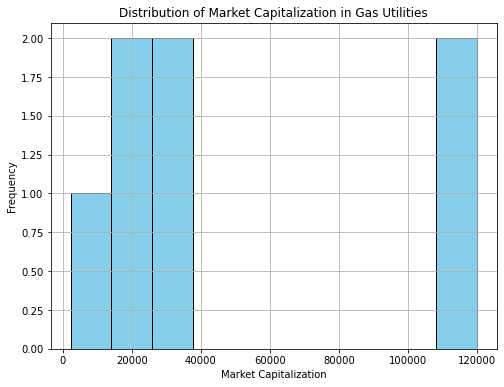

Sector Analysis: Airlines
          market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count       2.000000   2.000000       2.0        2.0    2.000000    2.00000   
mean    61202.330000   8.165000       0.0        0.0  -79.328675   92.15500   
std     79700.169054  11.547054       0.0        0.0    4.903509  133.36741   
min      4845.800000   0.000000       0.0        0.0  -82.795980   -2.15000   
25%     33024.065000   4.082500       0.0        0.0  -81.062328   45.00250   
50%     61202.330000   8.165000       0.0        0.0  -79.328675   92.15500   
75%     89380.595000  12.247500       0.0        0.0  -77.595023  139.30750   
max    117558.860000  16.330000       0.0        0.0  -75.861370  186.46000   

              roe  
count    2.000000  
mean   -94.686650  
std    137.577594  
min   -191.968700  
25%   -143.327675  
50%    -94.686650  
75%    -46.045625  
max      2.595400  



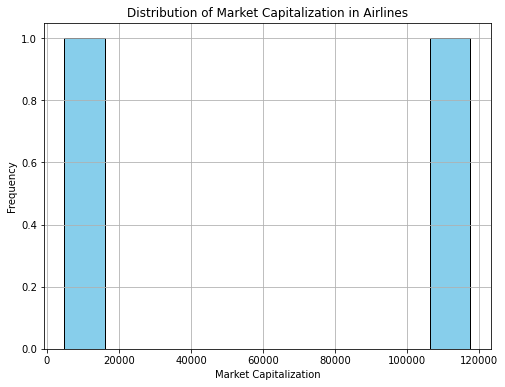

Sector Analysis: Life Sciences
         market_cap   pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     11.000000  11.000000  11.000000  11.000000   11.000000  11.000000   
mean   13054.280000  24.470909   4.160909   0.197273  148.595512  11.046364   
std    29830.238261  26.411933   2.500730   0.322183  148.598865  17.576516   
min       88.040000   0.000000   0.560000   0.000000   15.518966  -9.840000   
25%      707.260000   0.000000   2.170000   0.000000   36.053695  -3.360000   
50%     2332.300000  20.080000   4.100000   0.000000  111.109487  10.390000   
75%     3125.240000  41.900000   5.705000   0.290000  166.984235  16.565000   
max    98972.000000  71.560000   7.890000   0.800000  477.536502  52.100000   

             roe  
count  11.000000  
mean    0.744964  
std    16.764841  
min   -34.137500  
25%    -8.497150  
50%    10.375700  
75%    12.017650  
max    19.903400  



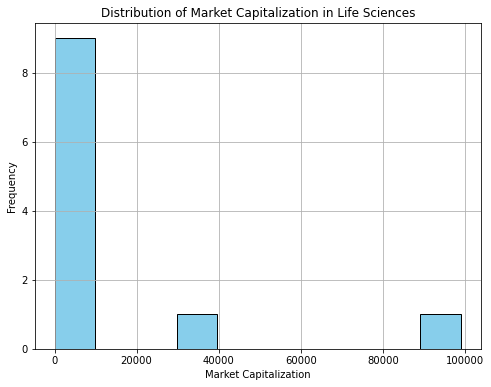

Sector Analysis: Electrical Equip.
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count     77.000000   77.000000  77.000000  77.000000    77.000000   
mean   10001.297922   50.819870   7.771558   0.268442   268.388638   
std    20886.445270   59.420743   8.729680   0.491486   584.921702   
min       89.090000    0.000000   0.000000   0.000000   -29.060431   
25%      266.280000   18.900000   2.320000   0.000000    25.806399   
50%     1191.390000   30.870000   5.290000   0.000000    68.684639   
75%    11251.680000   60.380000   9.740000   0.360000   253.340703   
max    95819.670000  351.320000  60.510000   2.500000  3374.412698   

              eps         roe  
count   77.000000   77.000000  
mean    22.455714   15.897931  
std     86.633285   52.373889  
min   -159.070000  -70.771300  
25%      1.720000    4.828400  
50%      6.880000   11.230700  
75%     24.500000   17.634300  
max    605.080000  444.459100  



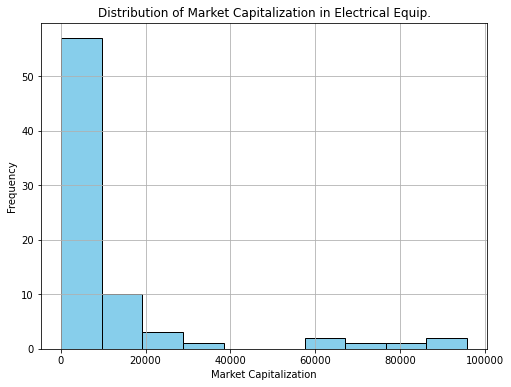

Sector Analysis: Health Care
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     33.000000   33.000000  33.000000  33.000000   33.000000   33.000000   
mean   13028.555152   59.014242   6.998788   0.282121  139.424421   18.570909   
std    22266.234115   74.368832   4.121858   0.572198  140.864061   31.454201   
min       53.510000    0.000000   0.000000   0.000000   -4.075641  -13.120000   
25%     1219.280000   29.720000   4.110000   0.000000   58.351339    1.870000   
50%     3397.860000   48.180000   6.250000   0.160000   99.426886   10.880000   
75%    15157.770000   60.950000  10.920000   0.250000  197.035727   22.430000   
max    94914.410000  424.570000  14.600000   3.010000  713.983912  144.530000   

             roe  
count  33.000000  
mean   10.110145  
std    12.819741  
min   -21.679100  
25%     7.067400  
50%    12.028800  
75%    18.620700  
max    31.294300  



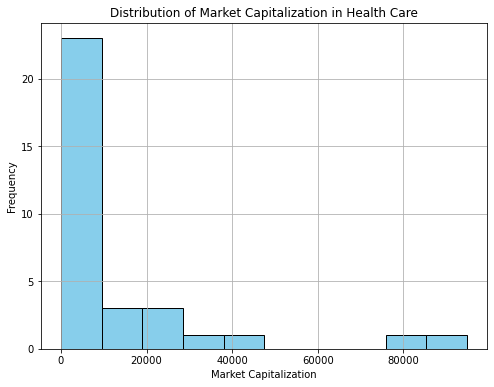

Sector Analysis: Auto Components
         market_cap     pe_ratio    pb_ratio   div_yield   book_value  \
count    107.000000   107.000000  107.000000  107.000000   107.000000   
mean    7742.014206    56.158879    5.151121    0.560280   258.449585   
std    15798.606031   126.944307    6.874551    0.663131   460.575417   
min       77.430000     0.000000    0.000000    0.000000   -88.248070   
25%      367.245000    18.575000    2.415000    0.000000    50.843751   
50%     1341.760000    30.190000    3.690000    0.390000   139.764473   
75%     5009.940000    49.400000    5.490000    0.770000   243.230969   
max    83541.470000  1141.810000   63.070000    3.200000  3927.319124   

              eps         roe  
count  107.000000  107.000000  
mean    36.423925   10.780658  
std     90.605512   13.780271  
min    -53.300000  -67.497500  
25%      3.660000    6.786650  
50%     12.780000   11.550100  
75%     31.970000   16.011350  
max    788.440000   57.501100  



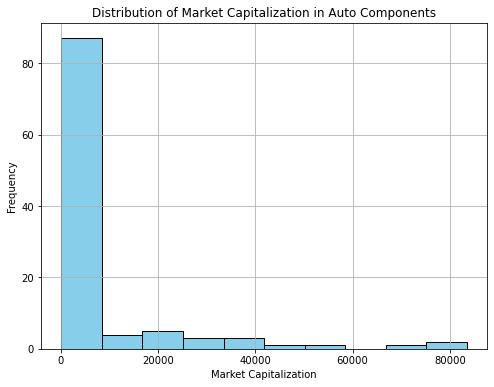

Sector Analysis: Capital Markets
         market_cap      pe_ratio    pb_ratio   div_yield    book_value  \
count    117.000000    117.000000  117.000000  117.000000    117.000000   
mean    5070.888803    258.681111    5.751197    0.674530   1584.700825   
std    10757.114010   2366.324753   13.000719    1.576678   4621.178002   
min       41.020000      0.000000    0.100000    0.000000      0.017515   
25%      230.920000      9.640000    0.840000    0.000000     39.035966   
50%      703.580000     19.010000    1.830000    0.000000    107.482130   
75%     3288.240000     39.780000    5.050000    0.570000    417.452403   
max    82731.450000  25610.360000  122.750000   10.140000  26735.620000   

               eps         roe  
count   117.000000  117.000000  
mean     99.454615   11.259948  
std     428.501478   14.809237  
min     -14.670000  -26.584400  
25%       2.860000    2.437800  
50%      13.630000    8.391200  
75%      53.370000   17.715900  
max    3423.330000   99.859

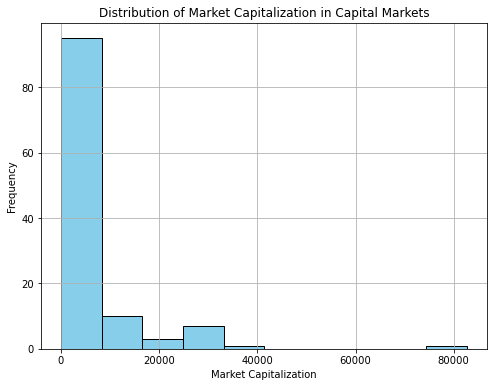

Sector Analysis: Commercial Serv
         market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     24.000000   24.000000  24.000000  24.000000   24.000000  24.000000   
mean    5148.617917   42.736667   6.174167   0.456250  118.126170  10.375833   
std    15153.405876   54.991612   7.220434   1.021613  134.857940  19.103299   
min      107.270000    0.000000   0.000000   0.000000  -21.960035 -54.970000   
25%      603.567500   19.555000   2.690000   0.000000   32.184010   3.042500   
50%     1036.690000   27.280000   3.445000   0.000000   83.474306  10.210000   
75%     2835.177500   46.690000   4.922500   0.320000  139.199038  21.912500   
max    75284.000000  278.550000  26.910000   3.800000  614.844556  53.910000   

             roe  
count  24.000000  
mean   14.318158  
std    13.542097  
min   -21.686300  
25%     4.502950  
50%    14.589550  
75%    21.403750  
max    40.503300  



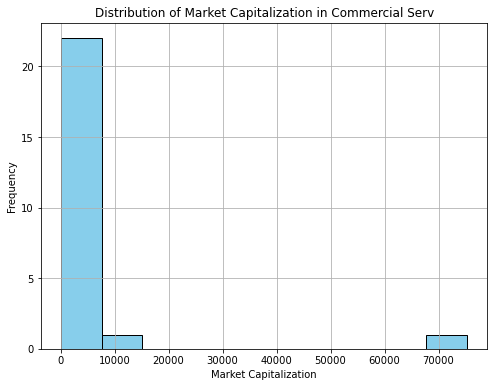

Sector Analysis: Hotels & Leisure
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     40.000000   40.000000  40.000000  40.000000   40.000000   40.000000   
mean    4996.731000   39.263750   5.412250   0.269750   71.101236   11.535000   
std    12651.110398   42.996182   4.201144   0.510733  141.504678   48.553524   
min       84.030000    0.000000   0.000000   0.000000 -146.438869  -98.810000   
25%      268.312500   15.230000   2.035000   0.000000   17.943973    0.672500   
50%      741.715000   28.440000   4.720000   0.000000   41.143828    4.725000   
75%     4074.297500   51.535000   7.275000   0.290000   78.671153    9.600000   
max    76495.250000  235.760000  16.410000   2.150000  848.613846  246.440000   

              roe  
count   40.000000  
mean     6.532578  
std     33.239829  
min   -166.981700  
25%      3.402400  
50%     13.043050  
75%     17.657975  
max     46.007000  



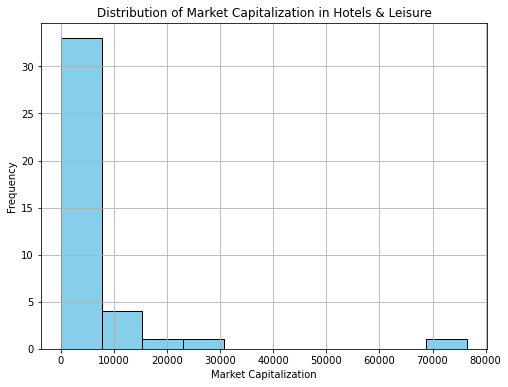

Sector Analysis: Software
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     46.000000   46.000000  46.000000  46.000000   46.000000   46.000000   
mean    6242.437609   54.671957   5.862174   0.355652  120.062400   17.841957   
std    13835.317392  110.461241   5.632319   0.569451  166.127276   45.007243   
min       76.850000    0.000000   0.640000   0.000000    1.147663  -74.810000   
25%      280.515000   14.805000   2.180000   0.000000   18.720951    0.467500   
50%      813.145000   27.005000   3.580000   0.000000   66.921382    4.225000   
75%     3546.090000   58.392500   8.017500   0.485000  116.835221   19.880000   
max    68676.590000  726.640000  24.660000   2.830000  749.797624  246.830000   

              roe  
count   46.000000  
mean    -0.234137  
std     60.975994  
min   -387.669600  
25%      2.806650  
50%      9.510650  
75%     17.017100  
max     37.459000  



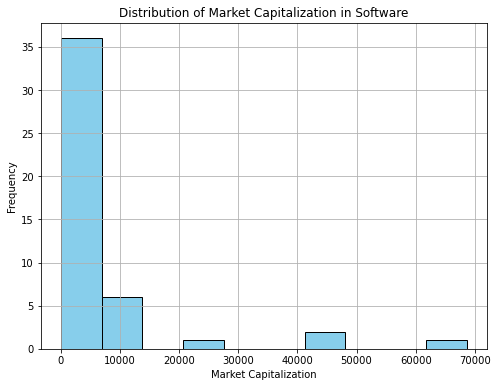

Sector Analysis: Media & Services
         market_cap    pe_ratio  pb_ratio  div_yield   book_value        eps  \
count      4.000000    4.000000  4.000000   4.000000     4.000000   4.000000   
mean   19180.805000   81.700000  2.395000   0.335000   523.106935  19.825000   
std    32823.213603  133.840987  1.861872   0.462277   693.546052  16.122424   
min      132.320000    0.000000  0.000000   0.000000    -0.907862  -0.410000   
25%      881.367500   16.492500  1.432500   0.000000    90.381849  13.922500   
50%     4201.765000   22.485000  2.685000   0.180000   284.845481  20.405000   
75%    22501.202500   87.692500  3.647500   0.515000   717.570567  26.307500   
max    68187.370000  281.830000  4.210000   0.980000  1523.644642  38.900000   

             roe  
count   4.000000  
mean   14.730825  
std    12.426211  
min     1.908900  
25%     6.649350  
50%    13.355700  
75%    21.437175  
max    30.303000  



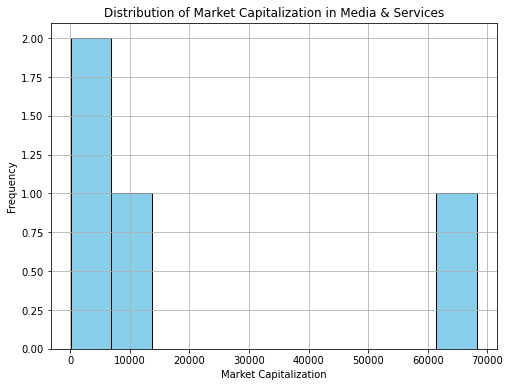

Sector Analysis: Road & Rail
       market_cap  pe_ratio  pb_ratio  div_yield  book_value    eps     roe
count        1.00       1.0      1.00       1.00    1.000000   1.00   1.000
mean     59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
std           NaN       NaN       NaN        NaN         NaN    NaN     NaN
min      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
25%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
50%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
75%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
max      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225



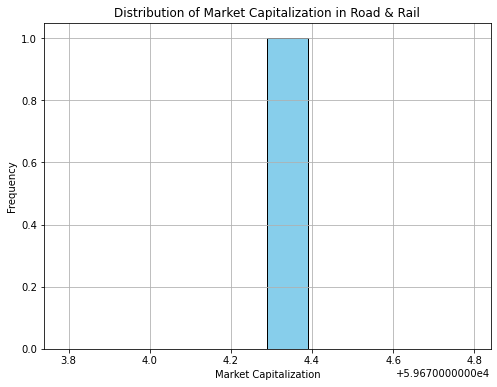

Sector Analysis: Professional Services
        market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     10.00000  10.000000  10.000000  10.000000   10.000000   10.000000   
mean   10392.54900  35.521000   5.784000   0.682000  148.960292   24.995000   
std    17610.07288  21.275471   3.390163   0.947661  164.547419   39.417195   
min       82.21000   0.000000   1.670000   0.000000   12.022149   -4.240000   
25%      235.67000  19.235000   2.782500   0.000000   63.373002    7.290000   
50%     4654.21500  36.900000   6.755000   0.120000   75.004648    8.195000   
75%     9769.89250  47.737500   7.602500   1.300000  163.414064   18.047500   
max    57693.29000  71.440000  12.050000   2.710000  453.044566  123.250000   

             roe  
count  10.000000  
mean    8.906970  
std    19.211701  
min   -43.734600  
25%    10.931050  
50%    13.185950  
75%    16.154175  
max    26.381300  



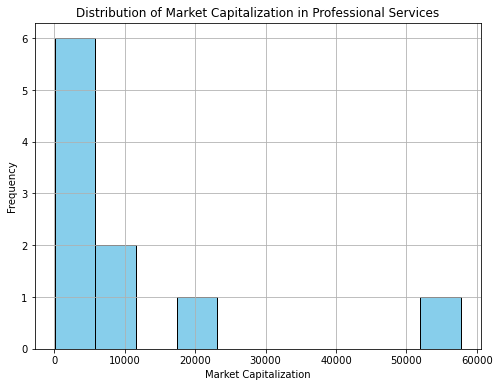

Sector Analysis: Machinery
         market_cap    pe_ratio   pb_ratio   div_yield   book_value  \
count    142.000000  142.000000  142.00000  142.000000   142.000000   
mean    5187.366690   36.342113    6.02162    0.437817   241.756854   
std    10495.599106   24.568627    4.31922    0.637030   353.184296   
min       79.080000    0.000000    0.00000    0.000000  -311.166500   
25%      271.597500   20.957500    2.77500    0.000000    40.468970   
50%      998.215000   31.155000    5.29000    0.205000   122.541047   
75%     4878.852500   50.190000    8.95000    0.652500   289.970427   
max    72561.260000  133.290000   26.69000    3.860000  2373.118974   

              eps         roe  
count  142.000000  142.000000  
mean    39.590423   14.338269  
std     67.539273   17.790310  
min    -38.620000 -118.253700  
25%      4.755000    8.503325  
50%     19.235000   15.196100  
75%     50.385000   20.534000  
max    494.210000   88.744100  



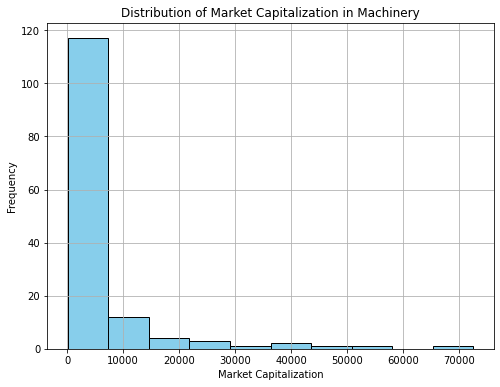

Sector Analysis: Building Products
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     32.000000   32.000000  32.000000  32.000000   32.000000   32.000000   
mean    4776.015625   44.254062   5.009062   0.286875  123.229021   17.616562   
std    10547.813919   52.262297   5.092953   0.386376  173.470591   33.779919   
min       51.910000    0.000000   0.000000   0.000000  -57.595973  -20.900000   
25%      253.687500   17.582500   1.765000   0.000000   26.183159    1.407500   
50%      633.260000   31.450000   3.610000   0.130000  100.025292   10.080000   
75%     2937.965000   48.132500   6.015000   0.457500  140.552601   20.630000   
max    52844.310000  229.790000  22.840000   1.540000  938.051481  174.400000   

             roe  
count  32.000000  
mean    9.432650  
std    19.131257  
min   -81.526000  
25%     3.759975  
50%    12.498650  
75%    16.877400  
max    34.074600  



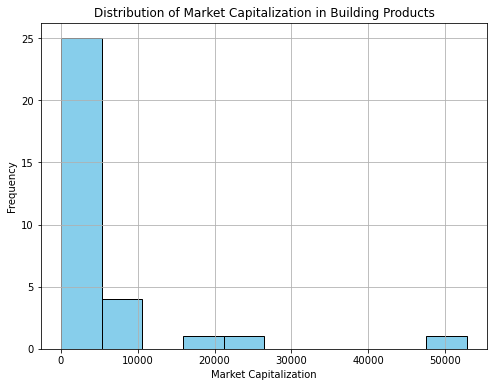

Sector Analysis: Household Durables
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     35.000000   35.000000  35.000000  35.000000   35.000000   35.000000   
mean    5460.027429   62.321143   7.069714   0.471429  133.056384   15.204000   
std     7963.692351   52.589287   9.034644   1.263006  140.821388   34.014014   
min      106.880000    0.000000   0.000000   0.000000  -34.758712  -46.190000   
25%      365.720000   31.745000   3.545000   0.000000   36.982559    3.560000   
50%     1608.130000   53.960000   4.730000   0.000000   94.430140    7.710000   
75%     7790.275000   79.115000   6.735000   0.475000  189.038802   16.285000   
max    38160.820000  246.750000  51.300000   7.260000  580.553763  186.220000   

             roe  
count  35.000000  
mean    9.108100  
std     9.515928  
min   -17.574900  
25%     5.307900  
50%     8.017500  
75%    15.024700  
max    34.705200  



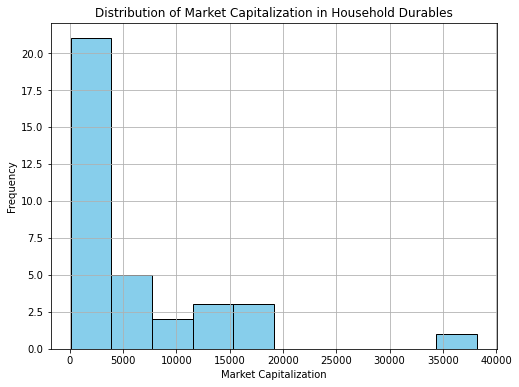

Sector Analysis: Air Freight & Logistics
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     20.000000   20.000000  20.000000  20.000000   20.000000   20.000000   
mean    4726.037000   97.140500   7.842500   0.359500  102.537435    2.578000   
std     7838.960292  179.403646  17.163377   0.515165  164.352001   47.544449   
min       38.130000    0.000000   0.000000   0.000000  -31.974680 -156.170000   
25%      218.637500    0.000000   1.860000   0.000000   16.193694   -0.815000   
50%     1335.800000   29.010000   3.310000   0.000000   38.471716    1.130000   
75%     6189.295000   74.960000   5.972500   0.645000  104.106829    4.690000   
max    33517.700000  677.940000  79.520000   1.840000  580.394444  123.330000   

                roe  
count     20.000000  
mean    -533.470845  
std     2413.706373  
min   -10788.103200  
25%       -2.154550  
50%        3.649550  
75%       13.878525  
max       24.037100  



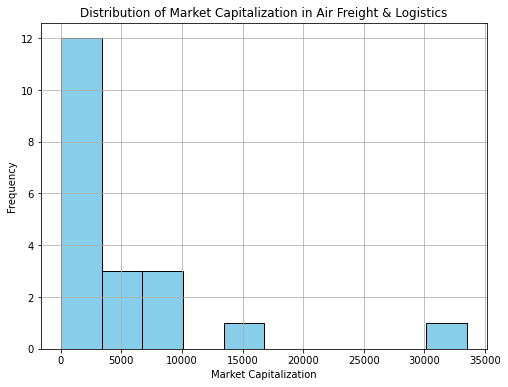

Sector Analysis: Tech Hardware
         market_cap     pe_ratio   pb_ratio  div_yield   book_value  \
count     51.000000    51.000000  51.000000  51.000000    51.000000   
mean    3843.628824   101.101569   6.204118   0.312549   202.520443   
std     7017.044959   254.327701   5.668126   0.739399   658.522692   
min       69.040000     0.000000   0.000000   0.000000    -7.730265   
25%      182.510000     6.470000   2.025000   0.000000    18.784585   
50%      760.280000    46.120000   4.960000   0.000000    48.847784   
75%     4099.660000    75.895000   7.730000   0.265000   104.672993   
max    33939.320000  1726.500000  22.030000   3.650000  3772.556561   

              eps        roe  
count   51.000000  51.000000  
mean    22.993529   6.772835  
std     80.403220  20.807462  
min    -13.330000 -65.857600  
25%      0.045000  -0.051550  
50%      2.610000   7.417100  
75%     12.295000  15.605050  
max    526.280000  84.376100  



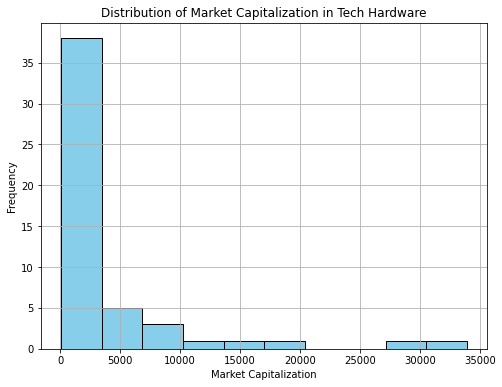

Sector Analysis: Biotechnology
         market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count      6.000000   6.000000  6.000000   6.000000    6.000000   6.000000   
mean    6220.823333  22.156667  3.268333   0.181667  105.984105   4.523333   
std    13848.898408  26.926717  2.740937   0.281881  131.767592   9.731170   
min       80.320000   0.000000  0.000000   0.000000   -7.535225  -4.180000   
25%      224.950000   0.000000  1.317500   0.000000    4.644679  -1.555000   
50%      712.120000  14.360000  3.030000   0.000000   76.233240   0.800000   
75%     1139.972500  36.850000  4.930000   0.390000  153.145486   7.962500   
max    34475.230000  64.660000  7.240000   0.570000  331.408651  21.710000   

             roe  
count   6.000000  
mean   -5.189967  
std    16.642992  
min   -28.134800  
25%   -18.160600  
50%     0.032400  
75%     7.792825  
max    10.775500  



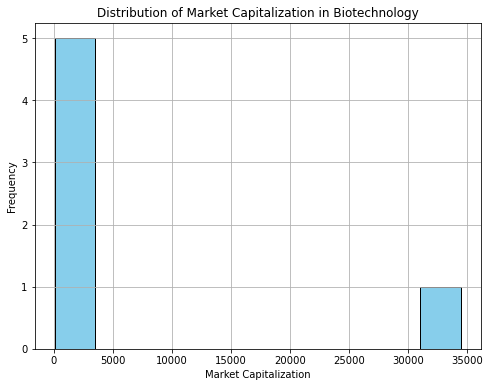

Sector Analysis: Media
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count     32.000000   32.000000  32.000000  32.000000    32.000000   
mean    3986.539375   59.720000   3.163438   1.476875   129.928277   
std     5816.470816   81.976699   3.280557   4.747052   255.276284   
min       89.250000    0.000000   0.000000   0.000000    -4.151938   
25%      786.470000    6.475000   1.005000   0.000000    22.912889   
50%     1625.720000   24.985000   1.925000   0.095000    75.672643   
75%     3835.492500   70.445000   3.865000   1.412500   128.286706   
max    24608.610000  265.270000  13.380000  26.960000  1466.591414   

              eps        roe  
count   32.000000  32.000000  
mean    12.673125   4.048028  
std     32.331166  11.600152  
min     -9.220000 -29.501900  
25%      0.187500   0.359100  
50%      3.960000   5.594050  
75%      8.537500   9.803250  
max    168.690000  26.993600  



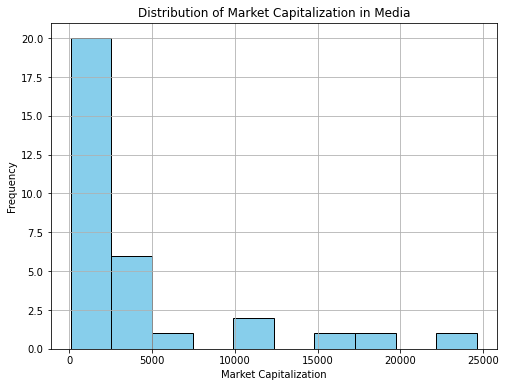

Sector Analysis: Textiles
         market_cap    pe_ratio    pb_ratio   div_yield    book_value  \
count    109.000000  109.000000  109.000000  109.000000    109.000000   
mean    1625.406239   24.190000    3.142844    0.570734    302.767507   
std     3861.675739   37.482981    5.930836    1.355212   1202.781746   
min       57.780000    0.000000    0.000000    0.000000   -133.398013   
25%      167.730000    0.000000    0.840000    0.000000     16.545131   
50%      335.150000   15.320000    1.450000    0.000000     78.047967   
75%      921.860000   30.130000    2.800000    0.520000    192.478167   
max    23013.840000  235.830000   49.930000    9.090000  12173.768678   

              eps          roe  
count  109.000000   109.000000  
mean    10.032018   -12.164194  
std     43.767034   139.781266  
min   -225.210000 -1417.384900  
25%     -1.410000    -0.232900  
50%      2.130000     5.538800  
75%     12.430000    10.310700  
max    240.770000    85.716800  



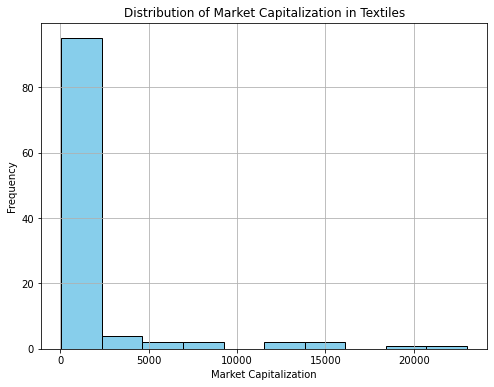

Sector Analysis: Household Products
         market_cap    pe_ratio   pb_ratio  div_yield  book_value       eps  \
count      4.000000    4.000000   4.000000   4.000000    4.000000   4.00000   
mean    5346.312500  236.642500   7.342500   0.270000   57.888002  12.58750   
std     8058.467098  393.907258   3.001515   0.322284   52.979585  15.22891   
min      120.380000   13.110000   3.460000   0.000000    4.886867   0.05000   
25%     1071.087500   40.410000   6.017500   0.000000   34.702155   4.58750   
50%     1960.805000   53.330000   7.665000   0.220000   47.697288   7.82000   
75%     6236.030000  249.562500   8.990000   0.490000   70.883134  15.82000   
max    17343.260000  826.800000  10.580000   0.640000  131.270566  34.66000   

             roe  
count   4.000000  
mean   13.126350  
std     9.254469  
min     0.807600  
25%     8.609100  
50%    15.574650  
75%    20.091900  
max    20.548500  



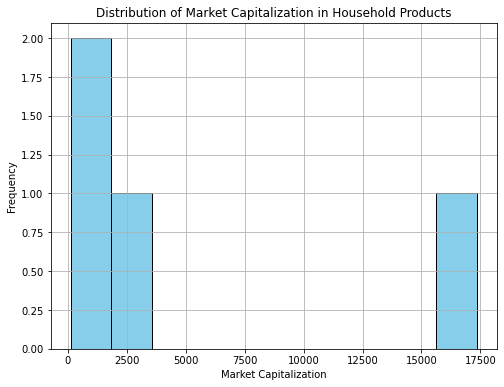

Sector Analysis: Paper & Wood Prods
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     33.000000   33.000000  33.000000  33.000000   33.000000   33.000000   
mean    2054.753939   26.203939   2.265455   0.745455  136.917280   19.958788   
std     3945.788139   41.464963   2.615908   0.999544  133.305301   33.084470   
min       67.060000    0.000000   0.000000   0.000000   -7.449647  -11.200000   
25%      191.320000    4.660000   0.930000   0.000000   44.507109    0.400000   
50%      396.030000    6.930000   1.330000   0.160000   93.327735    6.520000   
75%     1926.810000   29.170000   2.660000   1.740000  250.590593   21.800000   
max    16627.430000  207.820000  13.230000   3.810000  448.416442  128.760000   

             roe  
count  33.000000  
mean    9.566991  
std    20.981461  
min   -70.979200  
25%     0.738800  
50%     9.506800  
75%    21.126600  
max    63.083800  



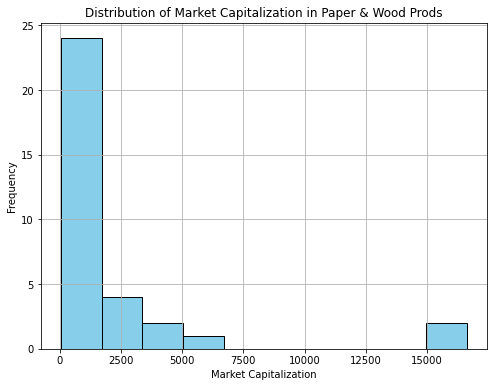

Sector Analysis: Entertainment
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     23.000000   23.000000  23.000000  23.000000   23.000000   23.000000   
mean    2234.443913   55.048261   5.705217   0.137826   93.130526    8.539565   
std     3449.268532  151.079590   7.376117   0.309721  163.072463   43.946415   
min       56.700000    0.000000   0.000000   0.000000   -9.278554  -24.040000   
25%      170.195000    0.000000   1.485000   0.000000    6.981405   -3.565000   
50%      446.610000    0.420000   3.360000   0.000000   42.186841    0.030000   
75%     3040.980000   48.675000   7.930000   0.050000   89.126757    3.680000   
max    13536.460000  736.000000  33.860000   1.160000  757.618440  206.750000   

             roe  
count  23.000000  
mean    7.095348  
std    23.083672  
min   -33.434500  
25%    -2.401850  
50%     1.914000  
75%     7.321650  
max    68.409700  



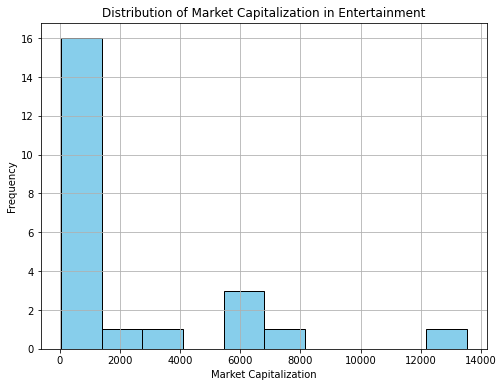

Sector Analysis: Marine
         market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count      4.000000   4.000000  4.000000   4.000000    4.000000   4.000000   
mean    3529.375000  22.517500  1.910000   0.485000  147.447546   0.900000   
std     4785.567631  19.072623  1.880869   0.532572  150.469769  13.204355   
min      607.520000   0.000000  0.700000   0.000000   21.021910 -16.090000   
25%      636.687500  10.590000  0.752500   0.142500   49.282333  -3.107500   
50%     1447.200000  23.930000  1.130000   0.365000  105.736596   1.775000   
75%     4339.887500  35.857500  2.287500   0.707500  203.901808   5.782500   
max    10615.580000  42.210000  4.680000   1.210000  357.295082  16.140000   

             roe  
count   4.000000  
mean    8.271175  
std     7.286764  
min     0.688700  
25%     2.958575  
50%     8.068050  
75%    13.380650  
max    16.259900  



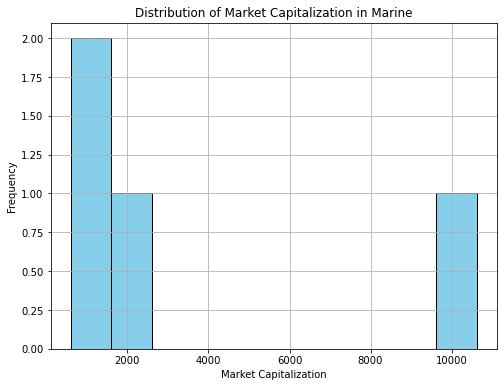

Sector Analysis: Semiconductors
        market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     7.000000    7.000000   7.000000   7.000000    7.000000   7.000000   
mean   1843.634286  201.322857   9.607143   0.022857   29.978619  -1.292857   
std    2556.842715  278.400788   4.700120   0.060474   29.596558   7.312539   
min     159.130000    0.000000   2.830000   0.000000    3.283120 -16.340000   
25%     528.755000    0.000000   7.755000   0.000000    6.162700  -0.980000   
50%    1036.150000   91.750000   8.040000   0.000000   11.424382   0.050000   
75%    1574.810000  324.570000  11.900000   0.000000   55.582027   0.685000   
max    7503.030000  668.370000  17.070000   0.160000   71.653379   7.830000   

             roe  
count   7.000000  
mean    1.857629  
std     8.138600  
min   -10.735900  
25%    -0.704650  
50%     1.233200  
75%     3.909100  
max    16.097200  



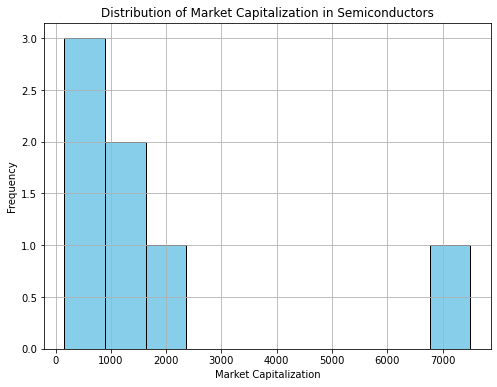

Sector Analysis: Consumer Services
        market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count    14.000000   14.000000  14.000000  14.000000   14.000000  14.000000   
mean   1096.533571   38.688571   5.898571   0.315714   43.974905  -1.562143   
std    1647.374381   77.899857   6.836447   0.591331   79.678126  20.527167   
min     128.240000    0.000000   0.000000   0.000000  -94.911471 -66.120000   
25%     255.677500    0.000000   1.667500   0.000000    7.252715  -0.342500   
50%     498.145000   16.420000   4.100000   0.000000   42.879765   0.590000   
75%    1314.190000   30.420000   7.085000   0.277500   59.498516   8.442500   
max    6496.800000  293.050000  24.490000   1.750000  277.838858  18.920000   

              roe  
count   14.000000  
mean    -1.134343  
std     60.255293  
min   -193.875800  
25%     -0.568050  
50%      3.111300  
75%     19.677600  
max     77.336700  



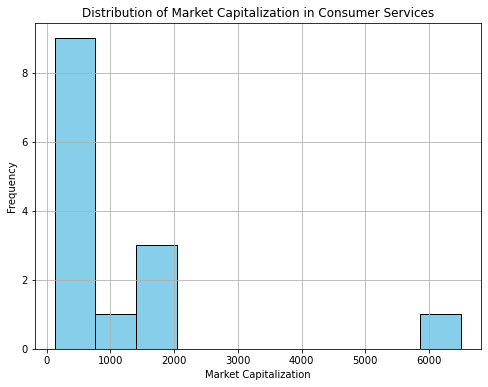

Sector Analysis: Packaging
        market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count    36.000000   36.000000  36.000000  36.000000   36.000000   36.000000   
mean   1325.772222   26.086667   2.402500   0.505278  201.940934   17.740278   
std    1746.843840   36.955466   1.509324   0.575954  267.711018   32.063087   
min     105.200000    0.000000   0.000000   0.000000  -94.478125  -58.050000   
25%     209.942500   13.732500   1.210000   0.000000   58.785722    3.040000   
50%     479.945000   18.630000   2.205000   0.420000   94.040763    8.995000   
75%    1913.765000   29.852500   3.127500   0.685000  205.935291   24.710000   
max    6125.610000  226.730000   5.630000   2.390000  999.101233  106.210000   

              roe  
count   36.000000  
mean    11.582900  
std     18.588318  
min    -19.276900  
25%      5.332050  
50%      9.774350  
75%     12.709600  
max    109.755100  



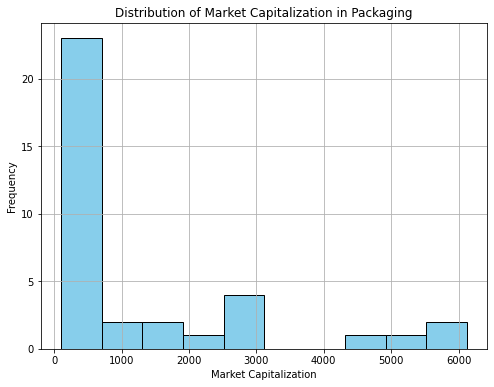

Sector Analysis: Water Utilities
       market_cap  pe_ratio  pb_ratio  div_yield  book_value   eps      roe
count        1.00      1.00       1.0        1.0    1.000000  1.00   1.0000
mean      4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
std           NaN       NaN       NaN        NaN         NaN   NaN      NaN
min       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
25%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
50%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
75%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
max       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491



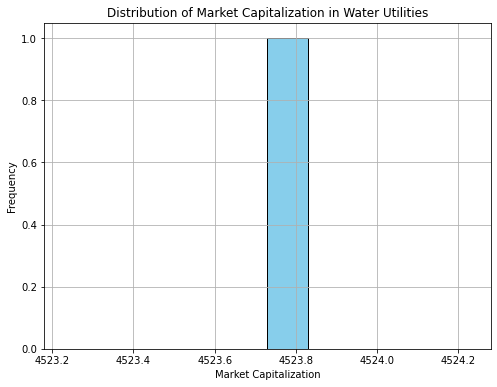

Sector Analysis: Distributors
        market_cap    pe_ratio   pb_ratio  div_yield   book_value        eps  \
count    13.000000   13.000000  13.000000  13.000000    13.000000  13.000000   
mean    595.726154   93.072308   5.567692   0.400000   174.418778  11.630769   
std     687.202806  192.716872   6.648079   0.735697   379.201959  17.805928   
min      44.520000    6.590000   0.720000   0.000000     0.999793   0.060000   
25%     140.750000   16.820000   1.300000   0.000000    10.558919   0.760000   
50%     274.890000   29.570000   1.890000   0.000000    40.441117   4.930000   
75%     749.410000   41.890000   7.100000   0.270000    92.588245  11.220000   
max    2027.100000  703.700000  19.390000   2.240000  1391.538462  63.720000   

             roe  
count  13.000000  
mean    7.394577  
std     8.120760  
min   -13.609100  
25%     4.437900  
50%     7.933400  
75%    12.396500  
max    16.950900  



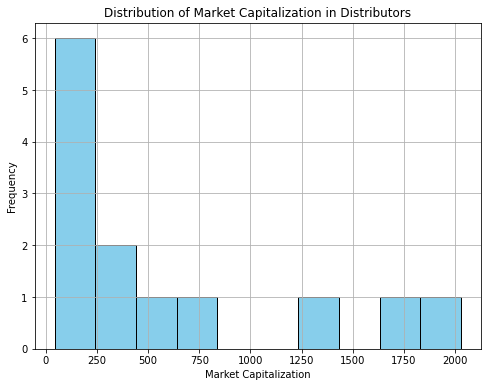

Sector Analysis: Leisure Products
       market_cap  pe_ratio  pb_ratio  div_yield  book_value   eps     roe
count        1.00      1.00      1.00        1.0    1.000000  1.00  1.0000
mean       120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
std           NaN       NaN       NaN        NaN         NaN   NaN     NaN
min        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
25%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
50%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
75%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
max        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463



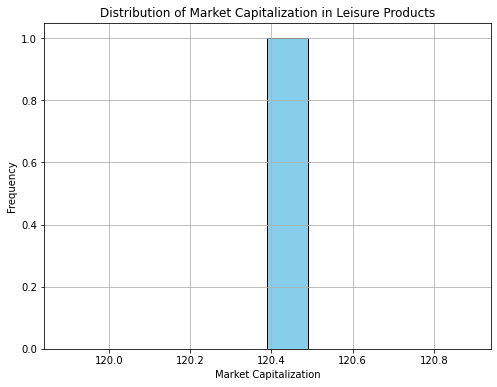

Top 5 Stocks:
                       stock_name          industry        cap  market_cap  \
7             State Bank of India             Banks  Large Cap   673585.09   
16  Oil & Natural Gas Corporation  Oil, Gas & Fuels  Large Cap   345328.66   
40         Indian Oil Corporation  Oil, Gas & Fuels  Large Cap   263784.73   
42                     Tata Steel   Metals & Mining  Large Cap   176283.76   
48           Punjab National Bank             Banks  Large Cap   143308.37   

    pe_ratio  pb_ratio  div_yield  book_value    eps        roe  
7      10.56      1.84       1.50  410.545024  71.48  18.845496  
16      8.23      1.12       4.10  246.121246  33.34  15.866100  
40      5.63      1.58       1.57  118.379248  33.19  23.147800  
42      0.00      1.99       2.50   71.464799  -2.70   0.784100  
48     18.78      1.47       0.50   88.801984   6.93   7.802557  


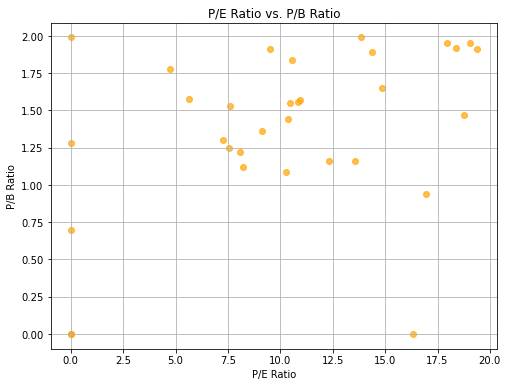

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Macro-economic analysis (example)
# You can add more indicators as needed
gdp_growth = 8.7  # Example GDP growth rate
inflation_rate = 4.55  # Example inflation rate

# Print macroeconomic indicators
print("Macro-economic Analysis:")
print(f"GDP Growth Rate: {gdp_growth}%")
print(f"Inflation Rate: {inflation_rate}%")
print()

# 2. Market analysis
# You can analyze market trends, volatility, etc.

# 3. Sector analysis
# Analyze different sectors
sectors = stock['industry'].unique()
for sector in sectors:
    sector_stocks = stock[stock['industry'] == sector]
    print(f"Sector Analysis: {sector}")
    print(sector_stocks.describe())  # Basic statistics for the sector
    print()
    
    # Plot histogram of market capitalization for each sector
    plt.figure(figsize=(8, 6))
    plt.hist(sector_stocks['market_cap'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Market Capitalization in {sector}')
    plt.xlabel('Market Capitalization')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# 4. Stock selection
# Filter stocks based on criteria (example: Large Cap with P/E < 20 and P/B < 2)
filtered_stocks = stock[(stock['cap'] == 'Large Cap') & (stock['pe_ratio'] < 20) & (stock['pb_ratio'] < 2)]

# Sort filtered stocks by market capitalization in descending order
sorted_stocks = filtered_stocks.sort_values(by='market_cap', ascending=False)

# Display top 5 stocks
print("Top 5 Stocks:")
print(sorted_stocks.head(5))

# Plot scatter plot of P/E ratio vs. P/B ratio for filtered stocks
plt.figure(figsize=(8, 6))
plt.scatter(filtered_stocks['pe_ratio'], filtered_stocks['pb_ratio'], color='orange', alpha=0.7)
plt.title('P/E Ratio vs. P/B Ratio')
plt.xlabel('P/E Ratio')
plt.ylabel('P/B Ratio')
plt.grid(True)
plt.show()


### Bottom up analysis

### Economic analysis

Economic Analysis:
Average GDP Growth Rate: 6.3%
Average Inflation Rate: 3.5%

Macro-economic Analysis:
GDP Growth Rate: 5.2%
Inflation Rate: 3.0%

Sector Analysis: Oil, Gas & Fuels
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count  2.000000e+01   20.000000  20.000000  20.000000    20.000000   
mean   1.656346e+05   17.537000   2.688000   1.448000   240.451715   
std    4.394321e+05   24.544121   2.526422   1.706889   292.914982   
min    9.288000e+01    0.000000   0.000000   0.000000  -130.210894   
25%    1.859610e+03    4.867500   1.572500   0.000000    78.838485   
50%    1.478104e+04    9.865000   2.030000   0.455000   150.689277   
75%    9.568006e+04   18.335000   2.857500   2.887500   320.057758   
max    1.976493e+06  104.960000  11.910000   5.050000  1110.341197   

              eps        roe  
count   20.000000  20.000000  
mean    51.095000  20.963605  
std     63.223488  14.409692  
min    -39.640000  -3.083300  
25%     14.880000  12.751125  
5

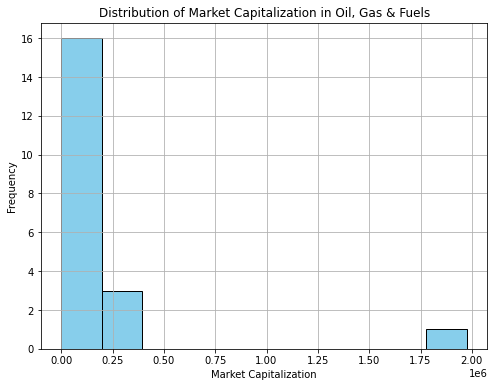

Sector Analysis: IT Services
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count  6.600000e+01   66.000000  66.000000  66.000000    66.000000   
mean   5.534022e+04   58.881515   8.495909   0.578939   139.484852   
std    2.121257e+05  130.980096   9.891709   0.852261   243.824142   
min    7.926000e+01    0.000000   0.000000   0.000000  -391.681392   
25%    3.457275e+02   17.075000   2.810000   0.000000    20.303469   
50%    9.757450e+02   32.255000   5.585000   0.180000    66.733602   
75%    6.826530e+03   55.150000  10.065000   0.910000   162.608683   
max    1.510895e+06  987.080000  49.710000   3.830000  1575.598771   

              eps         roe  
count   66.000000   66.000000  
mean    21.499697   15.329929  
std     47.728416   37.568922  
min   -207.030000 -152.812900  
25%      0.885000    4.509400  
50%      8.190000   14.625950  
75%     28.535000   24.547400  
max    155.180000  174.374900  



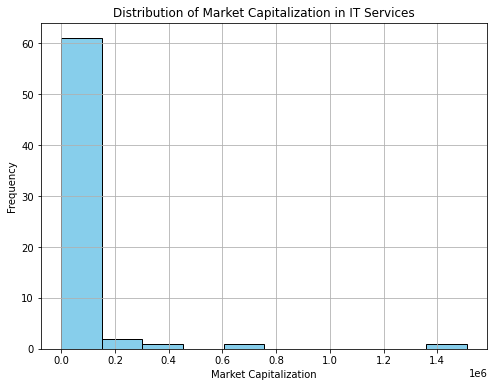

Sector Analysis: Banks
         market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count  3.900000e+01  39.000000  39.000000  39.000000   39.000000   39.000000   
mean   1.211339e+05  17.640769   1.990000   0.735641  185.212755   26.486154   
std    2.252775e+05  14.972624   0.962185   0.716441  192.602005   28.880709   
min    1.208890e+03   6.330000   0.950000   0.000000   12.703489    0.360000   
25%    9.561985e+03   9.290000   1.305000   0.000000   36.823659    5.265000   
50%    4.398949e+04  11.950000   1.840000   0.710000  114.030677   15.870000   
75%    1.068300e+05  19.075000   2.395000   1.080000  236.405246   38.240000   
max    1.078493e+06  78.940000   5.370000   2.230000  745.650979  111.440000   

             roe  
count  39.000000  
mean   13.908897  
std     4.531452  
min     2.514391  
25%    11.109565  
50%    14.328715  
75%    16.406021  
max    27.927591  



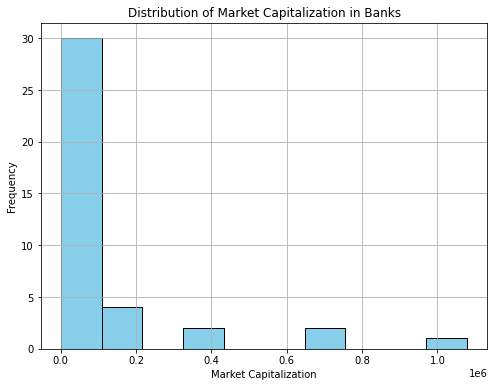

Sector Analysis: Insurance
          market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count      12.000000  12.000000  12.000000  12.000000   12.000000   12.000000   
mean   110715.914167  40.660833   5.974167   0.322500   85.016283   21.665833   
std    177857.992596  34.197684   3.606936   0.491641  181.803224   39.060989   
min       297.690000   0.000000   0.000000   0.000000 -454.748171  -52.700000   
25%     33182.370000   8.750000   3.097500   0.000000   74.178288    6.160000   
50%     60515.500000  42.115000   6.800000   0.145000  111.719265   13.105000   
75%     92598.717500  78.630000   8.937500   0.392500  149.301055   37.715000   
max    657420.260000  83.540000  10.590000   1.690000  272.309108  108.870000   

             roe  
count  12.000000  
mean    6.655025  
std     6.587927  
min    -2.265500  
25%     0.000000  
50%     8.677050  
75%    12.176175  
max    15.696300  



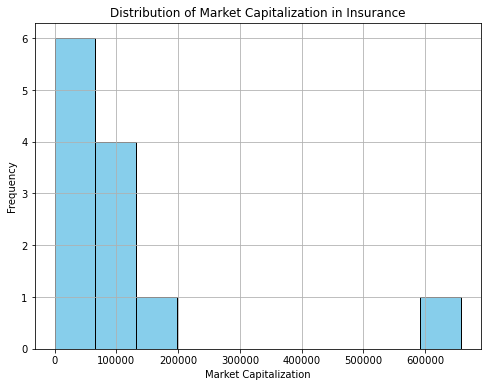

Sector Analysis: Telecom Services
          market_cap   pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      11.000000  11.000000  11.000000  11.000000   11.000000  11.000000   
mean    81572.868182  22.235455   5.200000   0.214545  -39.927364  -1.183636   
std    193064.579454  29.571600  10.497247   0.379457  152.028590  22.800294   
min       150.620000   0.000000   0.000000   0.000000 -353.148730 -51.310000   
25%      2780.720000   0.000000   0.000000   0.000000  -68.884362  -6.140000   
50%     14352.020000   0.000000   0.000000   0.000000   -3.652215  -0.950000   
75%     55571.620000  51.135000   5.540000   0.265000   52.334617  10.810000   
max    658060.620000  74.960000  35.520000   1.160000  138.362336  34.150000   

             roe  
count  11.000000  
mean   19.858627  
std    25.249359  
min    -0.242500  
25%     7.342000  
50%    14.242800  
75%    17.275250  
max    90.988900  



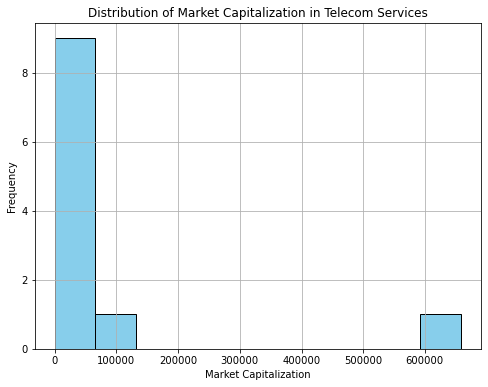

Sector Analysis: Personal Products
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      15.000000   15.000000  15.000000  15.000000    15.000000   
mean    64562.988667   44.298000  13.985333   0.769333   192.367440   
std    142208.471611   36.575776  13.912571   0.804785   361.060682   
min       113.130000    0.000000   1.080000   0.000000     1.088212   
25%       528.845000   14.795000   6.090000   0.000000    30.880267   
50%     14332.210000   53.790000  10.170000   0.680000    56.175957   
75%     61700.880000   63.165000  14.305000   1.390000   178.062027   
max    558039.670000  113.050000  50.660000   2.370000  1441.160584   

              eps        roe  
count   15.000000  15.000000  
mean    39.765333  24.295907  
std     63.343426  22.306375  
min     -2.450000   0.189100  
25%      3.390000   9.676800  
50%     16.330000  18.505500  
75%     45.125000  33.475650  
max    232.850000  71.814700  



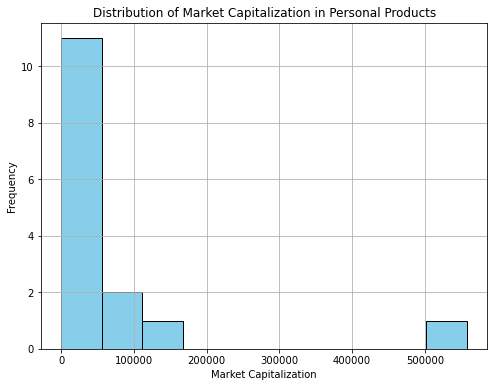

Sector Analysis: Tobacco
          market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count       4.000000   4.000000  4.000000   4.000000    4.000000    4.00000   
mean   131041.980000  20.822500  4.357500   2.405000  396.034533   90.38500   
std    249424.691852   3.564944  2.463011   1.916533  378.472025   92.42691   
min       145.780000  16.240000  1.500000   0.000000   55.372566    5.47000   
25%      4292.612500  19.150000  3.000000   1.297500   74.944908   13.69750   
50%      9464.980000  21.215000  4.310000   2.770000  399.827775   86.69000   
75%    136214.347500  22.887500  5.667500   3.877500  720.917400  163.37750   
max    505092.180000  24.620000  7.310000   4.080000  729.110016  182.69000   

             roe  
count   4.000000  
mean   21.194875  
std    10.290201  
min     6.673300  
25%    17.552575  
50%    24.447200  
75%    28.089500  
max    29.211800  



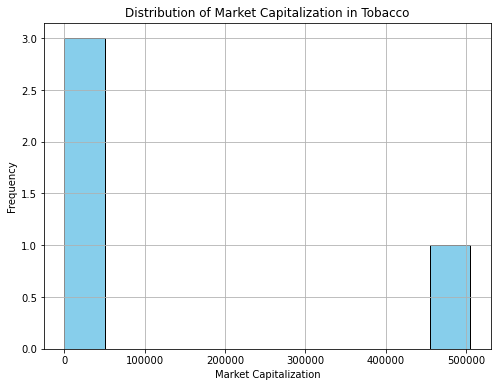

Sector Analysis: Construction
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      80.000000   80.000000  80.000000  80.000000    80.000000   
mean    11205.809375   37.913750   4.794250   0.266000   103.677333   
std     52270.385265   71.987448   8.028964   0.463904   172.377364   
min        64.040000    0.000000   0.000000   0.000000   -84.167523   
25%       353.292500   10.522500   1.667500   0.000000    18.095606   
50%      2156.870000   21.730000   2.755000   0.000000    46.033786   
75%      6587.120000   35.840000   5.042500   0.402500   140.750323   
max    465861.990000  584.290000  56.340000   2.650000  1086.840290   

              eps          roe  
count   80.000000    80.000000  
mean    13.618500    -4.875799  
std     38.572689   202.959867  
min    -77.740000 -1389.606900  
25%      0.320000     6.106350  
50%      5.745000    11.518450  
75%     13.492500    18.368425  
max    191.840000   720.043000  



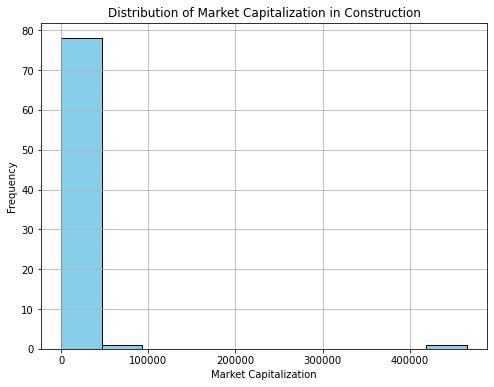

Sector Analysis: Consumer Finance
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      49.000000   49.000000  49.000000  49.000000    49.000000   
mean    20787.792449   27.594286   2.969184   0.305510   274.209113   
std     61018.434295   28.834019   1.706869   0.543645   399.598557   
min        23.920000    0.000000   0.650000   0.000000     1.055492   
25%       325.630000   11.470000   1.780000   0.000000    29.968373   
50%      2431.060000   18.450000   2.480000   0.000000   116.349712   
75%     15790.240000   33.960000   4.180000   0.430000   300.878261   
max    409208.530000  143.960000   8.100000   2.070000  1746.944553   

              eps        roe  
count   49.000000  49.000000  
mean    39.607755   9.338592  
std     61.915679  13.519101  
min    -61.230000 -64.321900  
25%      1.440000   6.275900  
50%     14.730000  11.167700  
75%     61.790000  17.315400  
max    223.040000  29.580300  



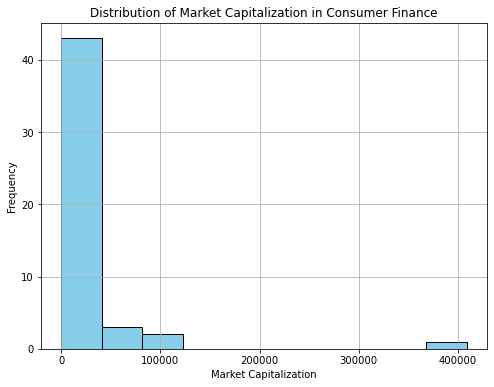

Sector Analysis: Pharmaceuticals
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     123.000000  123.000000  123.000000  123.000000   123.000000   
mean    13721.687805   41.608699   10.042683    0.450244   185.057102   
std     38862.212893   62.943940   40.830056    0.879987   245.143005   
min        40.630000    0.000000    0.000000    0.000000  -131.643393   
25%       334.305000   14.565000    2.430000    0.000000    43.191331   
50%      1305.300000   31.000000    3.870000    0.180000    95.835417   
75%     10303.795000   46.615000    6.350000    0.655000   245.850416   
max    362407.550000  558.750000  441.880000    6.430000  1528.499312   

             eps          roe  
count  123.00000   123.000000  
mean    27.23374    -0.255031  
std     67.83090   431.235999  
min    -84.46000 -3831.475200  
25%      1.86500     5.292650  
50%      9.18000    11.900100  
75%     29.70500    17.183750  
max    539.10000  2815.413700  



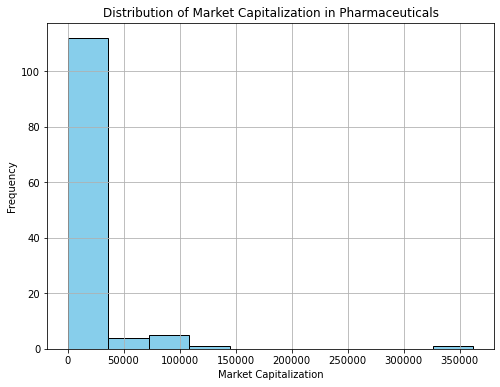

Sector Analysis: Auto Manufacturers
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      11.000000   11.000000  11.000000  11.000000    11.000000   
mean   134314.281818  127.687273   8.656364   0.623636   539.686333   
std    136547.968246  218.248742   7.019046   0.707846   744.742123   
min       426.290000   16.080000   0.000000   0.000000    -0.867776   
25%      1753.050000   27.560000   4.195000   0.070000    68.795694   
50%    101581.130000   31.850000   5.830000   0.230000   161.111274   
75%    232012.865000  122.975000  12.055000   0.895000   732.971314   
max    357401.840000  754.420000  20.960000   2.040000  2501.068806   

              eps        roe  
count   11.000000  11.000000  
mean   105.103636  17.567364  
std    127.305292   8.703852  
min      0.120000   1.552900  
25%      1.580000  13.248500  
50%     58.380000  18.466100  
75%    160.470000  23.193850  
max    387.680000  28.582200  



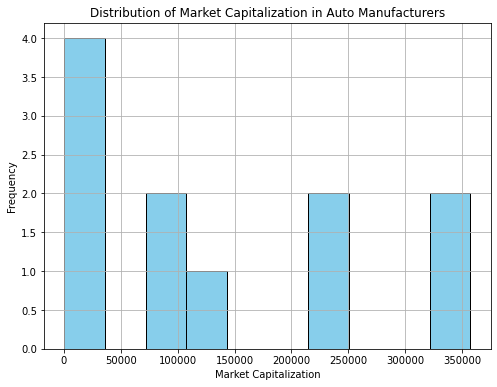

Sector Analysis: Trading Companies
          market_cap    pe_ratio   pb_ratio  div_yield    book_value  \
count      43.000000   43.000000  43.000000  43.000000     43.000000   
mean    10114.272326   45.281860   4.060930   0.577907    998.665520   
std     55879.828296   56.607371   3.437993   1.305641   5520.897942   
min        55.450000    0.000000   0.000000   0.000000   -924.993183   
25%       213.570000   12.460000   0.600000   0.000000     10.993835   
50%       476.230000   29.040000   3.610000   0.040000     55.812342   
75%      1074.455000   50.965000   7.260000   0.470000    230.575079   
max    367422.360000  290.360000  10.990000   6.870000  36269.908740   

               eps        roe  
count    43.000000  43.000000  
mean    102.284419   8.171528  
std     581.894876  10.386912  
min     -60.300000 -27.157400  
25%       0.875000   2.379450  
50%       3.400000   6.749900  
75%      16.245000  12.151200  
max    3822.920000  33.910200  



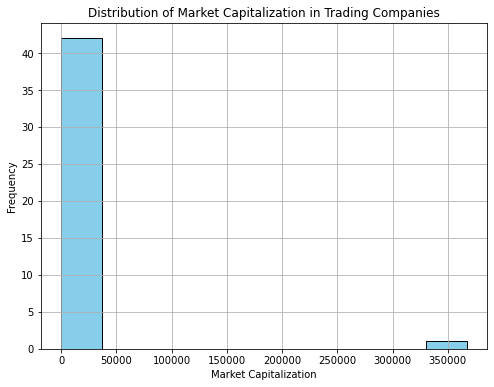

Sector Analysis: Apparel & Luxury
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      65.000000   65.000000  65.000000  65.000000    65.000000   
mean     9149.544615   44.793385   5.762769   0.297692   125.791871   
std     40629.483806   45.723165   6.439764   0.488751   219.170418   
min        63.350000    0.000000   0.000000   0.000000    -5.944732   
25%       154.610000   17.740000   1.580000   0.000000    17.120587   
50%       720.000000   34.540000   3.110000   0.080000    55.322699   
75%      3220.910000   58.850000   6.680000   0.500000   121.793716   
max    324627.890000  296.830000  26.470000   3.030000  1372.143946   

              eps         roe  
count   65.000000   65.000000  
mean    17.009385   18.934543  
std     61.844782   69.635770  
min    -63.250000  -44.159200  
25%      0.620000    2.973400  
50%      4.870000    9.923100  
75%     20.580000   18.584700  
max    483.710000  562.554700  



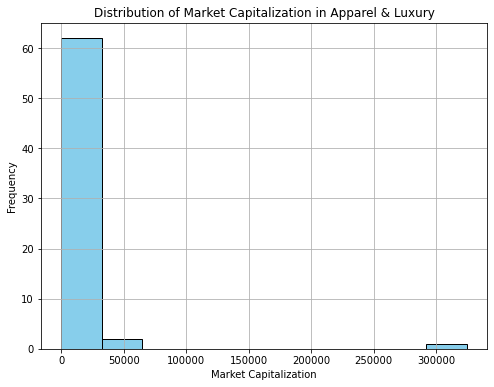

Sector Analysis: Chemicals
          market_cap     pe_ratio    pb_ratio   div_yield   book_value  \
count     231.000000   231.000000  231.000000  231.000000   231.000000   
mean     7442.354156    93.465584    4.262900    0.863853   276.936209   
std     23443.914422   593.731981    4.562937    1.998357   708.420882   
min        66.160000     0.000000    0.000000    0.000000  -155.951675   
25%       438.000000    12.840000    1.595000    0.110000    54.534577   
50%      1419.280000    25.160000    2.800000    0.360000   146.203579   
75%      4801.655000    49.340000    5.285000    0.970000   295.574874   
max    288497.920000  7282.000000   35.850000   24.050000  9972.408333   

              eps          roe  
count  231.000000   231.000000  
mean    26.259004    -2.900794  
std     54.157845   228.680718  
min   -171.530000 -3451.865100  
25%      2.630000     4.515450  
50%     11.920000    10.483800  
75%     32.355000    17.502300  
max    528.750000   216.886300  



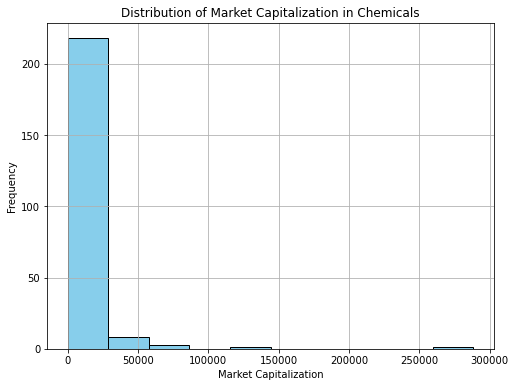

Sector Analysis: Energy
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      35.00000   35.000000  35.000000  35.000000    35.000000   
mean    32451.02600   41.436286   6.316286   0.472000    24.673493   
std     81448.36634   60.465164  14.270119   0.917887   752.032474   
min        75.70000    0.000000   0.000000   0.000000 -3952.433011   
25%       255.14500    4.785000   1.120000   0.000000    12.945042   
50%      2059.61000   23.130000   2.130000   0.000000    50.081249   
75%      8851.26000   51.175000   3.970000   0.490000   124.615609   
max    327407.93000  230.090000  77.890000   3.990000  1696.055227   

              eps         roe  
count   35.000000   35.000000  
mean     9.848857    2.916243  
std     56.897787   51.144614  
min   -232.730000 -269.532800  
25%      0.195000    0.727400  
50%      4.490000    6.514200  
75%     19.320000   15.422200  
max    214.520000   59.219100  



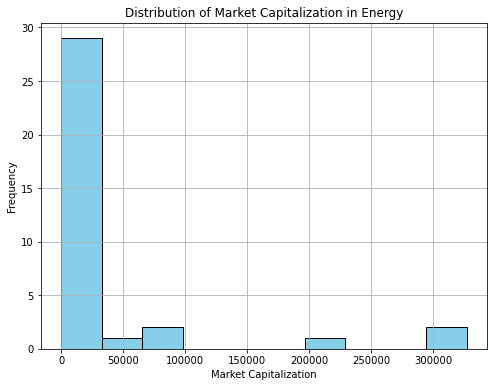

Sector Analysis: Building Materials
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      51.000000   51.000000  51.000000  51.000000    51.000000   
mean    17787.422941   34.966471   2.956275   0.496471   378.512441   
std     47882.817691   56.919548   3.145697   0.792810   826.535762   
min        82.640000    0.000000   0.000000   0.000000  -172.789640   
25%       460.410000    0.510000   1.310000   0.000000    51.810922   
50%      2020.090000   22.580000   2.180000   0.210000   119.985032   
75%      8654.070000   40.405000   3.415000   0.515000   309.882473   
max    286241.050000  310.530000  18.380000   3.550000  5403.258477   

              eps        roe  
count   51.000000  51.000000  
mean    28.807843   2.999627  
std     95.499794  20.544856  
min    -89.600000 -61.324400  
25%     -0.125000   1.456900  
50%      6.820000   5.828500  
75%     25.550000   9.236050  
max    622.660000  78.067500  



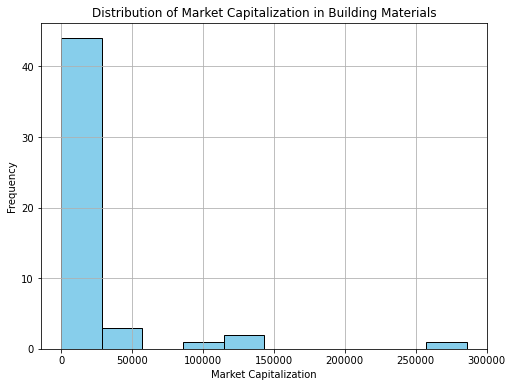

Sector Analysis: Transport Infra
          market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count      16.000000  16.000000  16.000000  16.000000   16.000000   16.000000   
mean    25326.335625  15.704375   6.368125   0.245625   46.570907   -4.640625   
std     70529.522709  18.203162  13.226419   0.767437  170.322740   33.197970   
min        82.350000   0.000000   0.000000   0.000000 -350.868532 -120.600000   
25%       314.127500   0.000000   0.675000   0.000000    3.193000   -3.925000   
50%      1625.620000   6.265000   2.120000   0.000000   31.371736    0.800000   
75%      4380.165000  32.752500   5.932500   0.000000   45.610636    7.857500   
max    282319.360000  48.310000  54.050000   3.070000  518.435929   33.470000   

              roe  
count   16.000000  
mean     0.216369  
std     46.070334  
min   -111.318900  
25%     -2.697025  
50%     10.378000  
75%     17.970400  
max     63.257200  



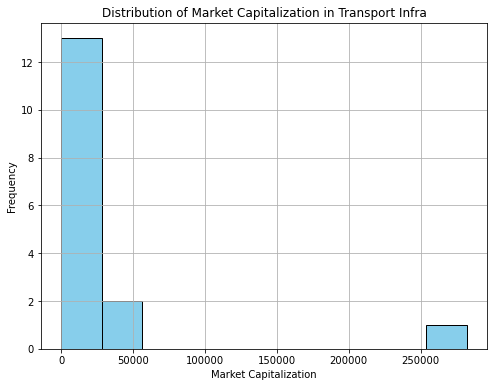

Sector Analysis: Electric Utilities
          market_cap    pe_ratio   pb_ratio  div_yield  book_value  \
count      10.000000   10.000000  10.000000  10.000000   10.000000   
mean    62925.116000   39.429000   3.545000   1.187000   98.761761   
std     81643.610487   48.754128   2.643034   1.534109   83.557912   
min       116.520000    0.000000   0.930000   0.000000   10.361358   
25%      4204.632500    3.107500   1.702500   0.000000   39.495909   
50%     32445.545000   23.350000   3.125000   0.370000   90.085409   
75%    102751.277500   49.307500   4.522500   2.032500  103.571279   
max    255627.100000  145.630000   9.940000   4.020000  246.599311   

              eps        roe  
count   10.000000  10.000000  
mean    -1.425000   6.178880  
std     37.684686  10.073978  
min   -103.330000 -12.446700  
25%     -0.185000  -1.553175  
50%      6.330000   9.072800  
75%     11.057500  12.399125  
max     38.540000  18.366800  



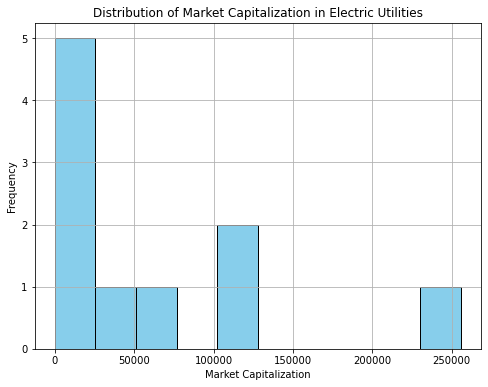

Sector Analysis: Food Products
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     138.000000  138.000000  138.000000  138.000000   138.000000   
mean     6490.564130   39.373696    4.869130    0.393986   185.739915   
std     25591.137933   68.865639    8.538153    0.602976   426.616353   
min        36.810000    0.000000    0.000000    0.000000  -192.054589   
25%       187.345000    0.267500    1.155000    0.000000    20.012533   
50%       473.100000   14.970000    2.275000    0.065000    63.689706   
75%      2540.415000   42.330000    5.377500    0.540000   174.926474   
max    239843.740000  533.380000   77.550000    2.950000  4265.833020   

              eps         roe  
count  138.000000  138.000000  
mean    16.202174    7.675980  
std     61.700278   22.034506  
min   -172.080000 -140.686600  
25%     -0.005000    0.666825  
50%      5.740000    9.300300  
75%     16.572500   15.335875  
max    540.230000   96.958000  



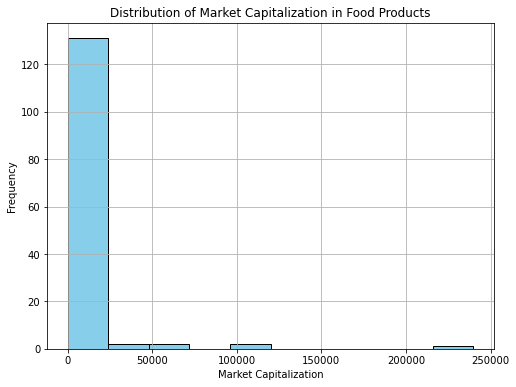

Sector Analysis: Financial Services
          market_cap     pe_ratio   pb_ratio  div_yield    book_value  \
count      44.000000    44.000000  44.000000  44.000000     44.000000   
mean    27997.726364   182.739773   3.405682   1.406591    466.617714   
std     59897.684158   838.387075   4.424549   5.706968   1630.975327   
min        70.860000     0.000000   0.000000   0.000000   -339.749945   
25%       162.522500     8.982500   1.347500   0.000000     19.670809   
50%       677.790000    18.400000   1.885000   0.060000     79.121998   
75%     15211.722500    32.580000   3.490000   0.995000    198.719966   
max    251377.240000  5439.000000  22.730000  37.980000  10064.545454   

              eps        roe  
count   44.000000  44.000000  
mean    34.134545   9.328068  
std    123.198130   8.606399  
min    -89.760000 -16.246500  
25%      0.517500   5.532450  
50%      6.090000   8.503850  
75%     22.705000  13.634700  
max    627.370000  31.525600  



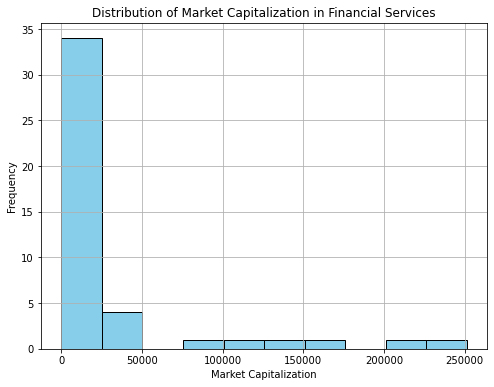

Sector Analysis: Consumer Retail
          market_cap    pe_ratio   pb_ratio  div_yield  book_value      eps  \
count      10.000000   10.000000  10.000000  10.000000   10.000000  10.0000   
mean    25157.371000   40.884000   4.682000   0.021000   85.990328  10.9340   
std     75505.645309   45.300682   4.983791   0.053841  112.255137  48.1702   
min        80.770000    0.000000   0.000000   0.000000  -31.702089 -81.9800   
25%       189.450000    7.317500   1.530000   0.000000   15.250879   1.0825   
50%       503.630000   27.895000   3.120000   0.000000   49.515035   3.9550   
75%      1003.967500   48.465000   5.490000   0.000000  119.650901  30.8975   
max    239938.300000  138.430000  13.770000   0.170000  288.372093  91.9500   

              roe  
count   10.000000  
mean    58.067280  
std    114.674419  
min      3.831300  
25%      8.041475  
50%     17.841850  
75%     27.706950  
max    376.449800  



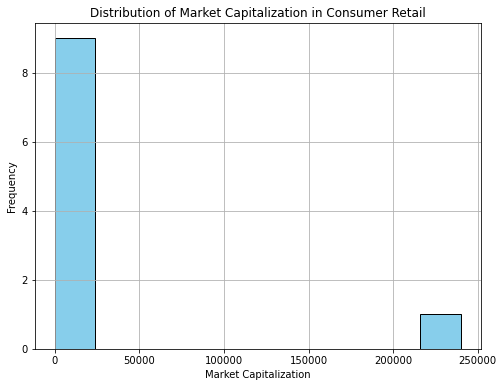

Sector Analysis: Aerospace & Defense
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      13.000000   13.000000  13.000000  13.000000   13.000000  13.000000   
mean    34798.269231   61.633846   7.445385   0.450769  147.392822  26.477692   
std     63608.965471   35.101715   2.068206   0.378494  104.320815  28.679155   
min       536.800000   26.320000   3.310000   0.000000   16.548074   0.900000   
25%      2840.370000   33.510000   6.700000   0.020000   89.377173   6.790000   
50%      3610.030000   42.980000   7.350000   0.550000  136.487298  21.670000   
75%     31333.760000   86.500000   9.280000   0.780000  214.641230  29.640000   
max    205865.660000  133.390000  10.900000   0.960000  376.136182  91.860000   

             roe  
count  13.000000  
mean   15.179515  
std     8.123844  
min     1.034300  
25%    10.923900  
50%    13.682400  
75%    22.427200  
max    29.201000  



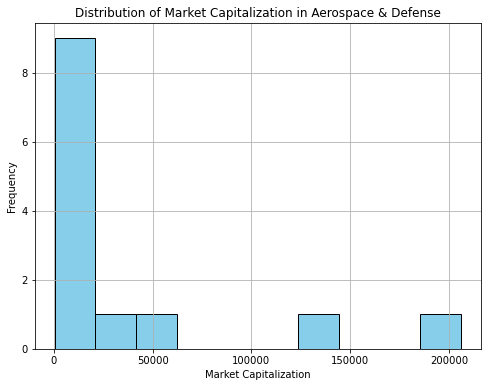

Sector Analysis: Metals & Mining
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     138.000000  138.000000  138.000000  138.000000   138.000000   
mean    10781.884493   30.616232    4.114493    0.816594   142.042061   
std     29723.993354   67.110111    5.133991    3.831395   386.114195   
min        92.440000    0.000000    0.000000    0.000000  -777.353563   
25%       249.525000   10.897500    1.770000    0.000000    22.461591   
50%      1281.455000   20.370000    2.780000    0.080000    69.534288   
75%      5136.472500   29.692500    4.620000    0.517500   161.536711   
max    200649.500000  711.450000   43.660000   38.060000  4100.850228   

              eps         roe  
count  138.000000  138.000000  
mean    20.504565   10.819543  
std     36.690624   21.014552  
min   -131.550000  -83.175800  
25%      1.622500    5.520100  
50%     11.035000   11.290900  
75%     28.302500   18.353500  
max    200.010000   84.370000  



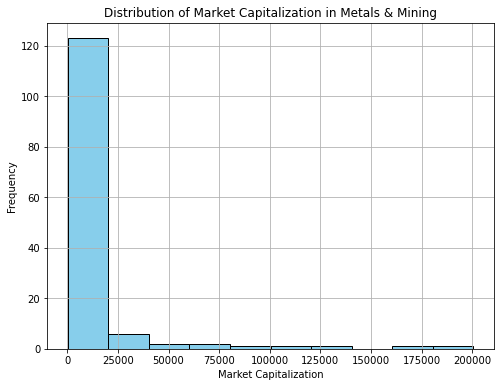

Sector Analysis: Beverages
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      18.000000   18.000000  18.000000  18.000000   18.000000  18.000000   
mean    19696.082778   43.354444   7.360556   0.237222  103.168277  10.611111   
std     46356.687597   40.082958   7.241218   0.386185  190.119682  21.965248   
min       140.870000    0.000000   0.000000   0.000000 -292.486931 -53.320000   
25%       384.400000   13.207500   1.777500   0.000000    4.488065   2.592500   
50%      1074.335000   25.940000   5.920000   0.080000   57.837118  10.885000   
75%      5030.527500   76.860000  11.330000   0.202500  167.289472  17.042500   
max    184715.590000  135.310000  26.630000   1.350000  587.630736  54.700000   

              roe  
count   18.000000  
mean    -0.590128  
std     37.610898  
min   -125.312300  
25%      4.034875  
50%     12.194400  
75%     17.966725  
max     29.639200  



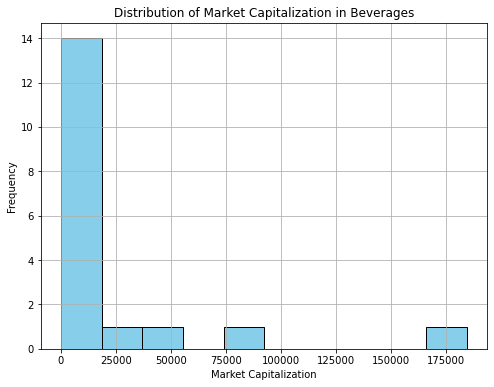

Sector Analysis: Industrial Conglomerates
          market_cap   pe_ratio   pb_ratio  div_yield   book_value  \
count      11.000000  11.000000  11.000000  11.000000    11.000000   
mean    23938.020000  22.567273   5.405455   1.150909   392.031420   
std     45703.425782  27.551131   6.147893   1.671529   490.978146   
min       156.180000   0.000000   0.000000   0.000000    -6.836282   
25%       877.845000   0.000000   1.100000   0.000000    55.203199   
50%      6077.580000   9.960000   2.610000   0.230000   244.263001   
75%     25923.350000  35.055000   9.155000   1.955000   483.031014   
max    156578.950000  78.150000  18.920000   4.940000  1632.969122   

              eps        roe  
count   11.000000  11.000000  
mean    81.116364  10.404227  
std    147.843146  19.282485  
min    -16.300000 -35.504700  
25%     -1.435000   4.954350  
50%     19.950000  12.167600  
75%     67.440000  22.050200  
max    484.720000  31.824400  



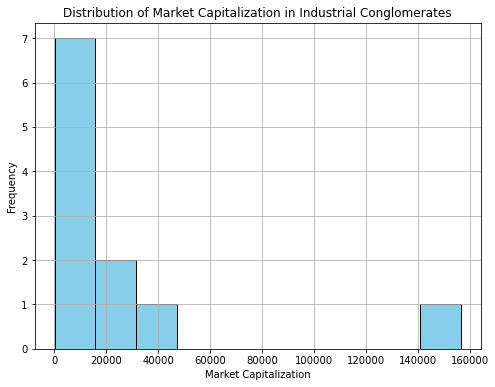

Sector Analysis: Specialty Retail
          market_cap     pe_ratio   pb_ratio  div_yield   book_value  \
count      33.000000    33.000000  33.000000  33.000000    33.000000   
mean     9515.013030   110.142424   9.250303   0.219091   176.731419   
std     25681.645394   267.011399  11.000944   0.435448   434.733885   
min        53.670000     0.000000   0.000000   0.000000  -100.426529   
25%       773.070000    20.900000   2.720000   0.000000    33.324156   
50%      1864.570000    44.090000   5.800000   0.000000    69.796663   
75%      6087.200000    78.720000   8.390000   0.220000   127.303577   
max    142969.950000  1511.000000  49.070000   1.940000  2498.877778   

              eps         roe  
count   33.000000   33.000000  
mean     9.100606   -4.857006  
std     26.319942  105.894047  
min   -105.810000 -587.551900  
25%      2.250000    2.680200  
50%      6.020000   10.581000  
75%     16.900000   21.210300  
max     63.180000   74.055400  



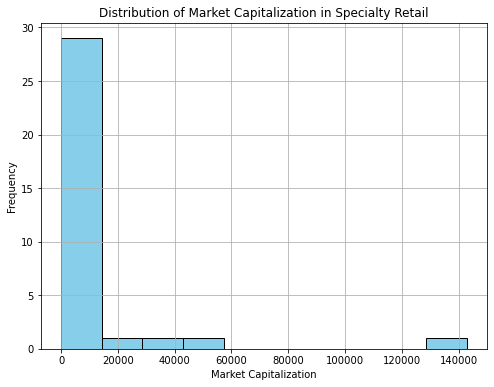

Sector Analysis: Restaurants
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      13.000000   13.000000  13.000000  13.000000   13.000000  13.000000   
mean    17234.050769   65.172308   9.732308   0.177692   88.078055   7.280769   
std     37596.461735   60.056364   7.285308   0.310461  135.694101  14.369082   
min        91.180000    0.000000   0.470000   0.000000    2.300484  -6.180000   
25%       638.970000   14.570000   4.900000   0.000000   14.125083   0.530000   
50%      2459.700000   46.900000   6.650000   0.000000   31.632905   1.750000   
75%     12876.430000  106.590000  15.670000   0.240000   97.939800   5.680000   
max    138206.010000  165.360000  22.860000   0.990000  491.138671  43.790000   

             roe  
count  13.000000  
mean    7.810815  
std    16.237680  
min   -29.987800  
25%    -2.520500  
50%    11.259900  
75%    19.114400  
max    29.341200  



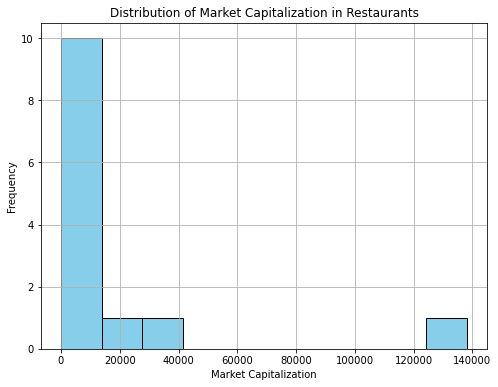

Sector Analysis: Gas Utilities
          market_cap    pe_ratio   pb_ratio  div_yield  book_value  \
count       7.000000    7.000000   7.000000   7.000000    7.000000   
mean    48229.115714   43.427143   7.484286   1.340000  178.697098   
std     47266.165017   63.155257  11.843891   1.157483  144.166054   
min      2314.530000   11.600000   1.650000   0.020000   29.420816   
25%     18152.435000   14.275000   2.300000   0.560000  106.867519   
50%     30775.540000   15.790000   3.210000   1.220000  128.658712   
75%     74123.090000   31.340000   4.360000   2.030000  202.668163   
max    119962.690000  185.370000  34.210000   2.960000  473.728795   

              eps        roe  
count    7.000000   7.000000  
mean    34.248571  17.422171  
std     43.364204   5.319797  
min      5.430000   7.252200  
25%     14.150000  16.466500  
50%     19.670000  17.702600  
75%     27.725000  19.769500  
max    130.890000  24.528400  



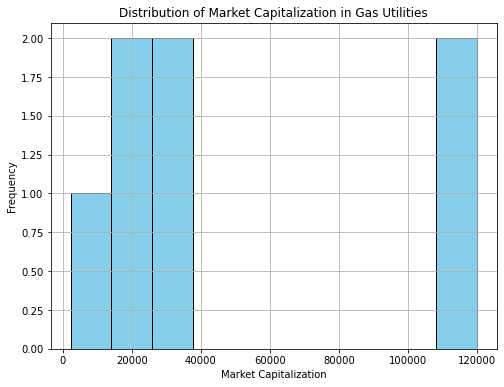

Sector Analysis: Airlines
          market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count       2.000000   2.000000       2.0        2.0    2.000000    2.00000   
mean    61202.330000   8.165000       0.0        0.0  -79.328675   92.15500   
std     79700.169054  11.547054       0.0        0.0    4.903509  133.36741   
min      4845.800000   0.000000       0.0        0.0  -82.795980   -2.15000   
25%     33024.065000   4.082500       0.0        0.0  -81.062328   45.00250   
50%     61202.330000   8.165000       0.0        0.0  -79.328675   92.15500   
75%     89380.595000  12.247500       0.0        0.0  -77.595023  139.30750   
max    117558.860000  16.330000       0.0        0.0  -75.861370  186.46000   

              roe  
count    2.000000  
mean   -94.686650  
std    137.577594  
min   -191.968700  
25%   -143.327675  
50%    -94.686650  
75%    -46.045625  
max      2.595400  



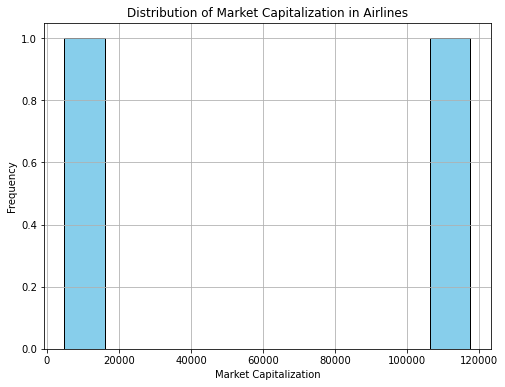

Sector Analysis: Life Sciences
         market_cap   pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     11.000000  11.000000  11.000000  11.000000   11.000000  11.000000   
mean   13054.280000  24.470909   4.160909   0.197273  148.595512  11.046364   
std    29830.238261  26.411933   2.500730   0.322183  148.598865  17.576516   
min       88.040000   0.000000   0.560000   0.000000   15.518966  -9.840000   
25%      707.260000   0.000000   2.170000   0.000000   36.053695  -3.360000   
50%     2332.300000  20.080000   4.100000   0.000000  111.109487  10.390000   
75%     3125.240000  41.900000   5.705000   0.290000  166.984235  16.565000   
max    98972.000000  71.560000   7.890000   0.800000  477.536502  52.100000   

             roe  
count  11.000000  
mean    0.744964  
std    16.764841  
min   -34.137500  
25%    -8.497150  
50%    10.375700  
75%    12.017650  
max    19.903400  



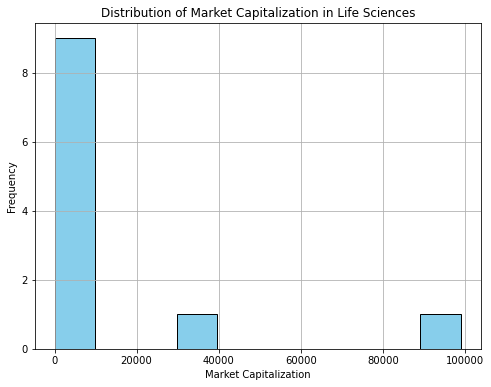

Sector Analysis: Electrical Equip.
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count     77.000000   77.000000  77.000000  77.000000    77.000000   
mean   10001.297922   50.819870   7.771558   0.268442   268.388638   
std    20886.445270   59.420743   8.729680   0.491486   584.921702   
min       89.090000    0.000000   0.000000   0.000000   -29.060431   
25%      266.280000   18.900000   2.320000   0.000000    25.806399   
50%     1191.390000   30.870000   5.290000   0.000000    68.684639   
75%    11251.680000   60.380000   9.740000   0.360000   253.340703   
max    95819.670000  351.320000  60.510000   2.500000  3374.412698   

              eps         roe  
count   77.000000   77.000000  
mean    22.455714   15.897931  
std     86.633285   52.373889  
min   -159.070000  -70.771300  
25%      1.720000    4.828400  
50%      6.880000   11.230700  
75%     24.500000   17.634300  
max    605.080000  444.459100  



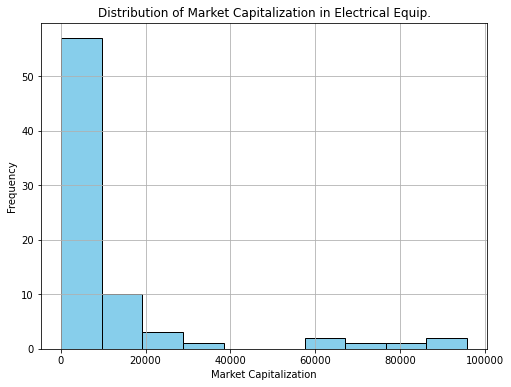

Sector Analysis: Health Care
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     33.000000   33.000000  33.000000  33.000000   33.000000   33.000000   
mean   13028.555152   59.014242   6.998788   0.282121  139.424421   18.570909   
std    22266.234115   74.368832   4.121858   0.572198  140.864061   31.454201   
min       53.510000    0.000000   0.000000   0.000000   -4.075641  -13.120000   
25%     1219.280000   29.720000   4.110000   0.000000   58.351339    1.870000   
50%     3397.860000   48.180000   6.250000   0.160000   99.426886   10.880000   
75%    15157.770000   60.950000  10.920000   0.250000  197.035727   22.430000   
max    94914.410000  424.570000  14.600000   3.010000  713.983912  144.530000   

             roe  
count  33.000000  
mean   10.110145  
std    12.819741  
min   -21.679100  
25%     7.067400  
50%    12.028800  
75%    18.620700  
max    31.294300  



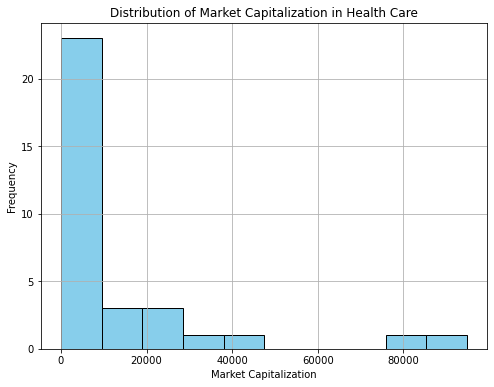

Sector Analysis: Auto Components
         market_cap     pe_ratio    pb_ratio   div_yield   book_value  \
count    107.000000   107.000000  107.000000  107.000000   107.000000   
mean    7742.014206    56.158879    5.151121    0.560280   258.449585   
std    15798.606031   126.944307    6.874551    0.663131   460.575417   
min       77.430000     0.000000    0.000000    0.000000   -88.248070   
25%      367.245000    18.575000    2.415000    0.000000    50.843751   
50%     1341.760000    30.190000    3.690000    0.390000   139.764473   
75%     5009.940000    49.400000    5.490000    0.770000   243.230969   
max    83541.470000  1141.810000   63.070000    3.200000  3927.319124   

              eps         roe  
count  107.000000  107.000000  
mean    36.423925   10.780658  
std     90.605512   13.780271  
min    -53.300000  -67.497500  
25%      3.660000    6.786650  
50%     12.780000   11.550100  
75%     31.970000   16.011350  
max    788.440000   57.501100  



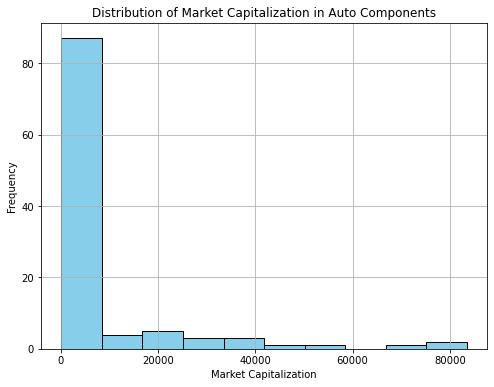

Sector Analysis: Capital Markets
         market_cap      pe_ratio    pb_ratio   div_yield    book_value  \
count    117.000000    117.000000  117.000000  117.000000    117.000000   
mean    5070.888803    258.681111    5.751197    0.674530   1584.700825   
std    10757.114010   2366.324753   13.000719    1.576678   4621.178002   
min       41.020000      0.000000    0.100000    0.000000      0.017515   
25%      230.920000      9.640000    0.840000    0.000000     39.035966   
50%      703.580000     19.010000    1.830000    0.000000    107.482130   
75%     3288.240000     39.780000    5.050000    0.570000    417.452403   
max    82731.450000  25610.360000  122.750000   10.140000  26735.620000   

               eps         roe  
count   117.000000  117.000000  
mean     99.454615   11.259948  
std     428.501478   14.809237  
min     -14.670000  -26.584400  
25%       2.860000    2.437800  
50%      13.630000    8.391200  
75%      53.370000   17.715900  
max    3423.330000   99.859

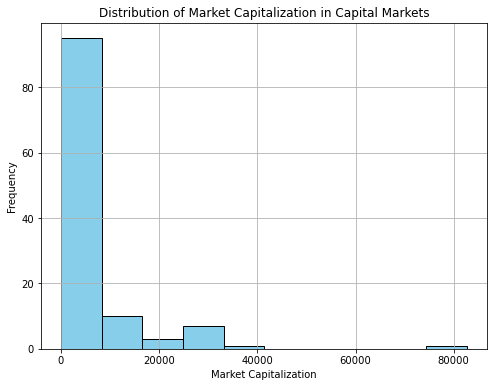

Sector Analysis: Commercial Serv
         market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     24.000000   24.000000  24.000000  24.000000   24.000000  24.000000   
mean    5148.617917   42.736667   6.174167   0.456250  118.126170  10.375833   
std    15153.405876   54.991612   7.220434   1.021613  134.857940  19.103299   
min      107.270000    0.000000   0.000000   0.000000  -21.960035 -54.970000   
25%      603.567500   19.555000   2.690000   0.000000   32.184010   3.042500   
50%     1036.690000   27.280000   3.445000   0.000000   83.474306  10.210000   
75%     2835.177500   46.690000   4.922500   0.320000  139.199038  21.912500   
max    75284.000000  278.550000  26.910000   3.800000  614.844556  53.910000   

             roe  
count  24.000000  
mean   14.318158  
std    13.542097  
min   -21.686300  
25%     4.502950  
50%    14.589550  
75%    21.403750  
max    40.503300  



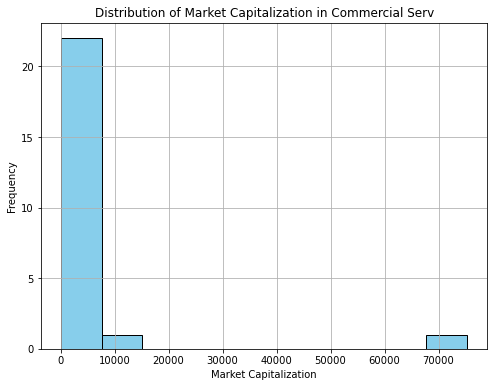

Sector Analysis: Hotels & Leisure
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     40.000000   40.000000  40.000000  40.000000   40.000000   40.000000   
mean    4996.731000   39.263750   5.412250   0.269750   71.101236   11.535000   
std    12651.110398   42.996182   4.201144   0.510733  141.504678   48.553524   
min       84.030000    0.000000   0.000000   0.000000 -146.438869  -98.810000   
25%      268.312500   15.230000   2.035000   0.000000   17.943973    0.672500   
50%      741.715000   28.440000   4.720000   0.000000   41.143828    4.725000   
75%     4074.297500   51.535000   7.275000   0.290000   78.671153    9.600000   
max    76495.250000  235.760000  16.410000   2.150000  848.613846  246.440000   

              roe  
count   40.000000  
mean     6.532578  
std     33.239829  
min   -166.981700  
25%      3.402400  
50%     13.043050  
75%     17.657975  
max     46.007000  



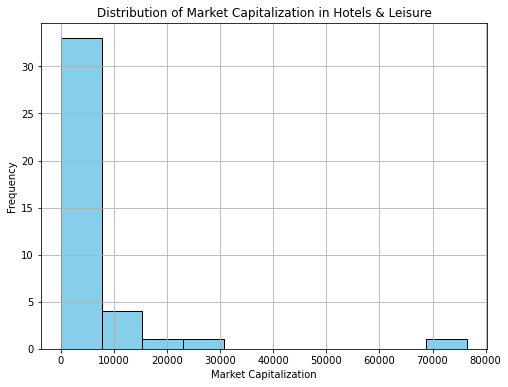

Sector Analysis: Software
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     46.000000   46.000000  46.000000  46.000000   46.000000   46.000000   
mean    6242.437609   54.671957   5.862174   0.355652  120.062400   17.841957   
std    13835.317392  110.461241   5.632319   0.569451  166.127276   45.007243   
min       76.850000    0.000000   0.640000   0.000000    1.147663  -74.810000   
25%      280.515000   14.805000   2.180000   0.000000   18.720951    0.467500   
50%      813.145000   27.005000   3.580000   0.000000   66.921382    4.225000   
75%     3546.090000   58.392500   8.017500   0.485000  116.835221   19.880000   
max    68676.590000  726.640000  24.660000   2.830000  749.797624  246.830000   

              roe  
count   46.000000  
mean    -0.234137  
std     60.975994  
min   -387.669600  
25%      2.806650  
50%      9.510650  
75%     17.017100  
max     37.459000  



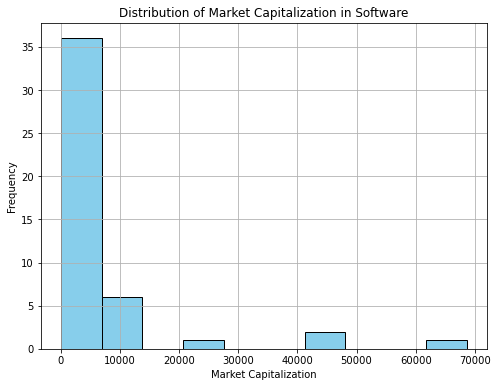

Sector Analysis: Media & Services
         market_cap    pe_ratio  pb_ratio  div_yield   book_value        eps  \
count      4.000000    4.000000  4.000000   4.000000     4.000000   4.000000   
mean   19180.805000   81.700000  2.395000   0.335000   523.106935  19.825000   
std    32823.213603  133.840987  1.861872   0.462277   693.546052  16.122424   
min      132.320000    0.000000  0.000000   0.000000    -0.907862  -0.410000   
25%      881.367500   16.492500  1.432500   0.000000    90.381849  13.922500   
50%     4201.765000   22.485000  2.685000   0.180000   284.845481  20.405000   
75%    22501.202500   87.692500  3.647500   0.515000   717.570567  26.307500   
max    68187.370000  281.830000  4.210000   0.980000  1523.644642  38.900000   

             roe  
count   4.000000  
mean   14.730825  
std    12.426211  
min     1.908900  
25%     6.649350  
50%    13.355700  
75%    21.437175  
max    30.303000  



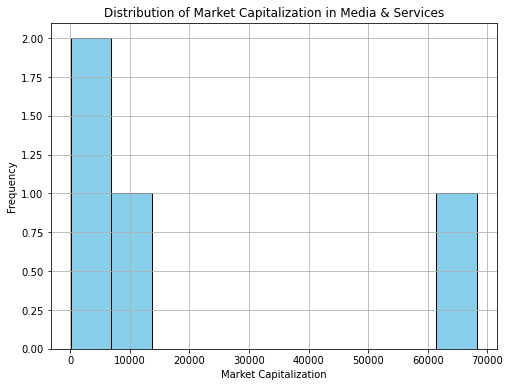

Sector Analysis: Road & Rail
       market_cap  pe_ratio  pb_ratio  div_yield  book_value    eps     roe
count        1.00       1.0      1.00       1.00    1.000000   1.00   1.000
mean     59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
std           NaN       NaN       NaN        NaN         NaN    NaN     NaN
min      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
25%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
50%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
75%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
max      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225



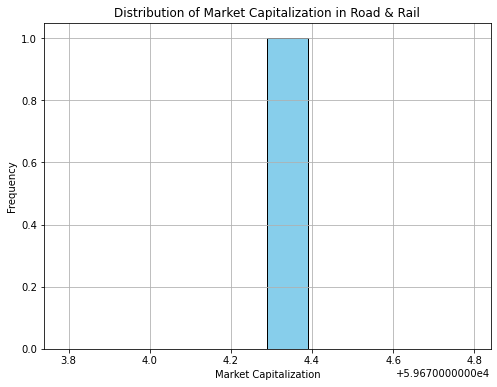

Sector Analysis: Professional Services
        market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     10.00000  10.000000  10.000000  10.000000   10.000000   10.000000   
mean   10392.54900  35.521000   5.784000   0.682000  148.960292   24.995000   
std    17610.07288  21.275471   3.390163   0.947661  164.547419   39.417195   
min       82.21000   0.000000   1.670000   0.000000   12.022149   -4.240000   
25%      235.67000  19.235000   2.782500   0.000000   63.373002    7.290000   
50%     4654.21500  36.900000   6.755000   0.120000   75.004648    8.195000   
75%     9769.89250  47.737500   7.602500   1.300000  163.414064   18.047500   
max    57693.29000  71.440000  12.050000   2.710000  453.044566  123.250000   

             roe  
count  10.000000  
mean    8.906970  
std    19.211701  
min   -43.734600  
25%    10.931050  
50%    13.185950  
75%    16.154175  
max    26.381300  



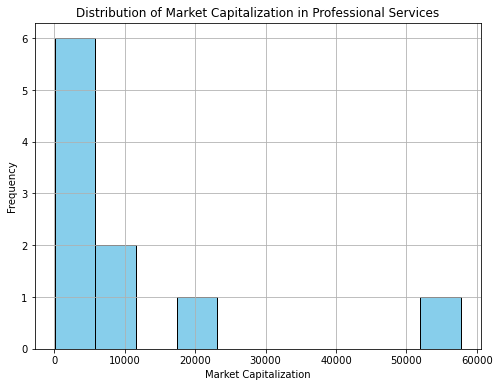

Sector Analysis: Machinery
         market_cap    pe_ratio   pb_ratio   div_yield   book_value  \
count    142.000000  142.000000  142.00000  142.000000   142.000000   
mean    5187.366690   36.342113    6.02162    0.437817   241.756854   
std    10495.599106   24.568627    4.31922    0.637030   353.184296   
min       79.080000    0.000000    0.00000    0.000000  -311.166500   
25%      271.597500   20.957500    2.77500    0.000000    40.468970   
50%      998.215000   31.155000    5.29000    0.205000   122.541047   
75%     4878.852500   50.190000    8.95000    0.652500   289.970427   
max    72561.260000  133.290000   26.69000    3.860000  2373.118974   

              eps         roe  
count  142.000000  142.000000  
mean    39.590423   14.338269  
std     67.539273   17.790310  
min    -38.620000 -118.253700  
25%      4.755000    8.503325  
50%     19.235000   15.196100  
75%     50.385000   20.534000  
max    494.210000   88.744100  



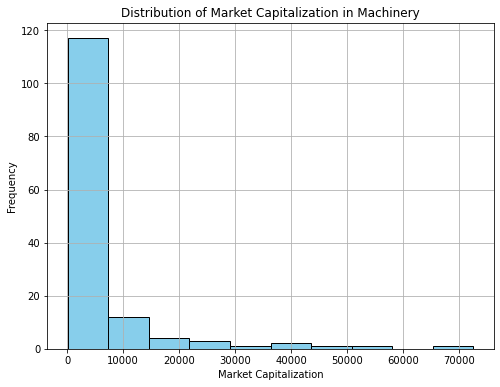

Sector Analysis: Building Products
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     32.000000   32.000000  32.000000  32.000000   32.000000   32.000000   
mean    4776.015625   44.254062   5.009062   0.286875  123.229021   17.616562   
std    10547.813919   52.262297   5.092953   0.386376  173.470591   33.779919   
min       51.910000    0.000000   0.000000   0.000000  -57.595973  -20.900000   
25%      253.687500   17.582500   1.765000   0.000000   26.183159    1.407500   
50%      633.260000   31.450000   3.610000   0.130000  100.025292   10.080000   
75%     2937.965000   48.132500   6.015000   0.457500  140.552601   20.630000   
max    52844.310000  229.790000  22.840000   1.540000  938.051481  174.400000   

             roe  
count  32.000000  
mean    9.432650  
std    19.131257  
min   -81.526000  
25%     3.759975  
50%    12.498650  
75%    16.877400  
max    34.074600  



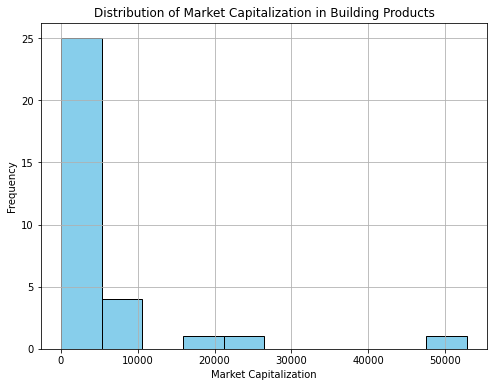

Sector Analysis: Household Durables
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     35.000000   35.000000  35.000000  35.000000   35.000000   35.000000   
mean    5460.027429   62.321143   7.069714   0.471429  133.056384   15.204000   
std     7963.692351   52.589287   9.034644   1.263006  140.821388   34.014014   
min      106.880000    0.000000   0.000000   0.000000  -34.758712  -46.190000   
25%      365.720000   31.745000   3.545000   0.000000   36.982559    3.560000   
50%     1608.130000   53.960000   4.730000   0.000000   94.430140    7.710000   
75%     7790.275000   79.115000   6.735000   0.475000  189.038802   16.285000   
max    38160.820000  246.750000  51.300000   7.260000  580.553763  186.220000   

             roe  
count  35.000000  
mean    9.108100  
std     9.515928  
min   -17.574900  
25%     5.307900  
50%     8.017500  
75%    15.024700  
max    34.705200  



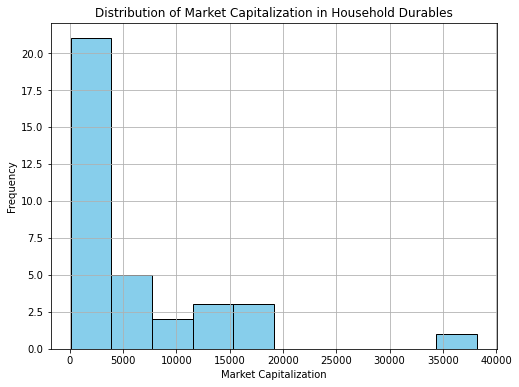

Sector Analysis: Air Freight & Logistics
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     20.000000   20.000000  20.000000  20.000000   20.000000   20.000000   
mean    4726.037000   97.140500   7.842500   0.359500  102.537435    2.578000   
std     7838.960292  179.403646  17.163377   0.515165  164.352001   47.544449   
min       38.130000    0.000000   0.000000   0.000000  -31.974680 -156.170000   
25%      218.637500    0.000000   1.860000   0.000000   16.193694   -0.815000   
50%     1335.800000   29.010000   3.310000   0.000000   38.471716    1.130000   
75%     6189.295000   74.960000   5.972500   0.645000  104.106829    4.690000   
max    33517.700000  677.940000  79.520000   1.840000  580.394444  123.330000   

                roe  
count     20.000000  
mean    -533.470845  
std     2413.706373  
min   -10788.103200  
25%       -2.154550  
50%        3.649550  
75%       13.878525  
max       24.037100  



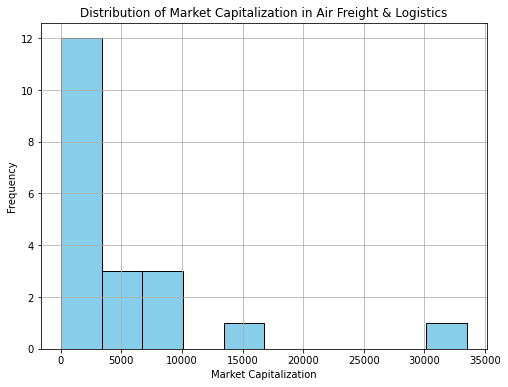

Sector Analysis: Tech Hardware
         market_cap     pe_ratio   pb_ratio  div_yield   book_value  \
count     51.000000    51.000000  51.000000  51.000000    51.000000   
mean    3843.628824   101.101569   6.204118   0.312549   202.520443   
std     7017.044959   254.327701   5.668126   0.739399   658.522692   
min       69.040000     0.000000   0.000000   0.000000    -7.730265   
25%      182.510000     6.470000   2.025000   0.000000    18.784585   
50%      760.280000    46.120000   4.960000   0.000000    48.847784   
75%     4099.660000    75.895000   7.730000   0.265000   104.672993   
max    33939.320000  1726.500000  22.030000   3.650000  3772.556561   

              eps        roe  
count   51.000000  51.000000  
mean    22.993529   6.772835  
std     80.403220  20.807462  
min    -13.330000 -65.857600  
25%      0.045000  -0.051550  
50%      2.610000   7.417100  
75%     12.295000  15.605050  
max    526.280000  84.376100  



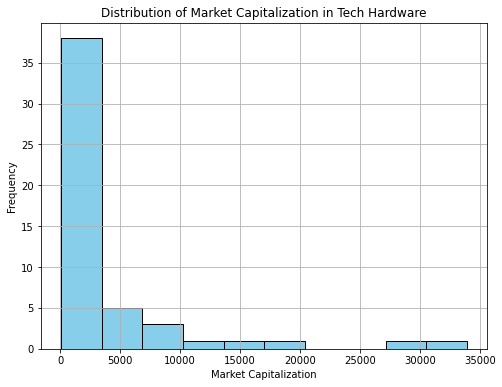

Sector Analysis: Biotechnology
         market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count      6.000000   6.000000  6.000000   6.000000    6.000000   6.000000   
mean    6220.823333  22.156667  3.268333   0.181667  105.984105   4.523333   
std    13848.898408  26.926717  2.740937   0.281881  131.767592   9.731170   
min       80.320000   0.000000  0.000000   0.000000   -7.535225  -4.180000   
25%      224.950000   0.000000  1.317500   0.000000    4.644679  -1.555000   
50%      712.120000  14.360000  3.030000   0.000000   76.233240   0.800000   
75%     1139.972500  36.850000  4.930000   0.390000  153.145486   7.962500   
max    34475.230000  64.660000  7.240000   0.570000  331.408651  21.710000   

             roe  
count   6.000000  
mean   -5.189967  
std    16.642992  
min   -28.134800  
25%   -18.160600  
50%     0.032400  
75%     7.792825  
max    10.775500  



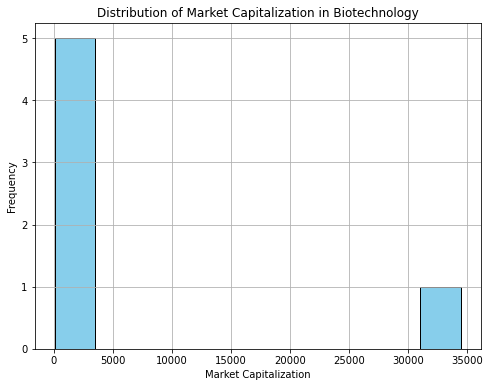

Sector Analysis: Media
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count     32.000000   32.000000  32.000000  32.000000    32.000000   
mean    3986.539375   59.720000   3.163438   1.476875   129.928277   
std     5816.470816   81.976699   3.280557   4.747052   255.276284   
min       89.250000    0.000000   0.000000   0.000000    -4.151938   
25%      786.470000    6.475000   1.005000   0.000000    22.912889   
50%     1625.720000   24.985000   1.925000   0.095000    75.672643   
75%     3835.492500   70.445000   3.865000   1.412500   128.286706   
max    24608.610000  265.270000  13.380000  26.960000  1466.591414   

              eps        roe  
count   32.000000  32.000000  
mean    12.673125   4.048028  
std     32.331166  11.600152  
min     -9.220000 -29.501900  
25%      0.187500   0.359100  
50%      3.960000   5.594050  
75%      8.537500   9.803250  
max    168.690000  26.993600  



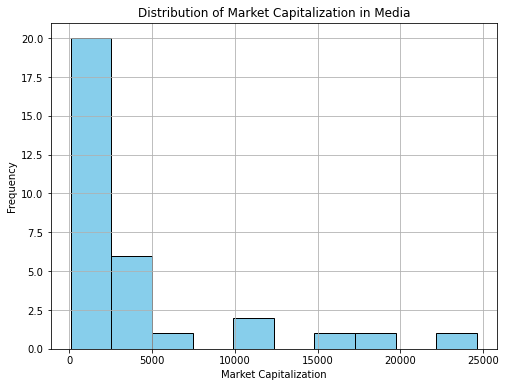

Sector Analysis: Textiles
         market_cap    pe_ratio    pb_ratio   div_yield    book_value  \
count    109.000000  109.000000  109.000000  109.000000    109.000000   
mean    1625.406239   24.190000    3.142844    0.570734    302.767507   
std     3861.675739   37.482981    5.930836    1.355212   1202.781746   
min       57.780000    0.000000    0.000000    0.000000   -133.398013   
25%      167.730000    0.000000    0.840000    0.000000     16.545131   
50%      335.150000   15.320000    1.450000    0.000000     78.047967   
75%      921.860000   30.130000    2.800000    0.520000    192.478167   
max    23013.840000  235.830000   49.930000    9.090000  12173.768678   

              eps          roe  
count  109.000000   109.000000  
mean    10.032018   -12.164194  
std     43.767034   139.781266  
min   -225.210000 -1417.384900  
25%     -1.410000    -0.232900  
50%      2.130000     5.538800  
75%     12.430000    10.310700  
max    240.770000    85.716800  



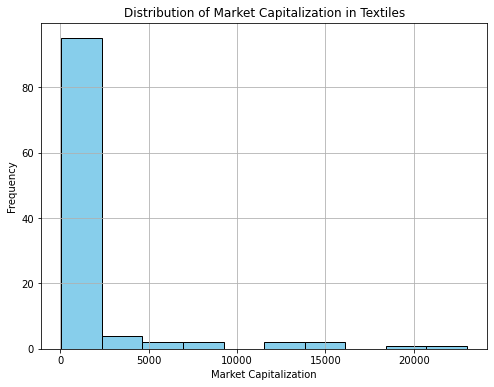

Sector Analysis: Household Products
         market_cap    pe_ratio   pb_ratio  div_yield  book_value       eps  \
count      4.000000    4.000000   4.000000   4.000000    4.000000   4.00000   
mean    5346.312500  236.642500   7.342500   0.270000   57.888002  12.58750   
std     8058.467098  393.907258   3.001515   0.322284   52.979585  15.22891   
min      120.380000   13.110000   3.460000   0.000000    4.886867   0.05000   
25%     1071.087500   40.410000   6.017500   0.000000   34.702155   4.58750   
50%     1960.805000   53.330000   7.665000   0.220000   47.697288   7.82000   
75%     6236.030000  249.562500   8.990000   0.490000   70.883134  15.82000   
max    17343.260000  826.800000  10.580000   0.640000  131.270566  34.66000   

             roe  
count   4.000000  
mean   13.126350  
std     9.254469  
min     0.807600  
25%     8.609100  
50%    15.574650  
75%    20.091900  
max    20.548500  



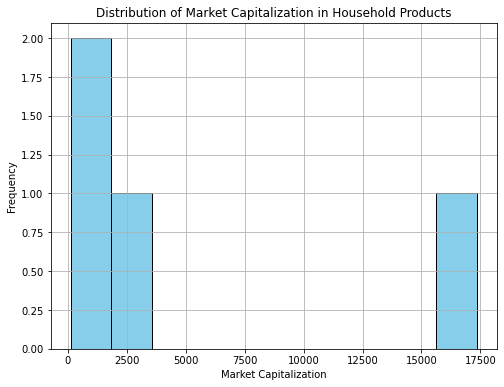

Sector Analysis: Paper & Wood Prods
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     33.000000   33.000000  33.000000  33.000000   33.000000   33.000000   
mean    2054.753939   26.203939   2.265455   0.745455  136.917280   19.958788   
std     3945.788139   41.464963   2.615908   0.999544  133.305301   33.084470   
min       67.060000    0.000000   0.000000   0.000000   -7.449647  -11.200000   
25%      191.320000    4.660000   0.930000   0.000000   44.507109    0.400000   
50%      396.030000    6.930000   1.330000   0.160000   93.327735    6.520000   
75%     1926.810000   29.170000   2.660000   1.740000  250.590593   21.800000   
max    16627.430000  207.820000  13.230000   3.810000  448.416442  128.760000   

             roe  
count  33.000000  
mean    9.566991  
std    20.981461  
min   -70.979200  
25%     0.738800  
50%     9.506800  
75%    21.126600  
max    63.083800  



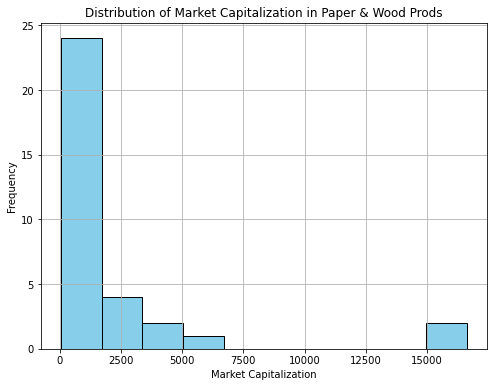

Sector Analysis: Entertainment
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     23.000000   23.000000  23.000000  23.000000   23.000000   23.000000   
mean    2234.443913   55.048261   5.705217   0.137826   93.130526    8.539565   
std     3449.268532  151.079590   7.376117   0.309721  163.072463   43.946415   
min       56.700000    0.000000   0.000000   0.000000   -9.278554  -24.040000   
25%      170.195000    0.000000   1.485000   0.000000    6.981405   -3.565000   
50%      446.610000    0.420000   3.360000   0.000000   42.186841    0.030000   
75%     3040.980000   48.675000   7.930000   0.050000   89.126757    3.680000   
max    13536.460000  736.000000  33.860000   1.160000  757.618440  206.750000   

             roe  
count  23.000000  
mean    7.095348  
std    23.083672  
min   -33.434500  
25%    -2.401850  
50%     1.914000  
75%     7.321650  
max    68.409700  



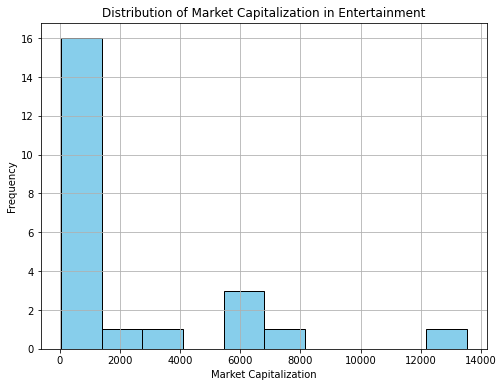

Sector Analysis: Marine
         market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count      4.000000   4.000000  4.000000   4.000000    4.000000   4.000000   
mean    3529.375000  22.517500  1.910000   0.485000  147.447546   0.900000   
std     4785.567631  19.072623  1.880869   0.532572  150.469769  13.204355   
min      607.520000   0.000000  0.700000   0.000000   21.021910 -16.090000   
25%      636.687500  10.590000  0.752500   0.142500   49.282333  -3.107500   
50%     1447.200000  23.930000  1.130000   0.365000  105.736596   1.775000   
75%     4339.887500  35.857500  2.287500   0.707500  203.901808   5.782500   
max    10615.580000  42.210000  4.680000   1.210000  357.295082  16.140000   

             roe  
count   4.000000  
mean    8.271175  
std     7.286764  
min     0.688700  
25%     2.958575  
50%     8.068050  
75%    13.380650  
max    16.259900  



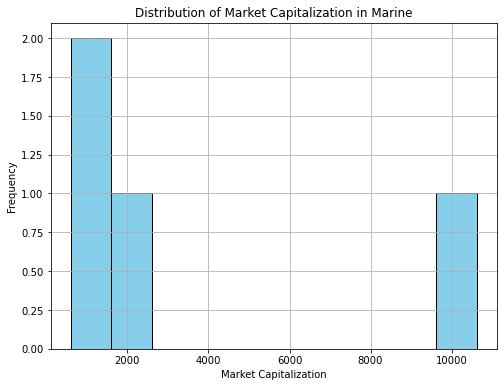

Sector Analysis: Semiconductors
        market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     7.000000    7.000000   7.000000   7.000000    7.000000   7.000000   
mean   1843.634286  201.322857   9.607143   0.022857   29.978619  -1.292857   
std    2556.842715  278.400788   4.700120   0.060474   29.596558   7.312539   
min     159.130000    0.000000   2.830000   0.000000    3.283120 -16.340000   
25%     528.755000    0.000000   7.755000   0.000000    6.162700  -0.980000   
50%    1036.150000   91.750000   8.040000   0.000000   11.424382   0.050000   
75%    1574.810000  324.570000  11.900000   0.000000   55.582027   0.685000   
max    7503.030000  668.370000  17.070000   0.160000   71.653379   7.830000   

             roe  
count   7.000000  
mean    1.857629  
std     8.138600  
min   -10.735900  
25%    -0.704650  
50%     1.233200  
75%     3.909100  
max    16.097200  



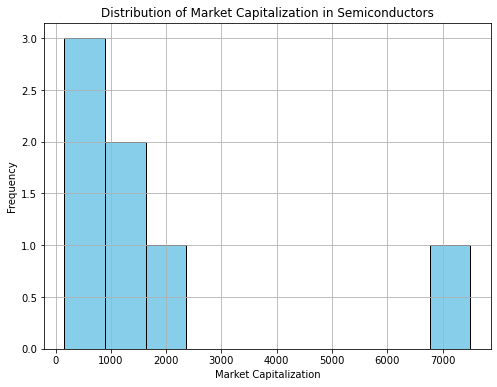

Sector Analysis: Consumer Services
        market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count    14.000000   14.000000  14.000000  14.000000   14.000000  14.000000   
mean   1096.533571   38.688571   5.898571   0.315714   43.974905  -1.562143   
std    1647.374381   77.899857   6.836447   0.591331   79.678126  20.527167   
min     128.240000    0.000000   0.000000   0.000000  -94.911471 -66.120000   
25%     255.677500    0.000000   1.667500   0.000000    7.252715  -0.342500   
50%     498.145000   16.420000   4.100000   0.000000   42.879765   0.590000   
75%    1314.190000   30.420000   7.085000   0.277500   59.498516   8.442500   
max    6496.800000  293.050000  24.490000   1.750000  277.838858  18.920000   

              roe  
count   14.000000  
mean    -1.134343  
std     60.255293  
min   -193.875800  
25%     -0.568050  
50%      3.111300  
75%     19.677600  
max     77.336700  



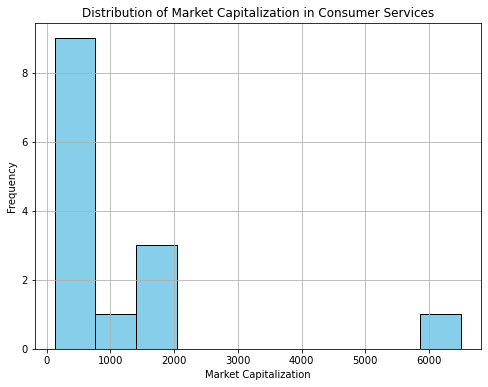

Sector Analysis: Packaging
        market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count    36.000000   36.000000  36.000000  36.000000   36.000000   36.000000   
mean   1325.772222   26.086667   2.402500   0.505278  201.940934   17.740278   
std    1746.843840   36.955466   1.509324   0.575954  267.711018   32.063087   
min     105.200000    0.000000   0.000000   0.000000  -94.478125  -58.050000   
25%     209.942500   13.732500   1.210000   0.000000   58.785722    3.040000   
50%     479.945000   18.630000   2.205000   0.420000   94.040763    8.995000   
75%    1913.765000   29.852500   3.127500   0.685000  205.935291   24.710000   
max    6125.610000  226.730000   5.630000   2.390000  999.101233  106.210000   

              roe  
count   36.000000  
mean    11.582900  
std     18.588318  
min    -19.276900  
25%      5.332050  
50%      9.774350  
75%     12.709600  
max    109.755100  



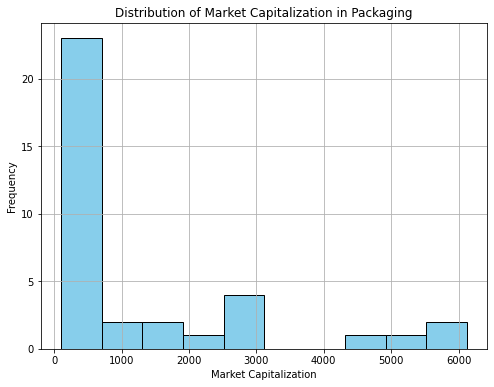

Sector Analysis: Water Utilities
       market_cap  pe_ratio  pb_ratio  div_yield  book_value   eps      roe
count        1.00      1.00       1.0        1.0    1.000000  1.00   1.0000
mean      4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
std           NaN       NaN       NaN        NaN         NaN   NaN      NaN
min       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
25%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
50%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
75%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
max       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491



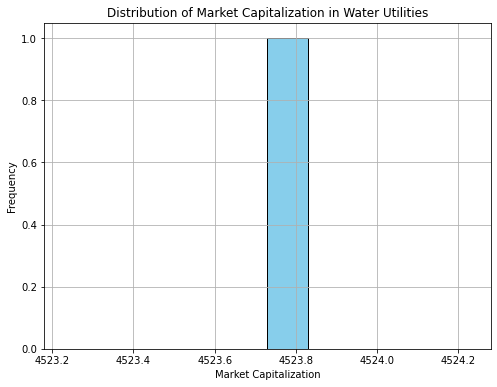

Sector Analysis: Distributors
        market_cap    pe_ratio   pb_ratio  div_yield   book_value        eps  \
count    13.000000   13.000000  13.000000  13.000000    13.000000  13.000000   
mean    595.726154   93.072308   5.567692   0.400000   174.418778  11.630769   
std     687.202806  192.716872   6.648079   0.735697   379.201959  17.805928   
min      44.520000    6.590000   0.720000   0.000000     0.999793   0.060000   
25%     140.750000   16.820000   1.300000   0.000000    10.558919   0.760000   
50%     274.890000   29.570000   1.890000   0.000000    40.441117   4.930000   
75%     749.410000   41.890000   7.100000   0.270000    92.588245  11.220000   
max    2027.100000  703.700000  19.390000   2.240000  1391.538462  63.720000   

             roe  
count  13.000000  
mean    7.394577  
std     8.120760  
min   -13.609100  
25%     4.437900  
50%     7.933400  
75%    12.396500  
max    16.950900  



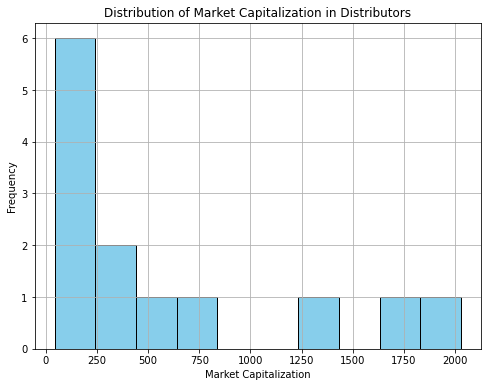

Sector Analysis: Leisure Products
       market_cap  pe_ratio  pb_ratio  div_yield  book_value   eps     roe
count        1.00      1.00      1.00        1.0    1.000000  1.00  1.0000
mean       120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
std           NaN       NaN       NaN        NaN         NaN   NaN     NaN
min        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
25%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
50%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
75%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
max        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463



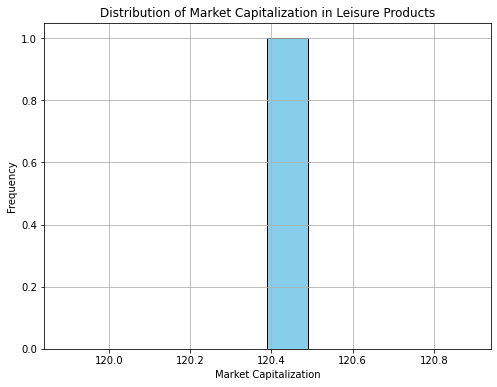

Top 5 Stocks:
                       stock_name          industry        cap  market_cap  \
7             State Bank of India             Banks  Large Cap   673585.09   
16  Oil & Natural Gas Corporation  Oil, Gas & Fuels  Large Cap   345328.66   
40         Indian Oil Corporation  Oil, Gas & Fuels  Large Cap   263784.73   
42                     Tata Steel   Metals & Mining  Large Cap   176283.76   
48           Punjab National Bank             Banks  Large Cap   143308.37   

    pe_ratio  pb_ratio  div_yield  book_value    eps        roe  
7      10.56      1.84       1.50  410.545024  71.48  18.845496  
16      8.23      1.12       4.10  246.121246  33.34  15.866100  
40      5.63      1.58       1.57  118.379248  33.19  23.147800  
42      0.00      1.99       2.50   71.464799  -2.70   0.784100  
48     18.78      1.47       0.50   88.801984   6.93   7.802557  


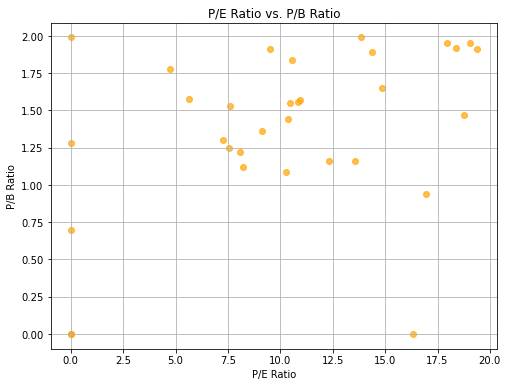

In [32]:

# Economic Analysis
# Let's assume we have GDP growth rate and inflation rate data for our analysis
gdp_growth_rate = 6.3  # Example GDP growth rate (%)
inflation_rate = 3.5   # Example inflation rate (%)

# Print economic analysis
print("Economic Analysis:")
print(f"Average GDP Growth Rate: {gdp_growth_rate}%")
print(f"Average Inflation Rate: {inflation_rate}%")
print()

# 1. Macro-economic analysis (example)
# You can add more indicators as needed
gdp_growth = 5.2  # Example GDP growth rate
inflation_rate = 3.0  # Example inflation rate

# Print macroeconomic indicators
print("Macro-economic Analysis:")
print(f"GDP Growth Rate: {gdp_growth}%")
print(f"Inflation Rate: {inflation_rate}%")
print()

# 2. Market analysis
# You can analyze market trends, volatility, etc.

# 3. Sector analysis
# Analyze different sectors
sectors = stock['industry'].unique()
for sector in sectors:
    sector_stocks = stock[stock['industry'] == sector]
    print(f"Sector Analysis: {sector}")
    print(sector_stocks.describe())  # Basic statistics for the sector
    print()
    
    # Plot histogram of market capitalization for each sector
    plt.figure(figsize=(8, 6))
    plt.hist(sector_stocks['market_cap'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Market Capitalization in {sector}')
    plt.xlabel('Market Capitalization')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# 4. Stock selection
# Filter stocks based on criteria (example: Large Cap with P/E < 20 and P/B < 2)
filtered_stocks = stock[(stock['cap'] == 'Large Cap') & (stock['pe_ratio'] < 20) & (stock['pb_ratio'] < 2)]

# Sort filtered stocks by market capitalization in descending order
sorted_stocks = filtered_stocks.sort_values(by='market_cap', ascending=False)

# Display top 5 stocks
print("Top 5 Stocks:")
print(sorted_stocks.head(5))

# Plot scatter plot of P/E ratio vs. P/B ratio for filtered stocks
plt.figure(figsize=(8, 6))
plt.scatter(filtered_stocks['pe_ratio'], filtered_stocks['pb_ratio'], color='orange', alpha=0.7)
plt.title('P/E Ratio vs. P/B Ratio')
plt.xlabel('P/E Ratio')
plt.ylabel('P/B Ratio')
plt.grid(True)
plt.show()


### Industry analysis

Industry Analysis: Aerospace & Defense
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      13.000000   13.000000  13.000000  13.000000   13.000000  13.000000   
mean    34798.269231   61.633846   7.445385   0.450769  147.392822  26.477692   
std     63608.965471   35.101715   2.068206   0.378494  104.320815  28.679155   
min       536.800000   26.320000   3.310000   0.000000   16.548074   0.900000   
25%      2840.370000   33.510000   6.700000   0.020000   89.377173   6.790000   
50%      3610.030000   42.980000   7.350000   0.550000  136.487298  21.670000   
75%     31333.760000   86.500000   9.280000   0.780000  214.641230  29.640000   
max    205865.660000  133.390000  10.900000   0.960000  376.136182  91.860000   

             roe  
count  13.000000  
mean   15.179515  
std     8.123844  
min     1.034300  
25%    10.923900  
50%    13.682400  
75%    22.427200  
max    29.201000  



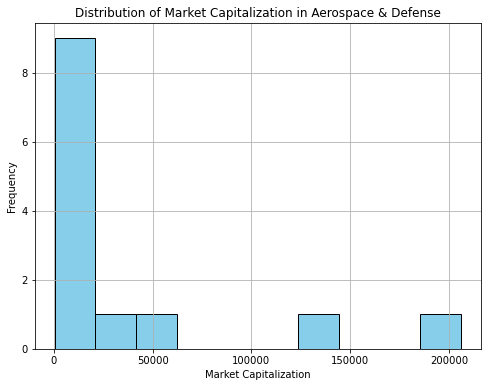

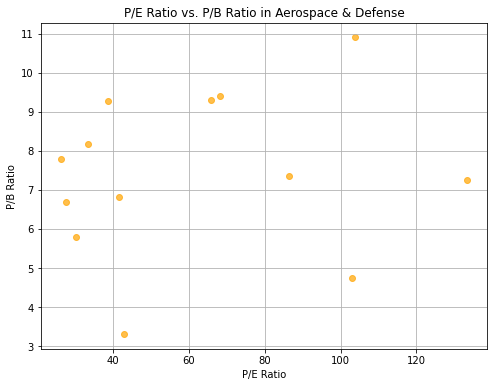

Industry Analysis: Air Freight & Logistics
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     20.000000   20.000000  20.000000  20.000000   20.000000   20.000000   
mean    4726.037000   97.140500   7.842500   0.359500  102.537435    2.578000   
std     7838.960292  179.403646  17.163377   0.515165  164.352001   47.544449   
min       38.130000    0.000000   0.000000   0.000000  -31.974680 -156.170000   
25%      218.637500    0.000000   1.860000   0.000000   16.193694   -0.815000   
50%     1335.800000   29.010000   3.310000   0.000000   38.471716    1.130000   
75%     6189.295000   74.960000   5.972500   0.645000  104.106829    4.690000   
max    33517.700000  677.940000  79.520000   1.840000  580.394444  123.330000   

                roe  
count     20.000000  
mean    -533.470845  
std     2413.706373  
min   -10788.103200  
25%       -2.154550  
50%        3.649550  
75%       13.878525  
max       24.037100  



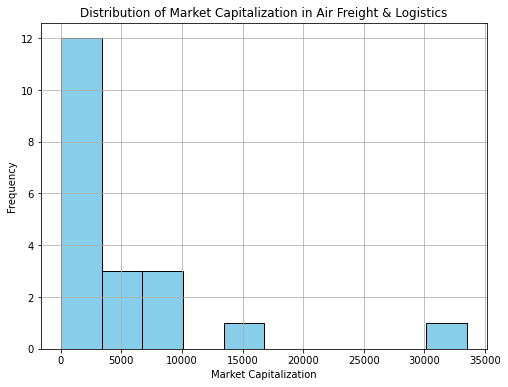

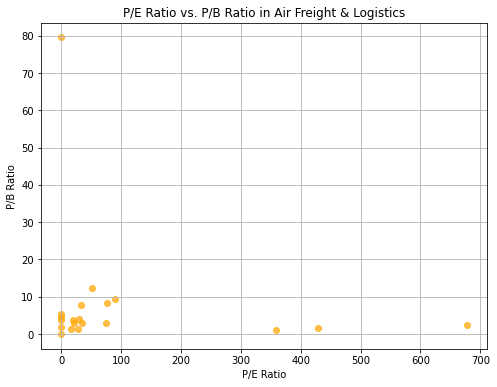

Industry Analysis: Airlines
          market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count       2.000000   2.000000       2.0        2.0    2.000000    2.00000   
mean    61202.330000   8.165000       0.0        0.0  -79.328675   92.15500   
std     79700.169054  11.547054       0.0        0.0    4.903509  133.36741   
min      4845.800000   0.000000       0.0        0.0  -82.795980   -2.15000   
25%     33024.065000   4.082500       0.0        0.0  -81.062328   45.00250   
50%     61202.330000   8.165000       0.0        0.0  -79.328675   92.15500   
75%     89380.595000  12.247500       0.0        0.0  -77.595023  139.30750   
max    117558.860000  16.330000       0.0        0.0  -75.861370  186.46000   

              roe  
count    2.000000  
mean   -94.686650  
std    137.577594  
min   -191.968700  
25%   -143.327675  
50%    -94.686650  
75%    -46.045625  
max      2.595400  



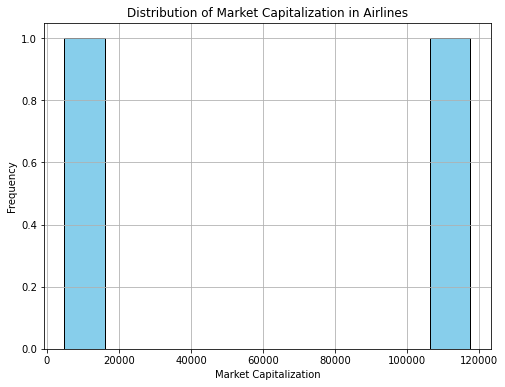

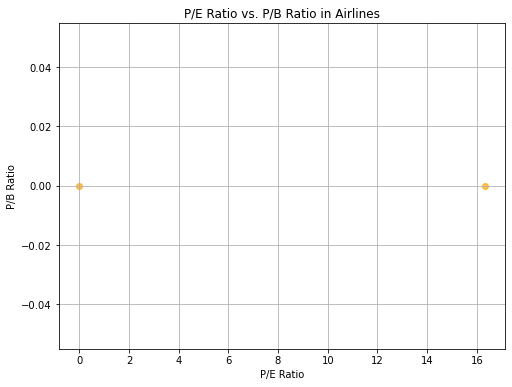

Industry Analysis: Apparel & Luxury
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      65.000000   65.000000  65.000000  65.000000    65.000000   
mean     9149.544615   44.793385   5.762769   0.297692   125.791871   
std     40629.483806   45.723165   6.439764   0.488751   219.170418   
min        63.350000    0.000000   0.000000   0.000000    -5.944732   
25%       154.610000   17.740000   1.580000   0.000000    17.120587   
50%       720.000000   34.540000   3.110000   0.080000    55.322699   
75%      3220.910000   58.850000   6.680000   0.500000   121.793716   
max    324627.890000  296.830000  26.470000   3.030000  1372.143946   

              eps         roe  
count   65.000000   65.000000  
mean    17.009385   18.934543  
std     61.844782   69.635770  
min    -63.250000  -44.159200  
25%      0.620000    2.973400  
50%      4.870000    9.923100  
75%     20.580000   18.584700  
max    483.710000  562.554700  



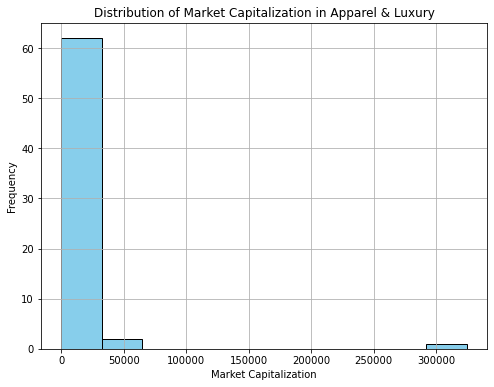

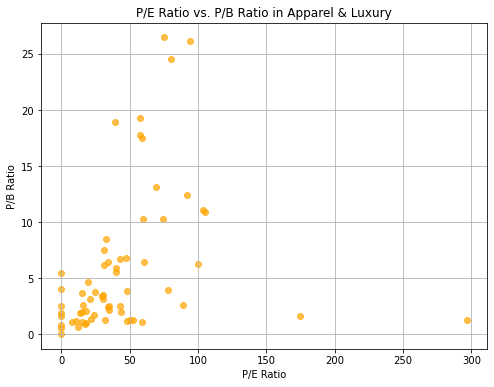

Industry Analysis: Auto Components
         market_cap     pe_ratio    pb_ratio   div_yield   book_value  \
count    107.000000   107.000000  107.000000  107.000000   107.000000   
mean    7742.014206    56.158879    5.151121    0.560280   258.449585   
std    15798.606031   126.944307    6.874551    0.663131   460.575417   
min       77.430000     0.000000    0.000000    0.000000   -88.248070   
25%      367.245000    18.575000    2.415000    0.000000    50.843751   
50%     1341.760000    30.190000    3.690000    0.390000   139.764473   
75%     5009.940000    49.400000    5.490000    0.770000   243.230969   
max    83541.470000  1141.810000   63.070000    3.200000  3927.319124   

              eps         roe  
count  107.000000  107.000000  
mean    36.423925   10.780658  
std     90.605512   13.780271  
min    -53.300000  -67.497500  
25%      3.660000    6.786650  
50%     12.780000   11.550100  
75%     31.970000   16.011350  
max    788.440000   57.501100  



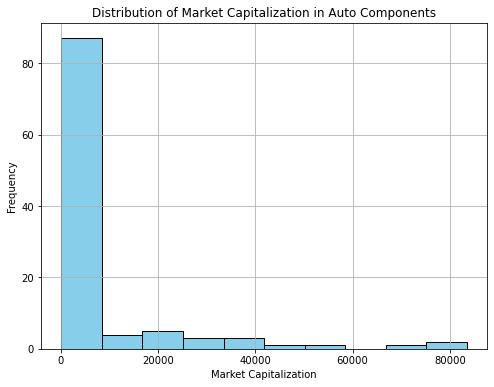

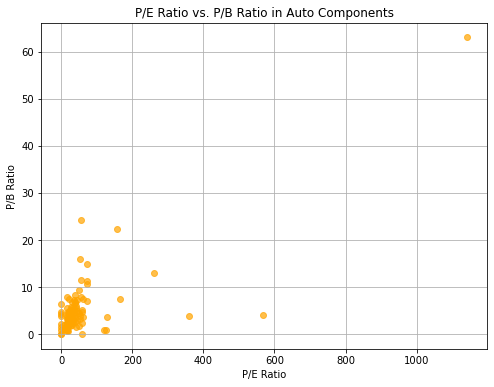

Industry Analysis: Auto Manufacturers
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      11.000000   11.000000  11.000000  11.000000    11.000000   
mean   134314.281818  127.687273   8.656364   0.623636   539.686333   
std    136547.968246  218.248742   7.019046   0.707846   744.742123   
min       426.290000   16.080000   0.000000   0.000000    -0.867776   
25%      1753.050000   27.560000   4.195000   0.070000    68.795694   
50%    101581.130000   31.850000   5.830000   0.230000   161.111274   
75%    232012.865000  122.975000  12.055000   0.895000   732.971314   
max    357401.840000  754.420000  20.960000   2.040000  2501.068806   

              eps        roe  
count   11.000000  11.000000  
mean   105.103636  17.567364  
std    127.305292   8.703852  
min      0.120000   1.552900  
25%      1.580000  13.248500  
50%     58.380000  18.466100  
75%    160.470000  23.193850  
max    387.680000  28.582200  



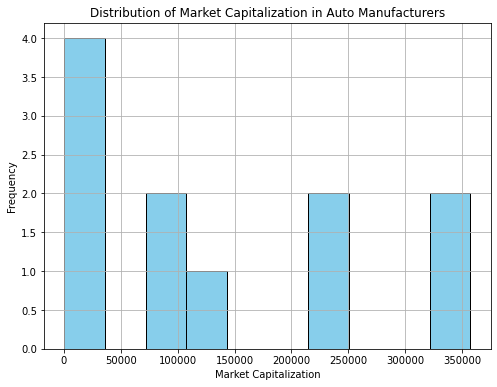

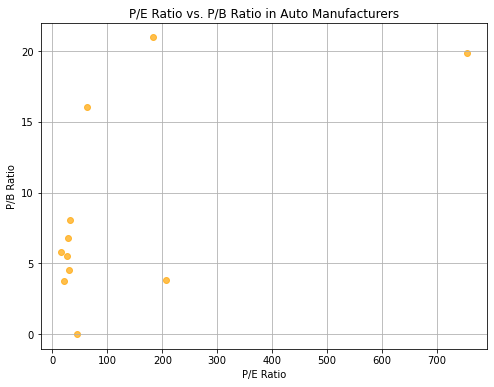

Industry Analysis: Banks
         market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count  3.900000e+01  39.000000  39.000000  39.000000   39.000000   39.000000   
mean   1.211339e+05  17.640769   1.990000   0.735641  185.212755   26.486154   
std    2.252775e+05  14.972624   0.962185   0.716441  192.602005   28.880709   
min    1.208890e+03   6.330000   0.950000   0.000000   12.703489    0.360000   
25%    9.561985e+03   9.290000   1.305000   0.000000   36.823659    5.265000   
50%    4.398949e+04  11.950000   1.840000   0.710000  114.030677   15.870000   
75%    1.068300e+05  19.075000   2.395000   1.080000  236.405246   38.240000   
max    1.078493e+06  78.940000   5.370000   2.230000  745.650979  111.440000   

             roe  
count  39.000000  
mean   13.908897  
std     4.531452  
min     2.514391  
25%    11.109565  
50%    14.328715  
75%    16.406021  
max    27.927591  



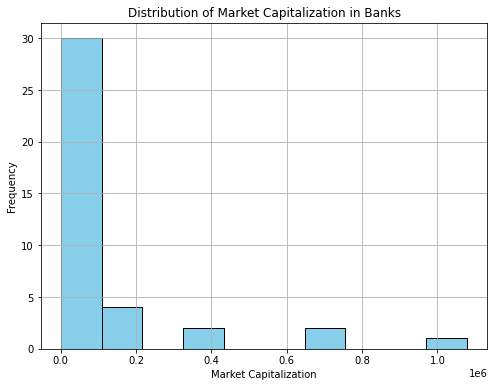

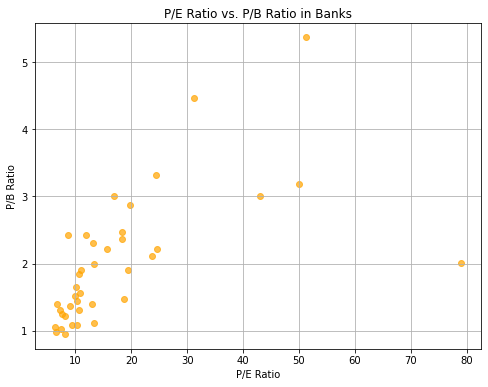

Industry Analysis: Beverages
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      18.000000   18.000000  18.000000  18.000000   18.000000  18.000000   
mean    19696.082778   43.354444   7.360556   0.237222  103.168277  10.611111   
std     46356.687597   40.082958   7.241218   0.386185  190.119682  21.965248   
min       140.870000    0.000000   0.000000   0.000000 -292.486931 -53.320000   
25%       384.400000   13.207500   1.777500   0.000000    4.488065   2.592500   
50%      1074.335000   25.940000   5.920000   0.080000   57.837118  10.885000   
75%      5030.527500   76.860000  11.330000   0.202500  167.289472  17.042500   
max    184715.590000  135.310000  26.630000   1.350000  587.630736  54.700000   

              roe  
count   18.000000  
mean    -0.590128  
std     37.610898  
min   -125.312300  
25%      4.034875  
50%     12.194400  
75%     17.966725  
max     29.639200  



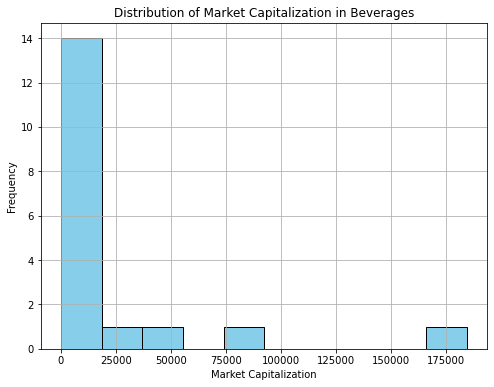

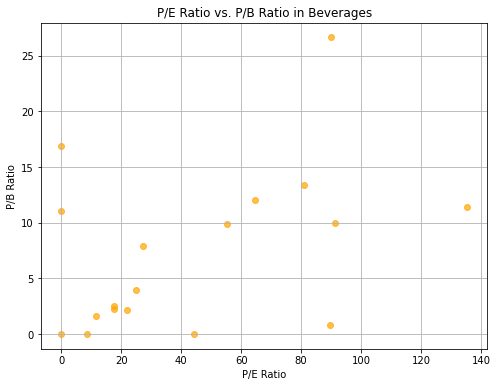

Industry Analysis: Biotechnology
         market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count      6.000000   6.000000  6.000000   6.000000    6.000000   6.000000   
mean    6220.823333  22.156667  3.268333   0.181667  105.984105   4.523333   
std    13848.898408  26.926717  2.740937   0.281881  131.767592   9.731170   
min       80.320000   0.000000  0.000000   0.000000   -7.535225  -4.180000   
25%      224.950000   0.000000  1.317500   0.000000    4.644679  -1.555000   
50%      712.120000  14.360000  3.030000   0.000000   76.233240   0.800000   
75%     1139.972500  36.850000  4.930000   0.390000  153.145486   7.962500   
max    34475.230000  64.660000  7.240000   0.570000  331.408651  21.710000   

             roe  
count   6.000000  
mean   -5.189967  
std    16.642992  
min   -28.134800  
25%   -18.160600  
50%     0.032400  
75%     7.792825  
max    10.775500  



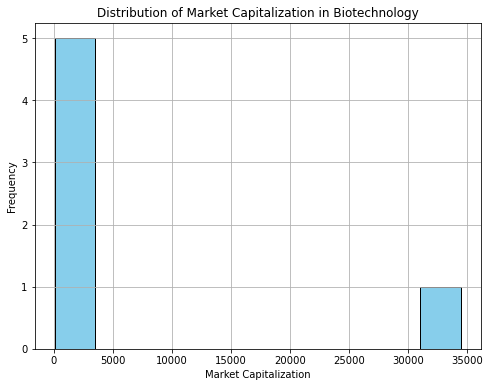

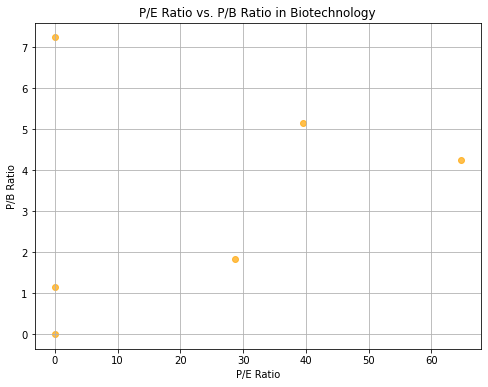

Industry Analysis: Building Materials
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      51.000000   51.000000  51.000000  51.000000    51.000000   
mean    17787.422941   34.966471   2.956275   0.496471   378.512441   
std     47882.817691   56.919548   3.145697   0.792810   826.535762   
min        82.640000    0.000000   0.000000   0.000000  -172.789640   
25%       460.410000    0.510000   1.310000   0.000000    51.810922   
50%      2020.090000   22.580000   2.180000   0.210000   119.985032   
75%      8654.070000   40.405000   3.415000   0.515000   309.882473   
max    286241.050000  310.530000  18.380000   3.550000  5403.258477   

              eps        roe  
count   51.000000  51.000000  
mean    28.807843   2.999627  
std     95.499794  20.544856  
min    -89.600000 -61.324400  
25%     -0.125000   1.456900  
50%      6.820000   5.828500  
75%     25.550000   9.236050  
max    622.660000  78.067500  



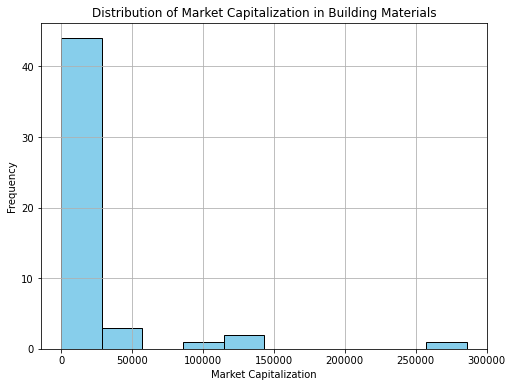

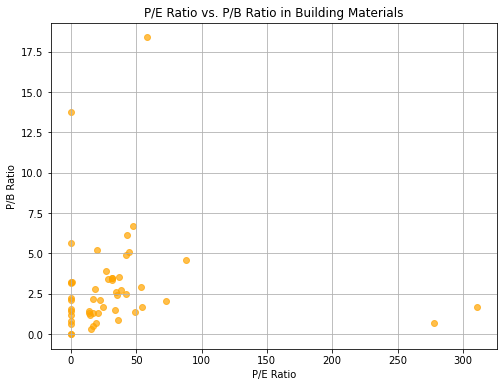

Industry Analysis: Building Products
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     32.000000   32.000000  32.000000  32.000000   32.000000   32.000000   
mean    4776.015625   44.254062   5.009062   0.286875  123.229021   17.616562   
std    10547.813919   52.262297   5.092953   0.386376  173.470591   33.779919   
min       51.910000    0.000000   0.000000   0.000000  -57.595973  -20.900000   
25%      253.687500   17.582500   1.765000   0.000000   26.183159    1.407500   
50%      633.260000   31.450000   3.610000   0.130000  100.025292   10.080000   
75%     2937.965000   48.132500   6.015000   0.457500  140.552601   20.630000   
max    52844.310000  229.790000  22.840000   1.540000  938.051481  174.400000   

             roe  
count  32.000000  
mean    9.432650  
std    19.131257  
min   -81.526000  
25%     3.759975  
50%    12.498650  
75%    16.877400  
max    34.074600  



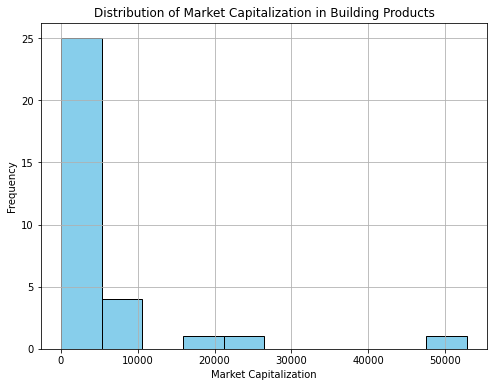

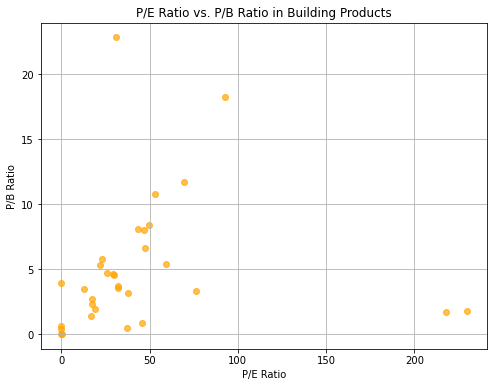

Industry Analysis: Capital Markets
         market_cap      pe_ratio    pb_ratio   div_yield    book_value  \
count    117.000000    117.000000  117.000000  117.000000    117.000000   
mean    5070.888803    258.681111    5.751197    0.674530   1584.700825   
std    10757.114010   2366.324753   13.000719    1.576678   4621.178002   
min       41.020000      0.000000    0.100000    0.000000      0.017515   
25%      230.920000      9.640000    0.840000    0.000000     39.035966   
50%      703.580000     19.010000    1.830000    0.000000    107.482130   
75%     3288.240000     39.780000    5.050000    0.570000    417.452403   
max    82731.450000  25610.360000  122.750000   10.140000  26735.620000   

               eps         roe  
count   117.000000  117.000000  
mean     99.454615   11.259948  
std     428.501478   14.809237  
min     -14.670000  -26.584400  
25%       2.860000    2.437800  
50%      13.630000    8.391200  
75%      53.370000   17.715900  
max    3423.330000   99.8

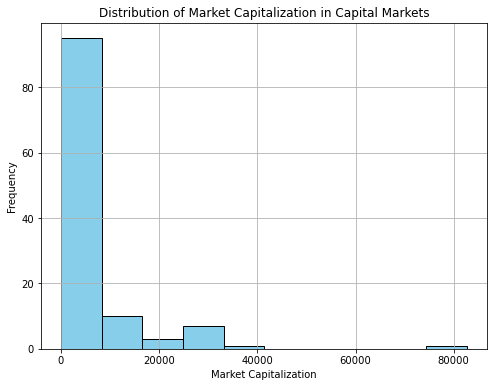

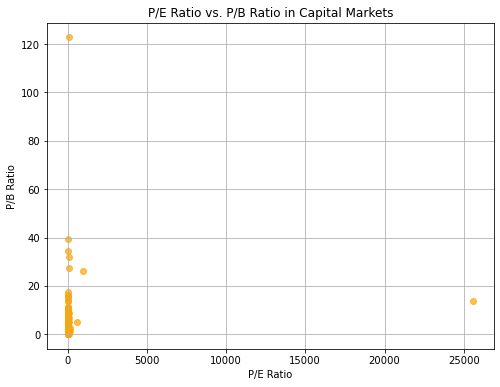

Industry Analysis: Chemicals
          market_cap     pe_ratio    pb_ratio   div_yield   book_value  \
count     231.000000   231.000000  231.000000  231.000000   231.000000   
mean     7442.354156    93.465584    4.262900    0.863853   276.936209   
std     23443.914422   593.731981    4.562937    1.998357   708.420882   
min        66.160000     0.000000    0.000000    0.000000  -155.951675   
25%       438.000000    12.840000    1.595000    0.110000    54.534577   
50%      1419.280000    25.160000    2.800000    0.360000   146.203579   
75%      4801.655000    49.340000    5.285000    0.970000   295.574874   
max    288497.920000  7282.000000   35.850000   24.050000  9972.408333   

              eps          roe  
count  231.000000   231.000000  
mean    26.259004    -2.900794  
std     54.157845   228.680718  
min   -171.530000 -3451.865100  
25%      2.630000     4.515450  
50%     11.920000    10.483800  
75%     32.355000    17.502300  
max    528.750000   216.886300  



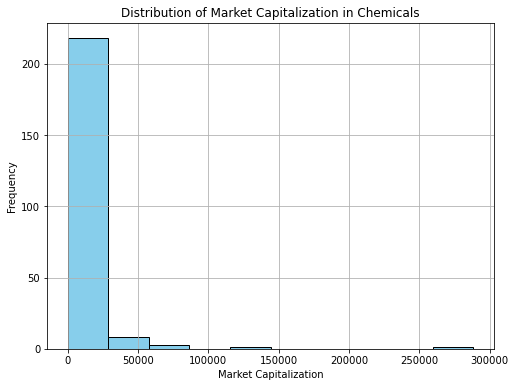

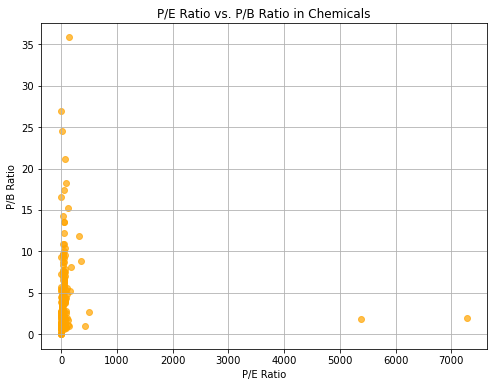

Industry Analysis: Commercial Serv
         market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     24.000000   24.000000  24.000000  24.000000   24.000000  24.000000   
mean    5148.617917   42.736667   6.174167   0.456250  118.126170  10.375833   
std    15153.405876   54.991612   7.220434   1.021613  134.857940  19.103299   
min      107.270000    0.000000   0.000000   0.000000  -21.960035 -54.970000   
25%      603.567500   19.555000   2.690000   0.000000   32.184010   3.042500   
50%     1036.690000   27.280000   3.445000   0.000000   83.474306  10.210000   
75%     2835.177500   46.690000   4.922500   0.320000  139.199038  21.912500   
max    75284.000000  278.550000  26.910000   3.800000  614.844556  53.910000   

             roe  
count  24.000000  
mean   14.318158  
std    13.542097  
min   -21.686300  
25%     4.502950  
50%    14.589550  
75%    21.403750  
max    40.503300  



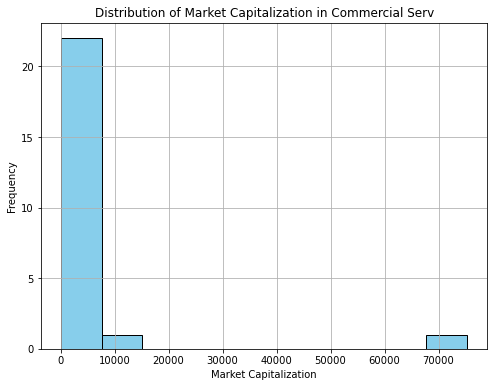

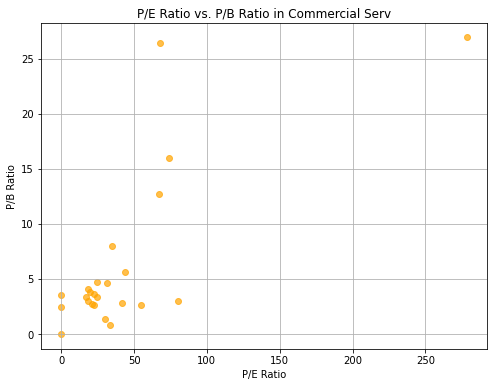

Industry Analysis: Construction
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      80.000000   80.000000  80.000000  80.000000    80.000000   
mean    11205.809375   37.913750   4.794250   0.266000   103.677333   
std     52270.385265   71.987448   8.028964   0.463904   172.377364   
min        64.040000    0.000000   0.000000   0.000000   -84.167523   
25%       353.292500   10.522500   1.667500   0.000000    18.095606   
50%      2156.870000   21.730000   2.755000   0.000000    46.033786   
75%      6587.120000   35.840000   5.042500   0.402500   140.750323   
max    465861.990000  584.290000  56.340000   2.650000  1086.840290   

              eps          roe  
count   80.000000    80.000000  
mean    13.618500    -4.875799  
std     38.572689   202.959867  
min    -77.740000 -1389.606900  
25%      0.320000     6.106350  
50%      5.745000    11.518450  
75%     13.492500    18.368425  
max    191.840000   720.043000  



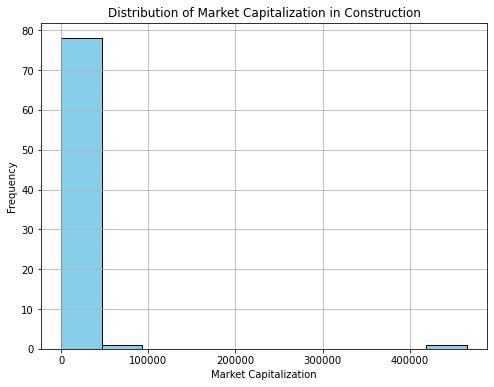

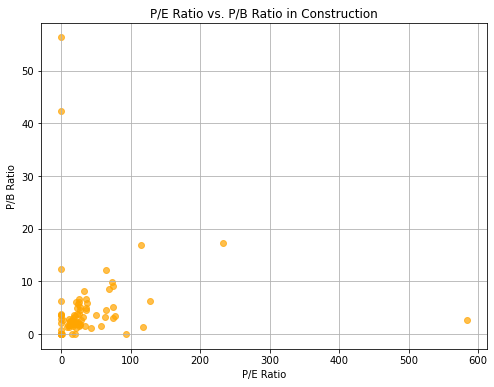

Industry Analysis: Consumer Finance
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      49.000000   49.000000  49.000000  49.000000    49.000000   
mean    20787.792449   27.594286   2.969184   0.305510   274.209113   
std     61018.434295   28.834019   1.706869   0.543645   399.598557   
min        23.920000    0.000000   0.650000   0.000000     1.055492   
25%       325.630000   11.470000   1.780000   0.000000    29.968373   
50%      2431.060000   18.450000   2.480000   0.000000   116.349712   
75%     15790.240000   33.960000   4.180000   0.430000   300.878261   
max    409208.530000  143.960000   8.100000   2.070000  1746.944553   

              eps        roe  
count   49.000000  49.000000  
mean    39.607755   9.338592  
std     61.915679  13.519101  
min    -61.230000 -64.321900  
25%      1.440000   6.275900  
50%     14.730000  11.167700  
75%     61.790000  17.315400  
max    223.040000  29.580300  



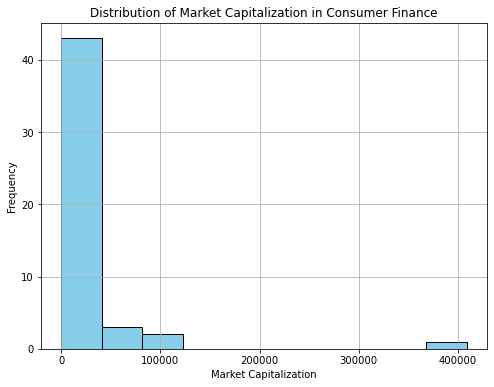

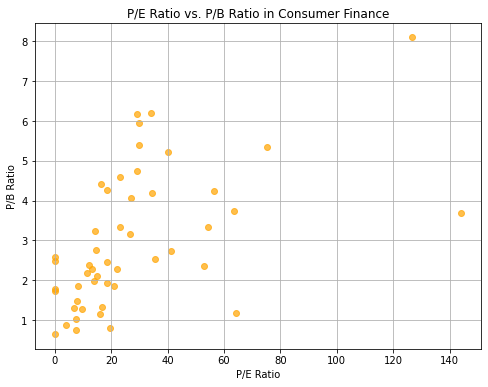

Industry Analysis: Consumer Retail
          market_cap    pe_ratio   pb_ratio  div_yield  book_value      eps  \
count      10.000000   10.000000  10.000000  10.000000   10.000000  10.0000   
mean    25157.371000   40.884000   4.682000   0.021000   85.990328  10.9340   
std     75505.645309   45.300682   4.983791   0.053841  112.255137  48.1702   
min        80.770000    0.000000   0.000000   0.000000  -31.702089 -81.9800   
25%       189.450000    7.317500   1.530000   0.000000   15.250879   1.0825   
50%       503.630000   27.895000   3.120000   0.000000   49.515035   3.9550   
75%      1003.967500   48.465000   5.490000   0.000000  119.650901  30.8975   
max    239938.300000  138.430000  13.770000   0.170000  288.372093  91.9500   

              roe  
count   10.000000  
mean    58.067280  
std    114.674419  
min      3.831300  
25%      8.041475  
50%     17.841850  
75%     27.706950  
max    376.449800  



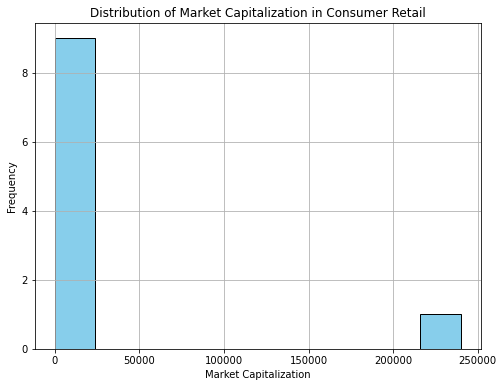

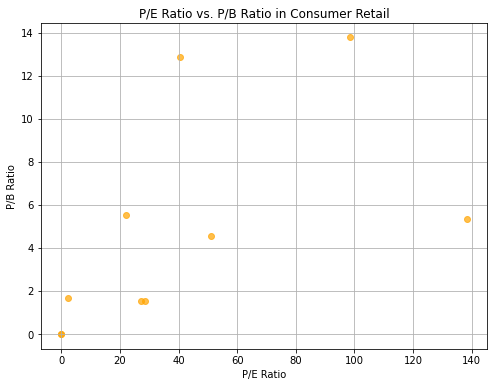

Industry Analysis: Consumer Services
        market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count    14.000000   14.000000  14.000000  14.000000   14.000000  14.000000   
mean   1096.533571   38.688571   5.898571   0.315714   43.974905  -1.562143   
std    1647.374381   77.899857   6.836447   0.591331   79.678126  20.527167   
min     128.240000    0.000000   0.000000   0.000000  -94.911471 -66.120000   
25%     255.677500    0.000000   1.667500   0.000000    7.252715  -0.342500   
50%     498.145000   16.420000   4.100000   0.000000   42.879765   0.590000   
75%    1314.190000   30.420000   7.085000   0.277500   59.498516   8.442500   
max    6496.800000  293.050000  24.490000   1.750000  277.838858  18.920000   

              roe  
count   14.000000  
mean    -1.134343  
std     60.255293  
min   -193.875800  
25%     -0.568050  
50%      3.111300  
75%     19.677600  
max     77.336700  



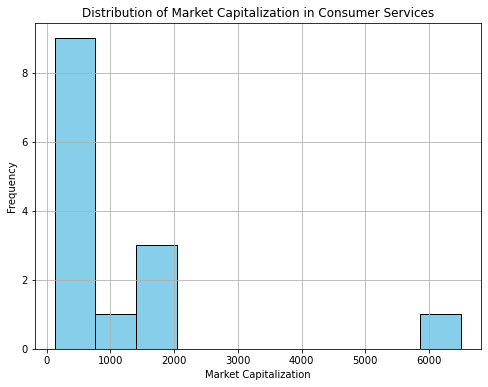

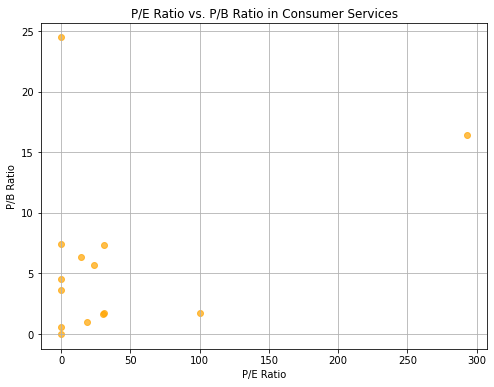

Industry Analysis: Distributors
        market_cap    pe_ratio   pb_ratio  div_yield   book_value        eps  \
count    13.000000   13.000000  13.000000  13.000000    13.000000  13.000000   
mean    595.726154   93.072308   5.567692   0.400000   174.418778  11.630769   
std     687.202806  192.716872   6.648079   0.735697   379.201959  17.805928   
min      44.520000    6.590000   0.720000   0.000000     0.999793   0.060000   
25%     140.750000   16.820000   1.300000   0.000000    10.558919   0.760000   
50%     274.890000   29.570000   1.890000   0.000000    40.441117   4.930000   
75%     749.410000   41.890000   7.100000   0.270000    92.588245  11.220000   
max    2027.100000  703.700000  19.390000   2.240000  1391.538462  63.720000   

             roe  
count  13.000000  
mean    7.394577  
std     8.120760  
min   -13.609100  
25%     4.437900  
50%     7.933400  
75%    12.396500  
max    16.950900  



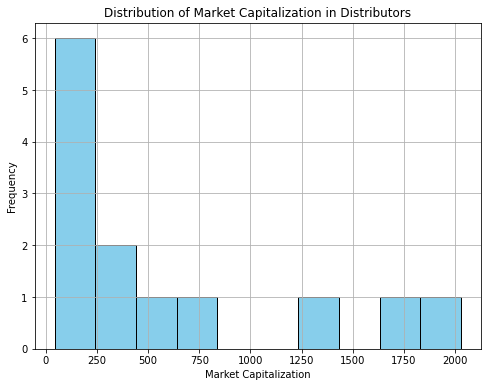

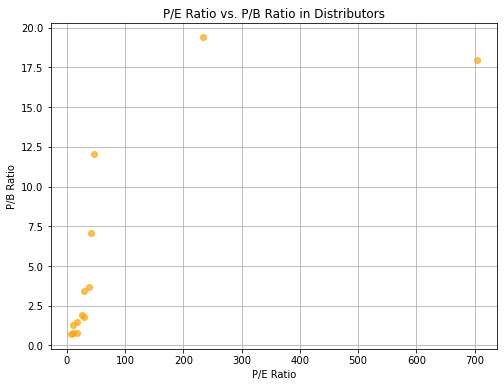

Industry Analysis: Electric Utilities
          market_cap    pe_ratio   pb_ratio  div_yield  book_value  \
count      10.000000   10.000000  10.000000  10.000000   10.000000   
mean    62925.116000   39.429000   3.545000   1.187000   98.761761   
std     81643.610487   48.754128   2.643034   1.534109   83.557912   
min       116.520000    0.000000   0.930000   0.000000   10.361358   
25%      4204.632500    3.107500   1.702500   0.000000   39.495909   
50%     32445.545000   23.350000   3.125000   0.370000   90.085409   
75%    102751.277500   49.307500   4.522500   2.032500  103.571279   
max    255627.100000  145.630000   9.940000   4.020000  246.599311   

              eps        roe  
count   10.000000  10.000000  
mean    -1.425000   6.178880  
std     37.684686  10.073978  
min   -103.330000 -12.446700  
25%     -0.185000  -1.553175  
50%      6.330000   9.072800  
75%     11.057500  12.399125  
max     38.540000  18.366800  



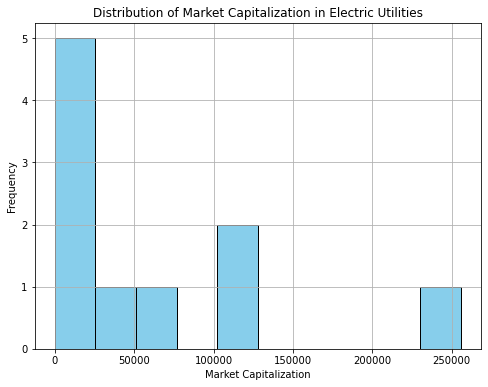

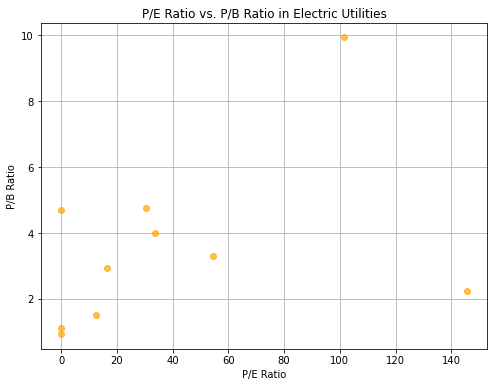

Industry Analysis: Electrical Equip.
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count     77.000000   77.000000  77.000000  77.000000    77.000000   
mean   10001.297922   50.819870   7.771558   0.268442   268.388638   
std    20886.445270   59.420743   8.729680   0.491486   584.921702   
min       89.090000    0.000000   0.000000   0.000000   -29.060431   
25%      266.280000   18.900000   2.320000   0.000000    25.806399   
50%     1191.390000   30.870000   5.290000   0.000000    68.684639   
75%    11251.680000   60.380000   9.740000   0.360000   253.340703   
max    95819.670000  351.320000  60.510000   2.500000  3374.412698   

              eps         roe  
count   77.000000   77.000000  
mean    22.455714   15.897931  
std     86.633285   52.373889  
min   -159.070000  -70.771300  
25%      1.720000    4.828400  
50%      6.880000   11.230700  
75%     24.500000   17.634300  
max    605.080000  444.459100  



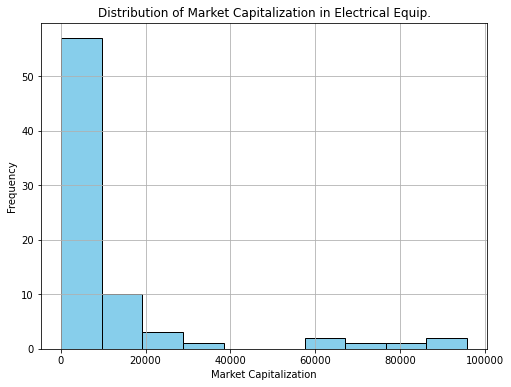

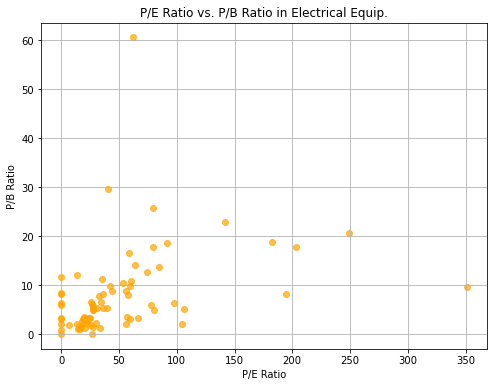

Industry Analysis: Energy
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      35.00000   35.000000  35.000000  35.000000    35.000000   
mean    32451.02600   41.436286   6.316286   0.472000    24.673493   
std     81448.36634   60.465164  14.270119   0.917887   752.032474   
min        75.70000    0.000000   0.000000   0.000000 -3952.433011   
25%       255.14500    4.785000   1.120000   0.000000    12.945042   
50%      2059.61000   23.130000   2.130000   0.000000    50.081249   
75%      8851.26000   51.175000   3.970000   0.490000   124.615609   
max    327407.93000  230.090000  77.890000   3.990000  1696.055227   

              eps         roe  
count   35.000000   35.000000  
mean     9.848857    2.916243  
std     56.897787   51.144614  
min   -232.730000 -269.532800  
25%      0.195000    0.727400  
50%      4.490000    6.514200  
75%     19.320000   15.422200  
max    214.520000   59.219100  



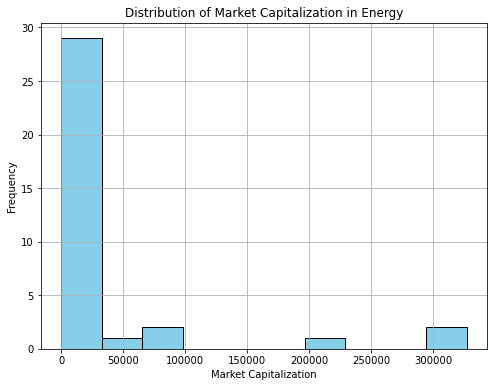

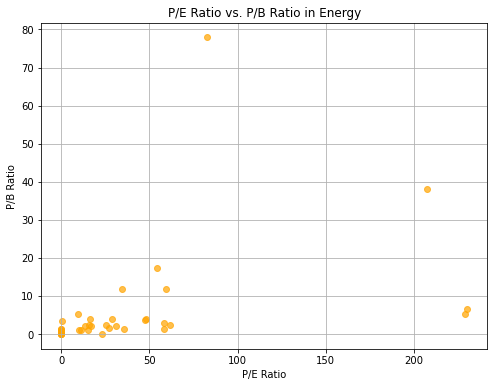

Industry Analysis: Entertainment
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     23.000000   23.000000  23.000000  23.000000   23.000000   23.000000   
mean    2234.443913   55.048261   5.705217   0.137826   93.130526    8.539565   
std     3449.268532  151.079590   7.376117   0.309721  163.072463   43.946415   
min       56.700000    0.000000   0.000000   0.000000   -9.278554  -24.040000   
25%      170.195000    0.000000   1.485000   0.000000    6.981405   -3.565000   
50%      446.610000    0.420000   3.360000   0.000000   42.186841    0.030000   
75%     3040.980000   48.675000   7.930000   0.050000   89.126757    3.680000   
max    13536.460000  736.000000  33.860000   1.160000  757.618440  206.750000   

             roe  
count  23.000000  
mean    7.095348  
std    23.083672  
min   -33.434500  
25%    -2.401850  
50%     1.914000  
75%     7.321650  
max    68.409700  



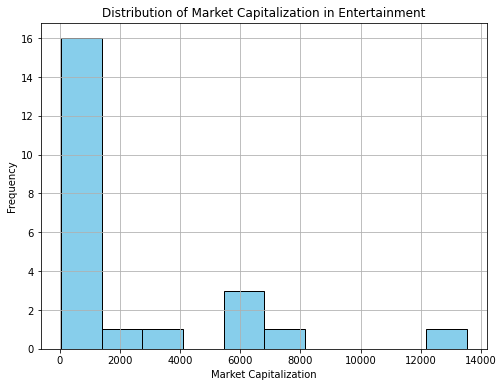

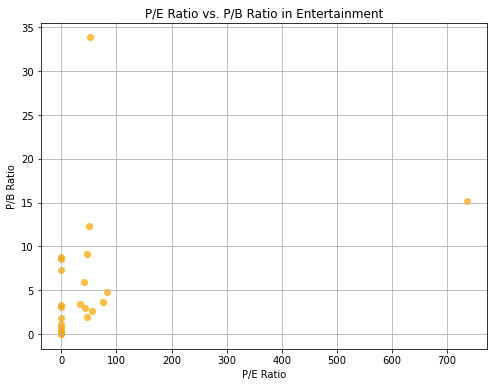

Industry Analysis: Financial Services
          market_cap     pe_ratio   pb_ratio  div_yield    book_value  \
count      44.000000    44.000000  44.000000  44.000000     44.000000   
mean    27997.726364   182.739773   3.405682   1.406591    466.617714   
std     59897.684158   838.387075   4.424549   5.706968   1630.975327   
min        70.860000     0.000000   0.000000   0.000000   -339.749945   
25%       162.522500     8.982500   1.347500   0.000000     19.670809   
50%       677.790000    18.400000   1.885000   0.060000     79.121998   
75%     15211.722500    32.580000   3.490000   0.995000    198.719966   
max    251377.240000  5439.000000  22.730000  37.980000  10064.545454   

              eps        roe  
count   44.000000  44.000000  
mean    34.134545   9.328068  
std    123.198130   8.606399  
min    -89.760000 -16.246500  
25%      0.517500   5.532450  
50%      6.090000   8.503850  
75%     22.705000  13.634700  
max    627.370000  31.525600  



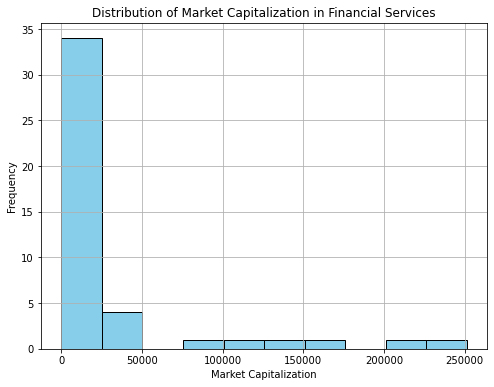

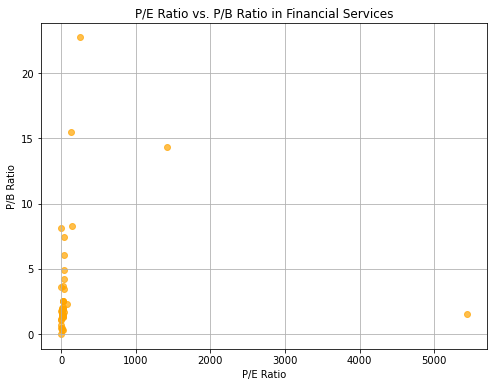

Industry Analysis: Food Products
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     138.000000  138.000000  138.000000  138.000000   138.000000   
mean     6490.564130   39.373696    4.869130    0.393986   185.739915   
std     25591.137933   68.865639    8.538153    0.602976   426.616353   
min        36.810000    0.000000    0.000000    0.000000  -192.054589   
25%       187.345000    0.267500    1.155000    0.000000    20.012533   
50%       473.100000   14.970000    2.275000    0.065000    63.689706   
75%      2540.415000   42.330000    5.377500    0.540000   174.926474   
max    239843.740000  533.380000   77.550000    2.950000  4265.833020   

              eps         roe  
count  138.000000  138.000000  
mean    16.202174    7.675980  
std     61.700278   22.034506  
min   -172.080000 -140.686600  
25%     -0.005000    0.666825  
50%      5.740000    9.300300  
75%     16.572500   15.335875  
max    540.230000   96.958000  



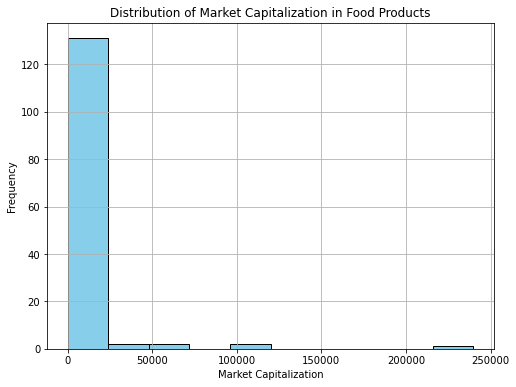

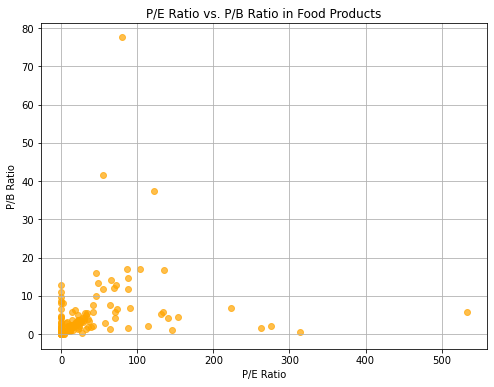

Industry Analysis: Gas Utilities
          market_cap    pe_ratio   pb_ratio  div_yield  book_value  \
count       7.000000    7.000000   7.000000   7.000000    7.000000   
mean    48229.115714   43.427143   7.484286   1.340000  178.697098   
std     47266.165017   63.155257  11.843891   1.157483  144.166054   
min      2314.530000   11.600000   1.650000   0.020000   29.420816   
25%     18152.435000   14.275000   2.300000   0.560000  106.867519   
50%     30775.540000   15.790000   3.210000   1.220000  128.658712   
75%     74123.090000   31.340000   4.360000   2.030000  202.668163   
max    119962.690000  185.370000  34.210000   2.960000  473.728795   

              eps        roe  
count    7.000000   7.000000  
mean    34.248571  17.422171  
std     43.364204   5.319797  
min      5.430000   7.252200  
25%     14.150000  16.466500  
50%     19.670000  17.702600  
75%     27.725000  19.769500  
max    130.890000  24.528400  



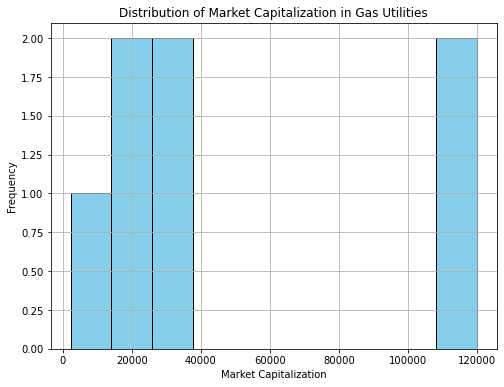

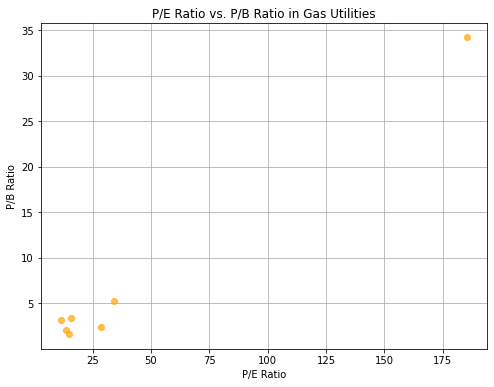

Industry Analysis: Health Care
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     33.000000   33.000000  33.000000  33.000000   33.000000   33.000000   
mean   13028.555152   59.014242   6.998788   0.282121  139.424421   18.570909   
std    22266.234115   74.368832   4.121858   0.572198  140.864061   31.454201   
min       53.510000    0.000000   0.000000   0.000000   -4.075641  -13.120000   
25%     1219.280000   29.720000   4.110000   0.000000   58.351339    1.870000   
50%     3397.860000   48.180000   6.250000   0.160000   99.426886   10.880000   
75%    15157.770000   60.950000  10.920000   0.250000  197.035727   22.430000   
max    94914.410000  424.570000  14.600000   3.010000  713.983912  144.530000   

             roe  
count  33.000000  
mean   10.110145  
std    12.819741  
min   -21.679100  
25%     7.067400  
50%    12.028800  
75%    18.620700  
max    31.294300  



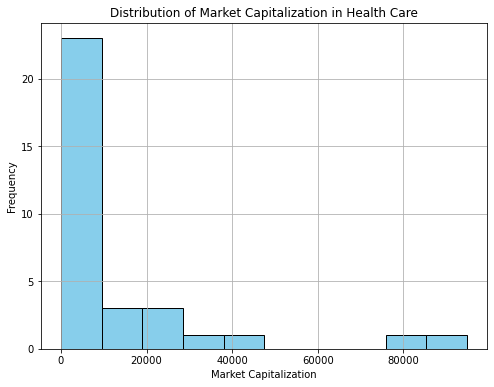

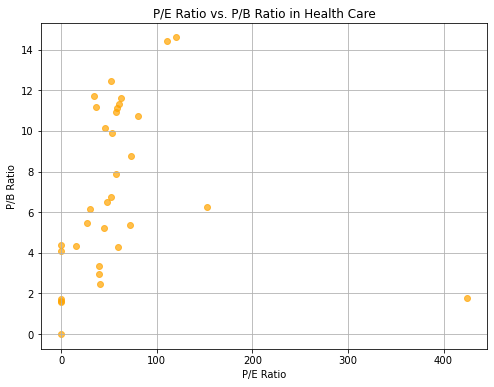

Industry Analysis: Hotels & Leisure
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     40.000000   40.000000  40.000000  40.000000   40.000000   40.000000   
mean    4996.731000   39.263750   5.412250   0.269750   71.101236   11.535000   
std    12651.110398   42.996182   4.201144   0.510733  141.504678   48.553524   
min       84.030000    0.000000   0.000000   0.000000 -146.438869  -98.810000   
25%      268.312500   15.230000   2.035000   0.000000   17.943973    0.672500   
50%      741.715000   28.440000   4.720000   0.000000   41.143828    4.725000   
75%     4074.297500   51.535000   7.275000   0.290000   78.671153    9.600000   
max    76495.250000  235.760000  16.410000   2.150000  848.613846  246.440000   

              roe  
count   40.000000  
mean     6.532578  
std     33.239829  
min   -166.981700  
25%      3.402400  
50%     13.043050  
75%     17.657975  
max     46.007000  



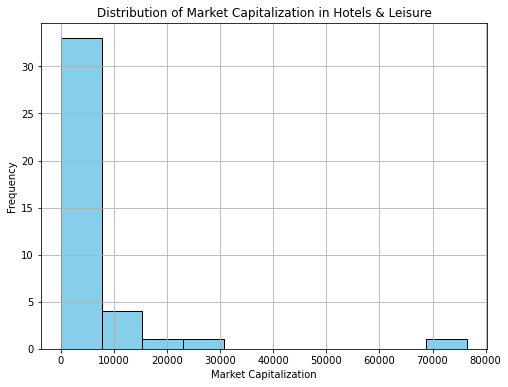

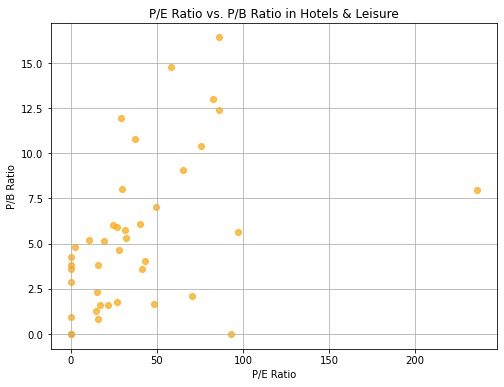

Industry Analysis: Household Durables
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     35.000000   35.000000  35.000000  35.000000   35.000000   35.000000   
mean    5460.027429   62.321143   7.069714   0.471429  133.056384   15.204000   
std     7963.692351   52.589287   9.034644   1.263006  140.821388   34.014014   
min      106.880000    0.000000   0.000000   0.000000  -34.758712  -46.190000   
25%      365.720000   31.745000   3.545000   0.000000   36.982559    3.560000   
50%     1608.130000   53.960000   4.730000   0.000000   94.430140    7.710000   
75%     7790.275000   79.115000   6.735000   0.475000  189.038802   16.285000   
max    38160.820000  246.750000  51.300000   7.260000  580.553763  186.220000   

             roe  
count  35.000000  
mean    9.108100  
std     9.515928  
min   -17.574900  
25%     5.307900  
50%     8.017500  
75%    15.024700  
max    34.705200  



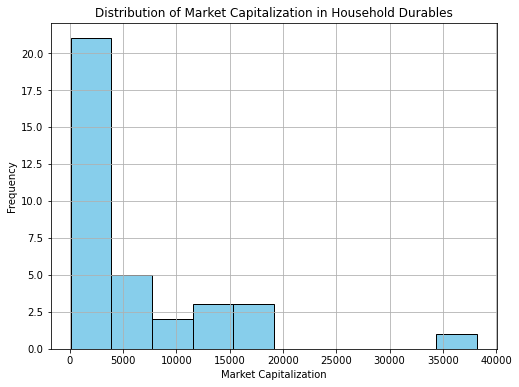

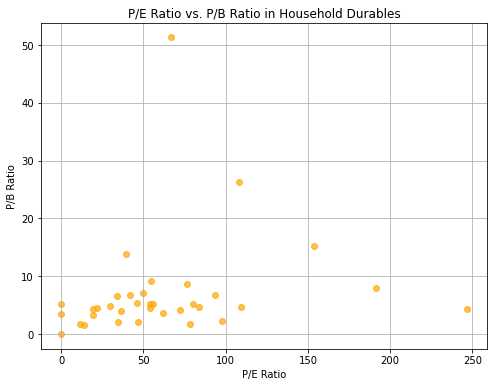

Industry Analysis: Household Products
         market_cap    pe_ratio   pb_ratio  div_yield  book_value       eps  \
count      4.000000    4.000000   4.000000   4.000000    4.000000   4.00000   
mean    5346.312500  236.642500   7.342500   0.270000   57.888002  12.58750   
std     8058.467098  393.907258   3.001515   0.322284   52.979585  15.22891   
min      120.380000   13.110000   3.460000   0.000000    4.886867   0.05000   
25%     1071.087500   40.410000   6.017500   0.000000   34.702155   4.58750   
50%     1960.805000   53.330000   7.665000   0.220000   47.697288   7.82000   
75%     6236.030000  249.562500   8.990000   0.490000   70.883134  15.82000   
max    17343.260000  826.800000  10.580000   0.640000  131.270566  34.66000   

             roe  
count   4.000000  
mean   13.126350  
std     9.254469  
min     0.807600  
25%     8.609100  
50%    15.574650  
75%    20.091900  
max    20.548500  



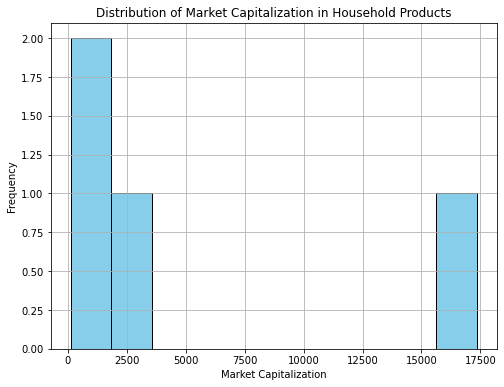

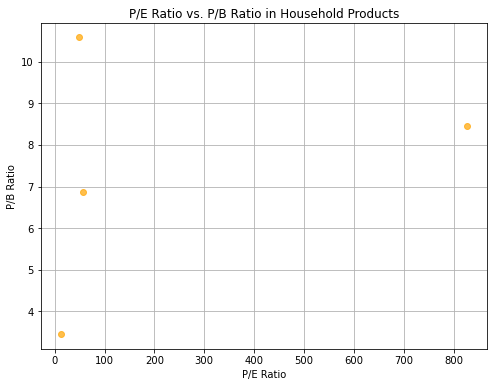

Industry Analysis: IT Services
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count  6.600000e+01   66.000000  66.000000  66.000000    66.000000   
mean   5.534022e+04   58.881515   8.495909   0.578939   139.484852   
std    2.121257e+05  130.980096   9.891709   0.852261   243.824142   
min    7.926000e+01    0.000000   0.000000   0.000000  -391.681392   
25%    3.457275e+02   17.075000   2.810000   0.000000    20.303469   
50%    9.757450e+02   32.255000   5.585000   0.180000    66.733602   
75%    6.826530e+03   55.150000  10.065000   0.910000   162.608683   
max    1.510895e+06  987.080000  49.710000   3.830000  1575.598771   

              eps         roe  
count   66.000000   66.000000  
mean    21.499697   15.329929  
std     47.728416   37.568922  
min   -207.030000 -152.812900  
25%      0.885000    4.509400  
50%      8.190000   14.625950  
75%     28.535000   24.547400  
max    155.180000  174.374900  



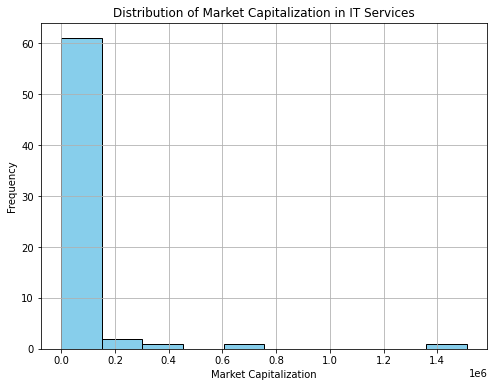

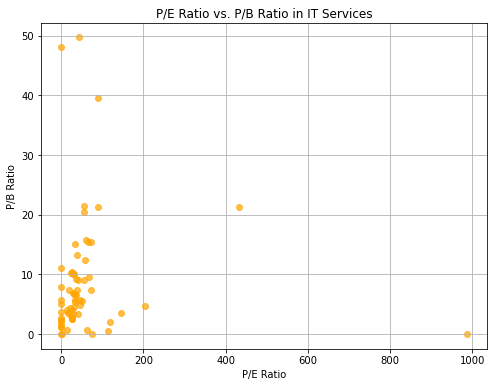

Industry Analysis: Industrial Conglomerates
          market_cap   pe_ratio   pb_ratio  div_yield   book_value  \
count      11.000000  11.000000  11.000000  11.000000    11.000000   
mean    23938.020000  22.567273   5.405455   1.150909   392.031420   
std     45703.425782  27.551131   6.147893   1.671529   490.978146   
min       156.180000   0.000000   0.000000   0.000000    -6.836282   
25%       877.845000   0.000000   1.100000   0.000000    55.203199   
50%      6077.580000   9.960000   2.610000   0.230000   244.263001   
75%     25923.350000  35.055000   9.155000   1.955000   483.031014   
max    156578.950000  78.150000  18.920000   4.940000  1632.969122   

              eps        roe  
count   11.000000  11.000000  
mean    81.116364  10.404227  
std    147.843146  19.282485  
min    -16.300000 -35.504700  
25%     -1.435000   4.954350  
50%     19.950000  12.167600  
75%     67.440000  22.050200  
max    484.720000  31.824400  



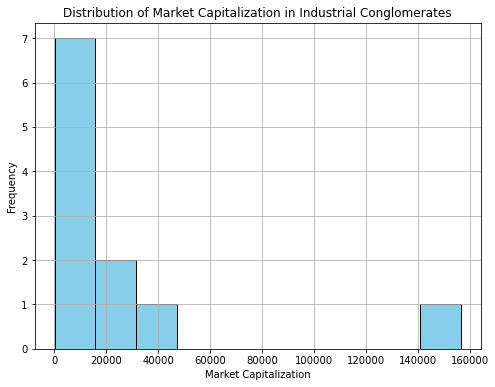

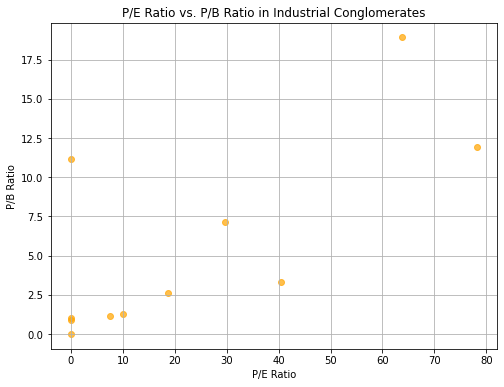

Industry Analysis: Insurance
          market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count      12.000000  12.000000  12.000000  12.000000   12.000000   12.000000   
mean   110715.914167  40.660833   5.974167   0.322500   85.016283   21.665833   
std    177857.992596  34.197684   3.606936   0.491641  181.803224   39.060989   
min       297.690000   0.000000   0.000000   0.000000 -454.748171  -52.700000   
25%     33182.370000   8.750000   3.097500   0.000000   74.178288    6.160000   
50%     60515.500000  42.115000   6.800000   0.145000  111.719265   13.105000   
75%     92598.717500  78.630000   8.937500   0.392500  149.301055   37.715000   
max    657420.260000  83.540000  10.590000   1.690000  272.309108  108.870000   

             roe  
count  12.000000  
mean    6.655025  
std     6.587927  
min    -2.265500  
25%     0.000000  
50%     8.677050  
75%    12.176175  
max    15.696300  



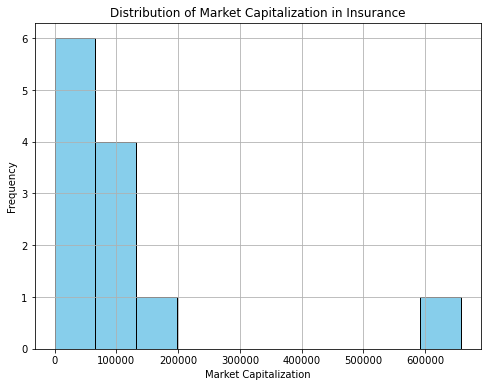

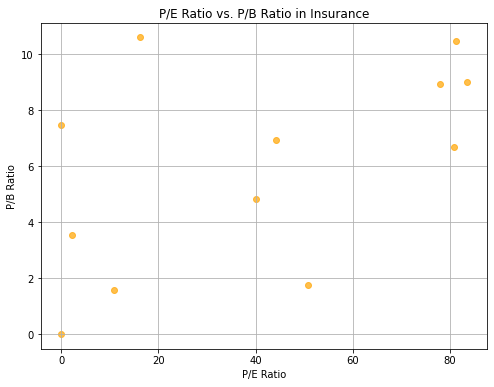

Industry Analysis: Leisure Products
       market_cap  pe_ratio  pb_ratio  div_yield  book_value   eps     roe
count        1.00      1.00      1.00        1.0    1.000000  1.00  1.0000
mean       120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
std           NaN       NaN       NaN        NaN         NaN   NaN     NaN
min        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
25%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
50%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
75%        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463
max        120.39     50.95      2.52        0.0  114.833894  5.68  3.6463



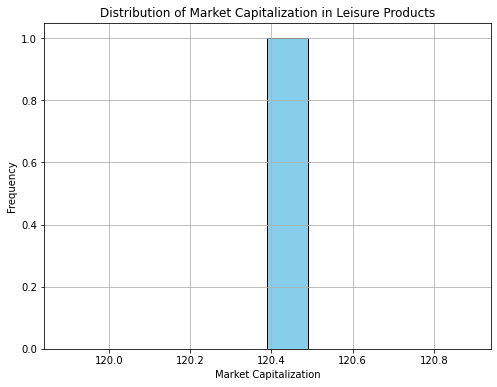

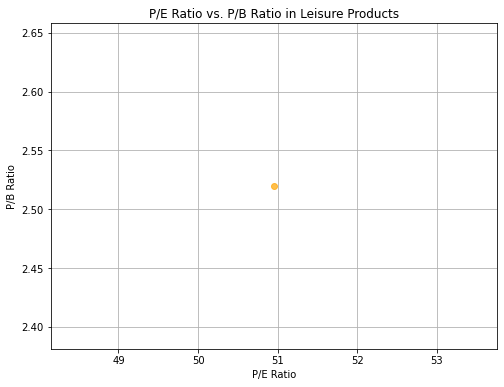

Industry Analysis: Life Sciences
         market_cap   pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     11.000000  11.000000  11.000000  11.000000   11.000000  11.000000   
mean   13054.280000  24.470909   4.160909   0.197273  148.595512  11.046364   
std    29830.238261  26.411933   2.500730   0.322183  148.598865  17.576516   
min       88.040000   0.000000   0.560000   0.000000   15.518966  -9.840000   
25%      707.260000   0.000000   2.170000   0.000000   36.053695  -3.360000   
50%     2332.300000  20.080000   4.100000   0.000000  111.109487  10.390000   
75%     3125.240000  41.900000   5.705000   0.290000  166.984235  16.565000   
max    98972.000000  71.560000   7.890000   0.800000  477.536502  52.100000   

             roe  
count  11.000000  
mean    0.744964  
std    16.764841  
min   -34.137500  
25%    -8.497150  
50%    10.375700  
75%    12.017650  
max    19.903400  



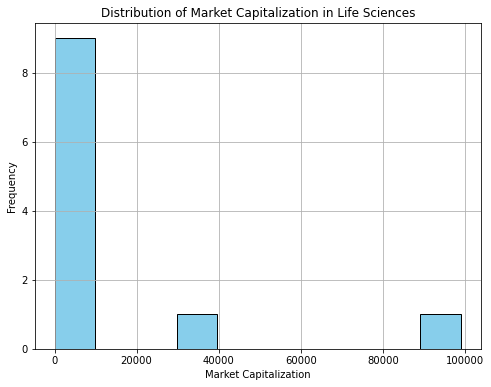

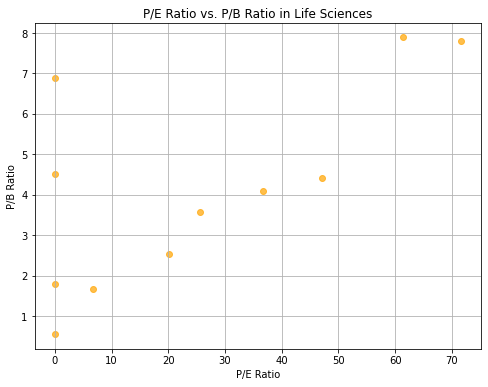

Industry Analysis: Machinery
         market_cap    pe_ratio   pb_ratio   div_yield   book_value  \
count    142.000000  142.000000  142.00000  142.000000   142.000000   
mean    5187.366690   36.342113    6.02162    0.437817   241.756854   
std    10495.599106   24.568627    4.31922    0.637030   353.184296   
min       79.080000    0.000000    0.00000    0.000000  -311.166500   
25%      271.597500   20.957500    2.77500    0.000000    40.468970   
50%      998.215000   31.155000    5.29000    0.205000   122.541047   
75%     4878.852500   50.190000    8.95000    0.652500   289.970427   
max    72561.260000  133.290000   26.69000    3.860000  2373.118974   

              eps         roe  
count  142.000000  142.000000  
mean    39.590423   14.338269  
std     67.539273   17.790310  
min    -38.620000 -118.253700  
25%      4.755000    8.503325  
50%     19.235000   15.196100  
75%     50.385000   20.534000  
max    494.210000   88.744100  



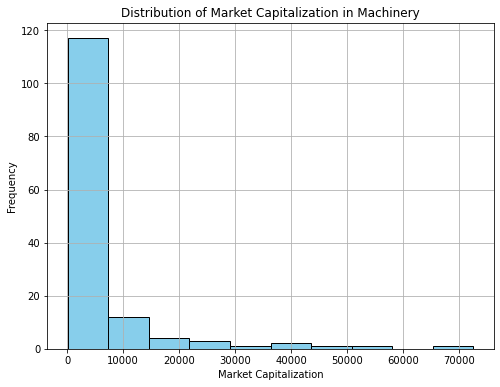

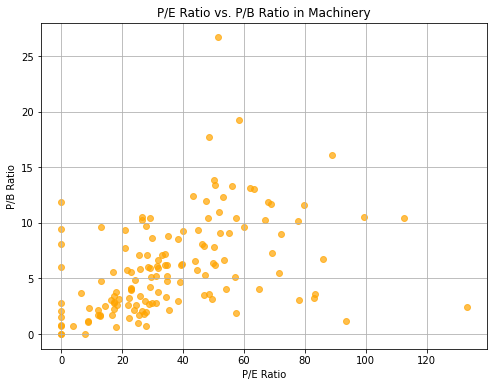

Industry Analysis: Marine
         market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count      4.000000   4.000000  4.000000   4.000000    4.000000   4.000000   
mean    3529.375000  22.517500  1.910000   0.485000  147.447546   0.900000   
std     4785.567631  19.072623  1.880869   0.532572  150.469769  13.204355   
min      607.520000   0.000000  0.700000   0.000000   21.021910 -16.090000   
25%      636.687500  10.590000  0.752500   0.142500   49.282333  -3.107500   
50%     1447.200000  23.930000  1.130000   0.365000  105.736596   1.775000   
75%     4339.887500  35.857500  2.287500   0.707500  203.901808   5.782500   
max    10615.580000  42.210000  4.680000   1.210000  357.295082  16.140000   

             roe  
count   4.000000  
mean    8.271175  
std     7.286764  
min     0.688700  
25%     2.958575  
50%     8.068050  
75%    13.380650  
max    16.259900  



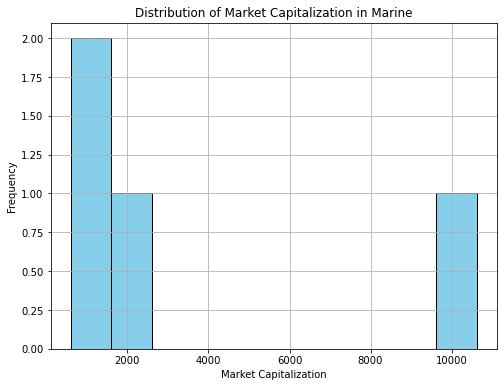

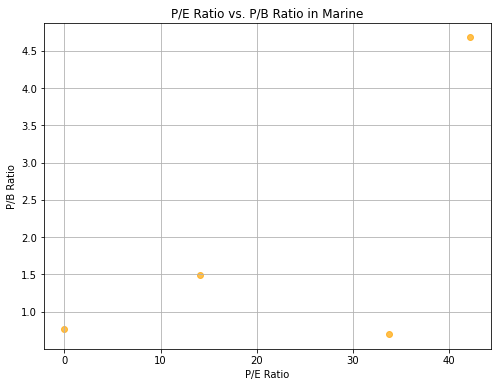

Industry Analysis: Media
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count     32.000000   32.000000  32.000000  32.000000    32.000000   
mean    3986.539375   59.720000   3.163438   1.476875   129.928277   
std     5816.470816   81.976699   3.280557   4.747052   255.276284   
min       89.250000    0.000000   0.000000   0.000000    -4.151938   
25%      786.470000    6.475000   1.005000   0.000000    22.912889   
50%     1625.720000   24.985000   1.925000   0.095000    75.672643   
75%     3835.492500   70.445000   3.865000   1.412500   128.286706   
max    24608.610000  265.270000  13.380000  26.960000  1466.591414   

              eps        roe  
count   32.000000  32.000000  
mean    12.673125   4.048028  
std     32.331166  11.600152  
min     -9.220000 -29.501900  
25%      0.187500   0.359100  
50%      3.960000   5.594050  
75%      8.537500   9.803250  
max    168.690000  26.993600  



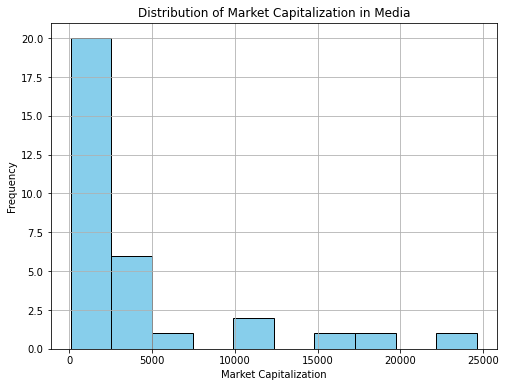

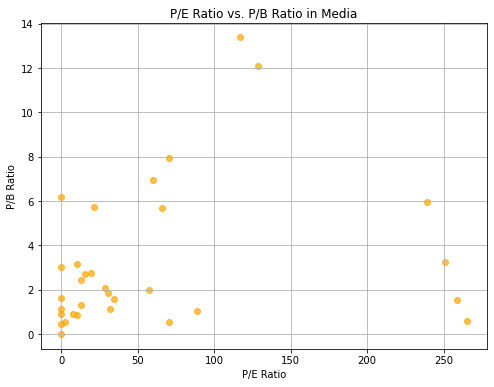

Industry Analysis: Media & Services
         market_cap    pe_ratio  pb_ratio  div_yield   book_value        eps  \
count      4.000000    4.000000  4.000000   4.000000     4.000000   4.000000   
mean   19180.805000   81.700000  2.395000   0.335000   523.106935  19.825000   
std    32823.213603  133.840987  1.861872   0.462277   693.546052  16.122424   
min      132.320000    0.000000  0.000000   0.000000    -0.907862  -0.410000   
25%      881.367500   16.492500  1.432500   0.000000    90.381849  13.922500   
50%     4201.765000   22.485000  2.685000   0.180000   284.845481  20.405000   
75%    22501.202500   87.692500  3.647500   0.515000   717.570567  26.307500   
max    68187.370000  281.830000  4.210000   0.980000  1523.644642  38.900000   

             roe  
count   4.000000  
mean   14.730825  
std    12.426211  
min     1.908900  
25%     6.649350  
50%    13.355700  
75%    21.437175  
max    30.303000  



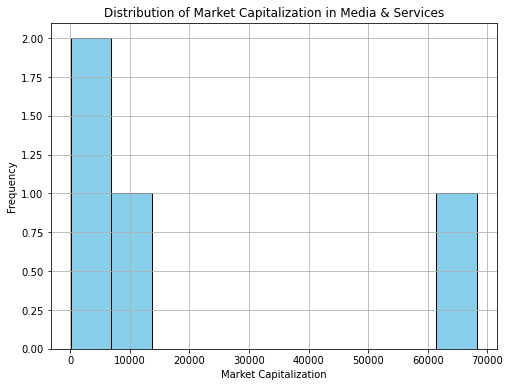

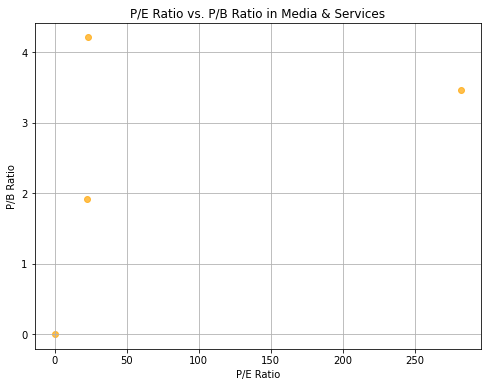

Industry Analysis: Metals & Mining
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     138.000000  138.000000  138.000000  138.000000   138.000000   
mean    10781.884493   30.616232    4.114493    0.816594   142.042061   
std     29723.993354   67.110111    5.133991    3.831395   386.114195   
min        92.440000    0.000000    0.000000    0.000000  -777.353563   
25%       249.525000   10.897500    1.770000    0.000000    22.461591   
50%      1281.455000   20.370000    2.780000    0.080000    69.534288   
75%      5136.472500   29.692500    4.620000    0.517500   161.536711   
max    200649.500000  711.450000   43.660000   38.060000  4100.850228   

              eps         roe  
count  138.000000  138.000000  
mean    20.504565   10.819543  
std     36.690624   21.014552  
min   -131.550000  -83.175800  
25%      1.622500    5.520100  
50%     11.035000   11.290900  
75%     28.302500   18.353500  
max    200.010000   84.370000  



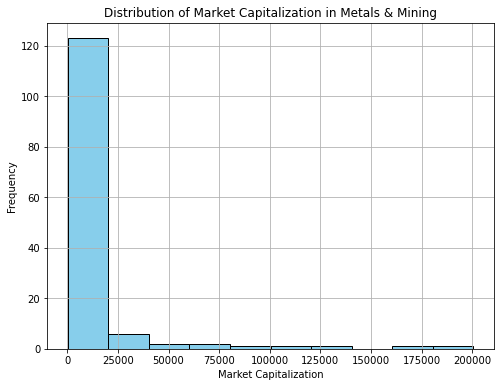

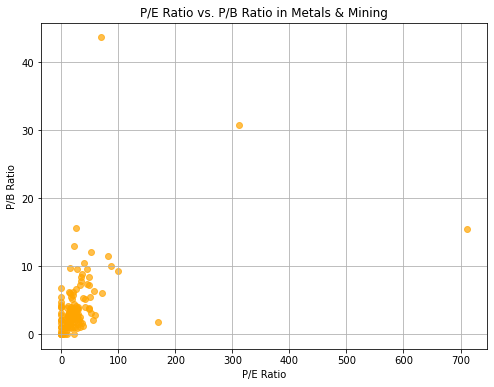

Industry Analysis: Oil, Gas & Fuels
         market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count  2.000000e+01   20.000000  20.000000  20.000000    20.000000   
mean   1.656346e+05   17.537000   2.688000   1.448000   240.451715   
std    4.394321e+05   24.544121   2.526422   1.706889   292.914982   
min    9.288000e+01    0.000000   0.000000   0.000000  -130.210894   
25%    1.859610e+03    4.867500   1.572500   0.000000    78.838485   
50%    1.478104e+04    9.865000   2.030000   0.455000   150.689277   
75%    9.568006e+04   18.335000   2.857500   2.887500   320.057758   
max    1.976493e+06  104.960000  11.910000   5.050000  1110.341197   

              eps        roe  
count   20.000000  20.000000  
mean    51.095000  20.963605  
std     63.223488  14.409692  
min    -39.640000  -3.083300  
25%     14.880000  12.751125  
50%     26.035000  19.896150  
75%     66.917500  33.028400  
max    210.190000  48.413400  



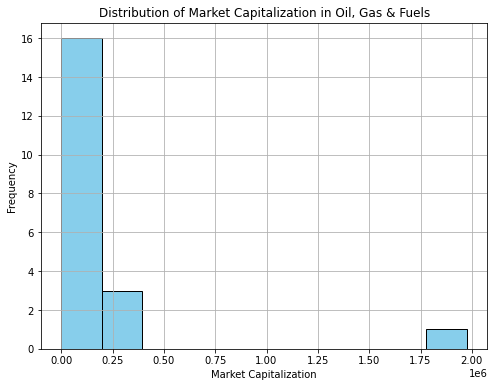

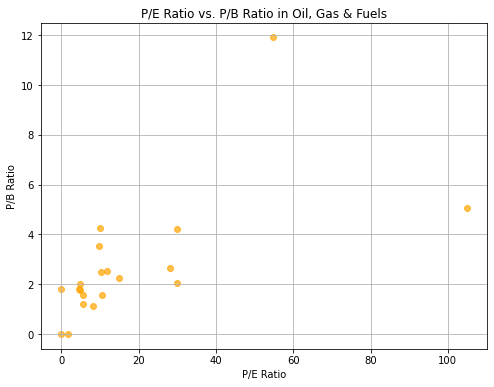

Industry Analysis: Packaging
        market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count    36.000000   36.000000  36.000000  36.000000   36.000000   36.000000   
mean   1325.772222   26.086667   2.402500   0.505278  201.940934   17.740278   
std    1746.843840   36.955466   1.509324   0.575954  267.711018   32.063087   
min     105.200000    0.000000   0.000000   0.000000  -94.478125  -58.050000   
25%     209.942500   13.732500   1.210000   0.000000   58.785722    3.040000   
50%     479.945000   18.630000   2.205000   0.420000   94.040763    8.995000   
75%    1913.765000   29.852500   3.127500   0.685000  205.935291   24.710000   
max    6125.610000  226.730000   5.630000   2.390000  999.101233  106.210000   

              roe  
count   36.000000  
mean    11.582900  
std     18.588318  
min    -19.276900  
25%      5.332050  
50%      9.774350  
75%     12.709600  
max    109.755100  



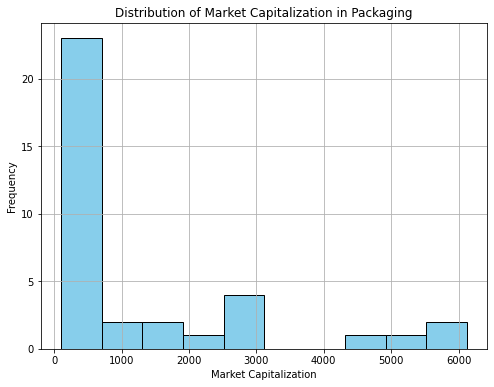

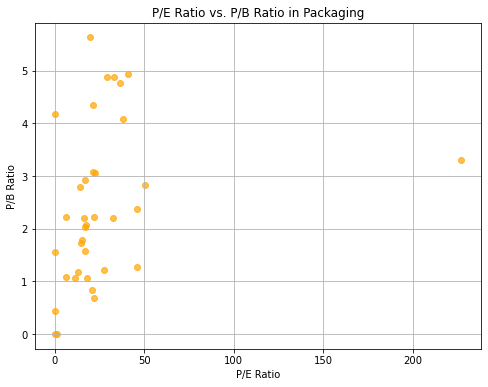

Industry Analysis: Paper & Wood Prods
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     33.000000   33.000000  33.000000  33.000000   33.000000   33.000000   
mean    2054.753939   26.203939   2.265455   0.745455  136.917280   19.958788   
std     3945.788139   41.464963   2.615908   0.999544  133.305301   33.084470   
min       67.060000    0.000000   0.000000   0.000000   -7.449647  -11.200000   
25%      191.320000    4.660000   0.930000   0.000000   44.507109    0.400000   
50%      396.030000    6.930000   1.330000   0.160000   93.327735    6.520000   
75%     1926.810000   29.170000   2.660000   1.740000  250.590593   21.800000   
max    16627.430000  207.820000  13.230000   3.810000  448.416442  128.760000   

             roe  
count  33.000000  
mean    9.566991  
std    20.981461  
min   -70.979200  
25%     0.738800  
50%     9.506800  
75%    21.126600  
max    63.083800  



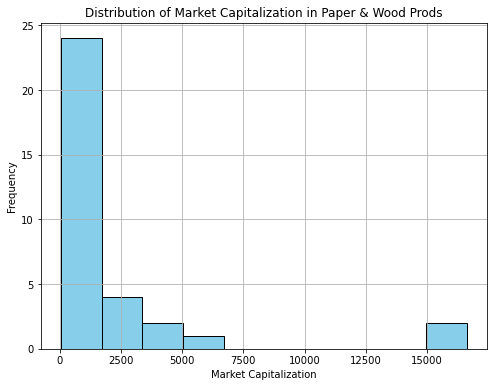

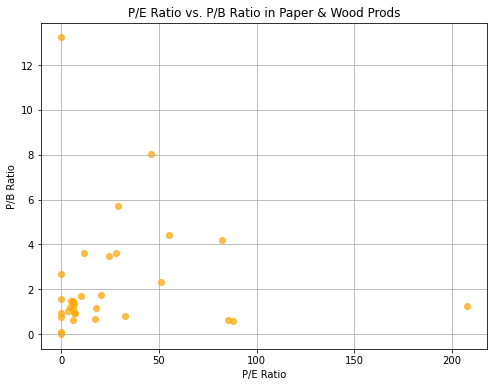

Industry Analysis: Personal Products
          market_cap    pe_ratio   pb_ratio  div_yield   book_value  \
count      15.000000   15.000000  15.000000  15.000000    15.000000   
mean    64562.988667   44.298000  13.985333   0.769333   192.367440   
std    142208.471611   36.575776  13.912571   0.804785   361.060682   
min       113.130000    0.000000   1.080000   0.000000     1.088212   
25%       528.845000   14.795000   6.090000   0.000000    30.880267   
50%     14332.210000   53.790000  10.170000   0.680000    56.175957   
75%     61700.880000   63.165000  14.305000   1.390000   178.062027   
max    558039.670000  113.050000  50.660000   2.370000  1441.160584   

              eps        roe  
count   15.000000  15.000000  
mean    39.765333  24.295907  
std     63.343426  22.306375  
min     -2.450000   0.189100  
25%      3.390000   9.676800  
50%     16.330000  18.505500  
75%     45.125000  33.475650  
max    232.850000  71.814700  



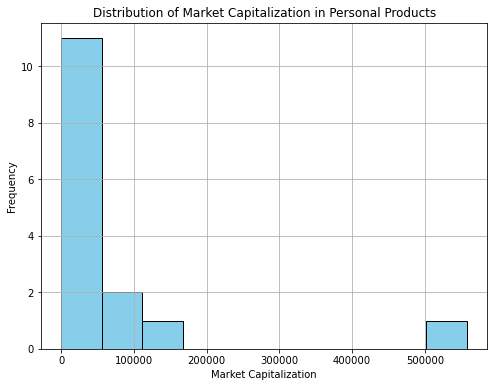

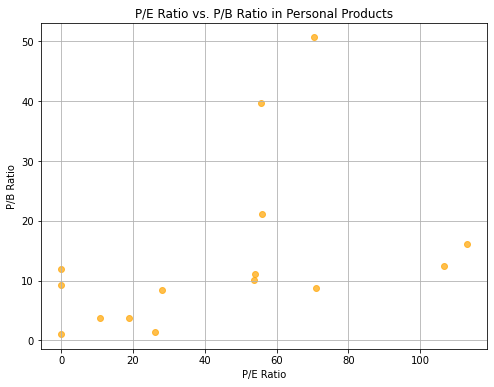

Industry Analysis: Pharmaceuticals
          market_cap    pe_ratio    pb_ratio   div_yield   book_value  \
count     123.000000  123.000000  123.000000  123.000000   123.000000   
mean    13721.687805   41.608699   10.042683    0.450244   185.057102   
std     38862.212893   62.943940   40.830056    0.879987   245.143005   
min        40.630000    0.000000    0.000000    0.000000  -131.643393   
25%       334.305000   14.565000    2.430000    0.000000    43.191331   
50%      1305.300000   31.000000    3.870000    0.180000    95.835417   
75%     10303.795000   46.615000    6.350000    0.655000   245.850416   
max    362407.550000  558.750000  441.880000    6.430000  1528.499312   

             eps          roe  
count  123.00000   123.000000  
mean    27.23374    -0.255031  
std     67.83090   431.235999  
min    -84.46000 -3831.475200  
25%      1.86500     5.292650  
50%      9.18000    11.900100  
75%     29.70500    17.183750  
max    539.10000  2815.413700  



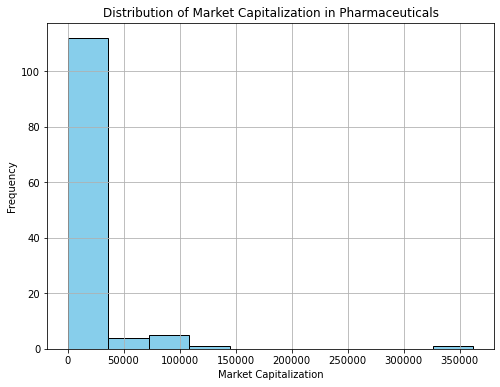

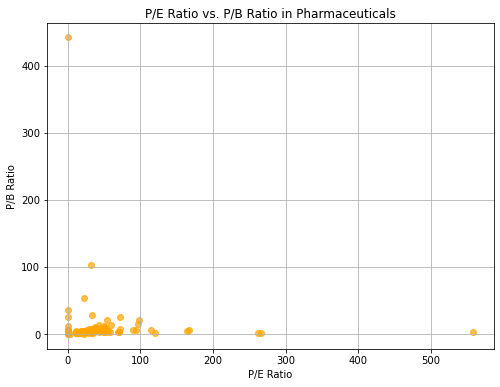

Industry Analysis: Professional Services
        market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     10.00000  10.000000  10.000000  10.000000   10.000000   10.000000   
mean   10392.54900  35.521000   5.784000   0.682000  148.960292   24.995000   
std    17610.07288  21.275471   3.390163   0.947661  164.547419   39.417195   
min       82.21000   0.000000   1.670000   0.000000   12.022149   -4.240000   
25%      235.67000  19.235000   2.782500   0.000000   63.373002    7.290000   
50%     4654.21500  36.900000   6.755000   0.120000   75.004648    8.195000   
75%     9769.89250  47.737500   7.602500   1.300000  163.414064   18.047500   
max    57693.29000  71.440000  12.050000   2.710000  453.044566  123.250000   

             roe  
count  10.000000  
mean    8.906970  
std    19.211701  
min   -43.734600  
25%    10.931050  
50%    13.185950  
75%    16.154175  
max    26.381300  



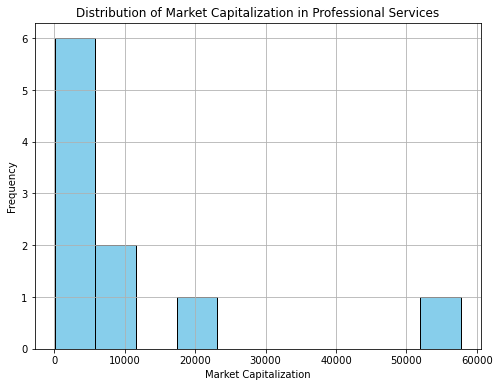

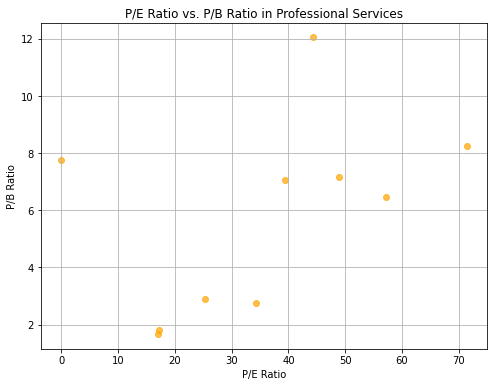

Industry Analysis: Restaurants
          market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      13.000000   13.000000  13.000000  13.000000   13.000000  13.000000   
mean    17234.050769   65.172308   9.732308   0.177692   88.078055   7.280769   
std     37596.461735   60.056364   7.285308   0.310461  135.694101  14.369082   
min        91.180000    0.000000   0.470000   0.000000    2.300484  -6.180000   
25%       638.970000   14.570000   4.900000   0.000000   14.125083   0.530000   
50%      2459.700000   46.900000   6.650000   0.000000   31.632905   1.750000   
75%     12876.430000  106.590000  15.670000   0.240000   97.939800   5.680000   
max    138206.010000  165.360000  22.860000   0.990000  491.138671  43.790000   

             roe  
count  13.000000  
mean    7.810815  
std    16.237680  
min   -29.987800  
25%    -2.520500  
50%    11.259900  
75%    19.114400  
max    29.341200  



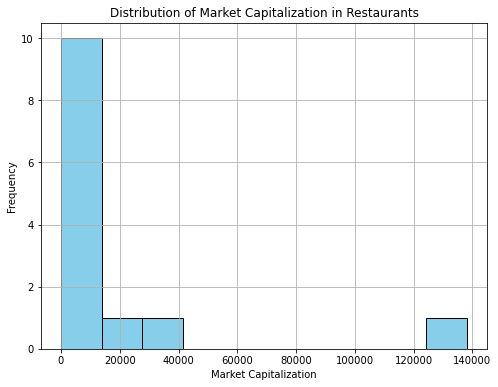

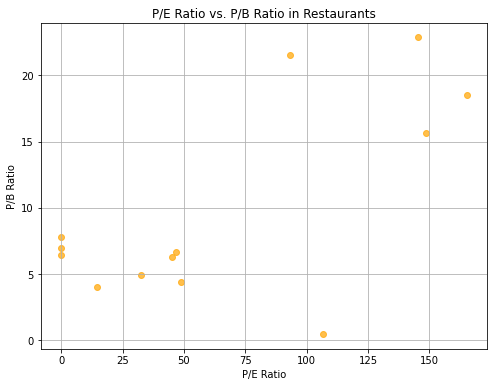

Industry Analysis: Road & Rail
       market_cap  pe_ratio  pb_ratio  div_yield  book_value    eps     roe
count        1.00       1.0      1.00       1.00    1.000000   1.00   1.000
mean     59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
std           NaN       NaN       NaN        NaN         NaN    NaN     NaN
min      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
25%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
50%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
75%      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225
max      59674.29      48.8      5.14       1.12  190.407431  20.07  10.225



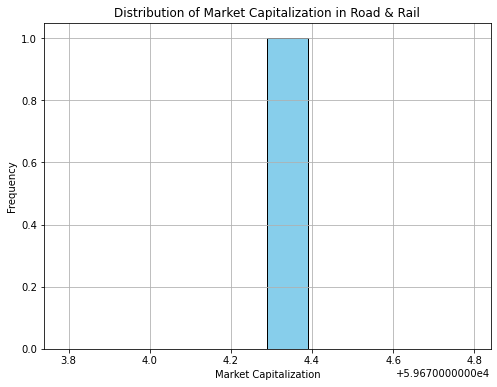

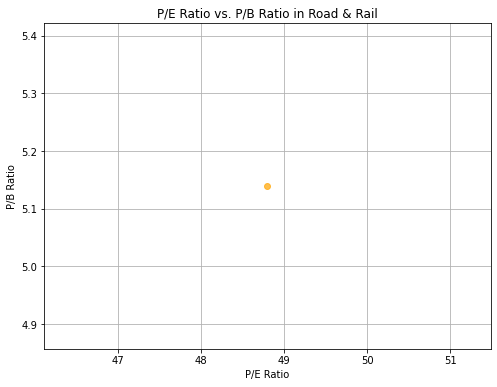

Industry Analysis: Semiconductors
        market_cap    pe_ratio   pb_ratio  div_yield  book_value        eps  \
count     7.000000    7.000000   7.000000   7.000000    7.000000   7.000000   
mean   1843.634286  201.322857   9.607143   0.022857   29.978619  -1.292857   
std    2556.842715  278.400788   4.700120   0.060474   29.596558   7.312539   
min     159.130000    0.000000   2.830000   0.000000    3.283120 -16.340000   
25%     528.755000    0.000000   7.755000   0.000000    6.162700  -0.980000   
50%    1036.150000   91.750000   8.040000   0.000000   11.424382   0.050000   
75%    1574.810000  324.570000  11.900000   0.000000   55.582027   0.685000   
max    7503.030000  668.370000  17.070000   0.160000   71.653379   7.830000   

             roe  
count   7.000000  
mean    1.857629  
std     8.138600  
min   -10.735900  
25%    -0.704650  
50%     1.233200  
75%     3.909100  
max    16.097200  



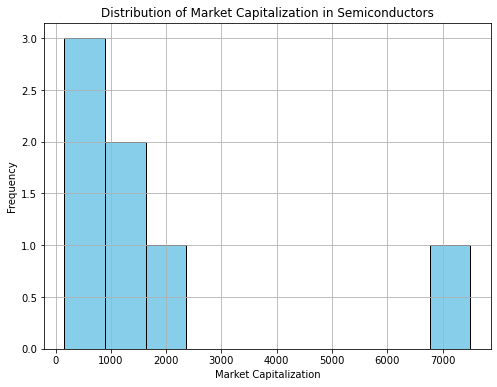

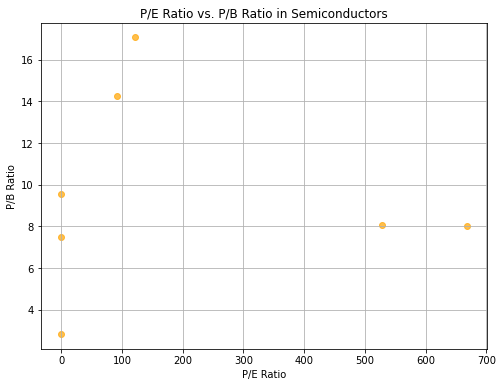

Industry Analysis: Software
         market_cap    pe_ratio   pb_ratio  div_yield  book_value         eps  \
count     46.000000   46.000000  46.000000  46.000000   46.000000   46.000000   
mean    6242.437609   54.671957   5.862174   0.355652  120.062400   17.841957   
std    13835.317392  110.461241   5.632319   0.569451  166.127276   45.007243   
min       76.850000    0.000000   0.640000   0.000000    1.147663  -74.810000   
25%      280.515000   14.805000   2.180000   0.000000   18.720951    0.467500   
50%      813.145000   27.005000   3.580000   0.000000   66.921382    4.225000   
75%     3546.090000   58.392500   8.017500   0.485000  116.835221   19.880000   
max    68676.590000  726.640000  24.660000   2.830000  749.797624  246.830000   

              roe  
count   46.000000  
mean    -0.234137  
std     60.975994  
min   -387.669600  
25%      2.806650  
50%      9.510650  
75%     17.017100  
max     37.459000  



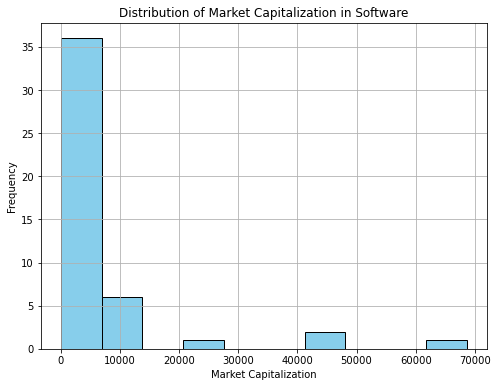

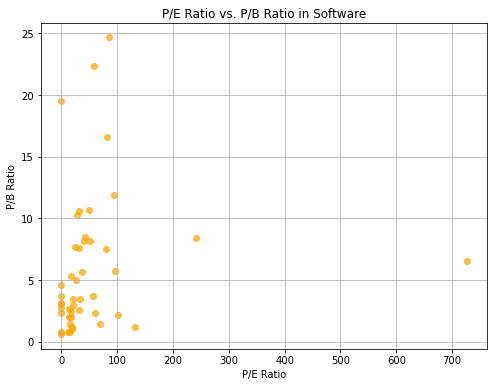

Industry Analysis: Specialty Retail
          market_cap     pe_ratio   pb_ratio  div_yield   book_value  \
count      33.000000    33.000000  33.000000  33.000000    33.000000   
mean     9515.013030   110.142424   9.250303   0.219091   176.731419   
std     25681.645394   267.011399  11.000944   0.435448   434.733885   
min        53.670000     0.000000   0.000000   0.000000  -100.426529   
25%       773.070000    20.900000   2.720000   0.000000    33.324156   
50%      1864.570000    44.090000   5.800000   0.000000    69.796663   
75%      6087.200000    78.720000   8.390000   0.220000   127.303577   
max    142969.950000  1511.000000  49.070000   1.940000  2498.877778   

              eps         roe  
count   33.000000   33.000000  
mean     9.100606   -4.857006  
std     26.319942  105.894047  
min   -105.810000 -587.551900  
25%      2.250000    2.680200  
50%      6.020000   10.581000  
75%     16.900000   21.210300  
max     63.180000   74.055400  



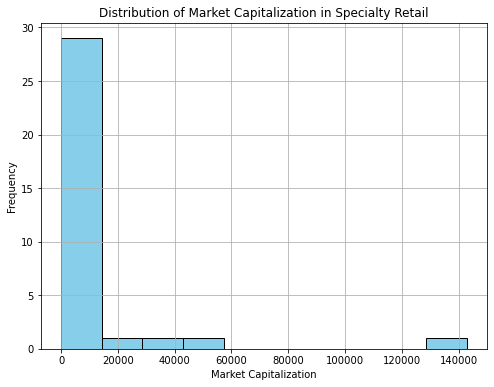

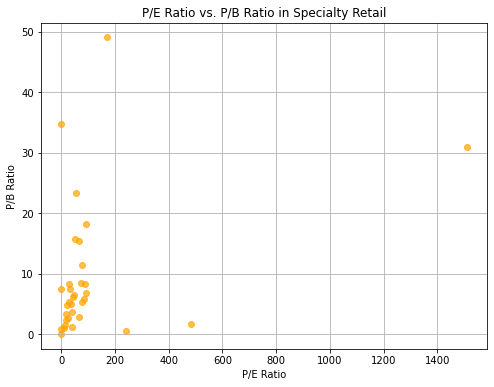

Industry Analysis: Tech Hardware
         market_cap     pe_ratio   pb_ratio  div_yield   book_value  \
count     51.000000    51.000000  51.000000  51.000000    51.000000   
mean    3843.628824   101.101569   6.204118   0.312549   202.520443   
std     7017.044959   254.327701   5.668126   0.739399   658.522692   
min       69.040000     0.000000   0.000000   0.000000    -7.730265   
25%      182.510000     6.470000   2.025000   0.000000    18.784585   
50%      760.280000    46.120000   4.960000   0.000000    48.847784   
75%     4099.660000    75.895000   7.730000   0.265000   104.672993   
max    33939.320000  1726.500000  22.030000   3.650000  3772.556561   

              eps        roe  
count   51.000000  51.000000  
mean    22.993529   6.772835  
std     80.403220  20.807462  
min    -13.330000 -65.857600  
25%      0.045000  -0.051550  
50%      2.610000   7.417100  
75%     12.295000  15.605050  
max    526.280000  84.376100  



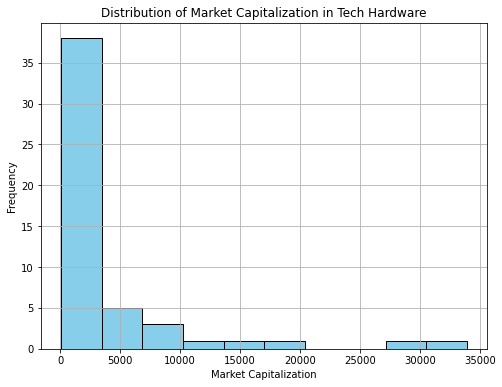

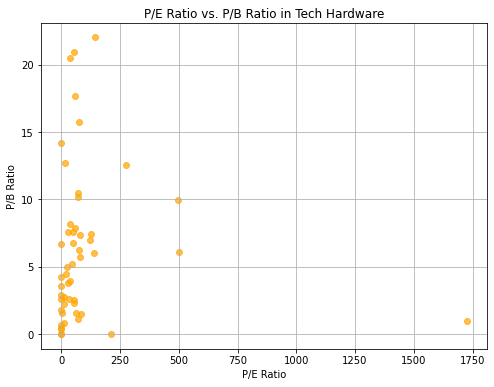

Industry Analysis: Telecom Services
          market_cap   pe_ratio   pb_ratio  div_yield  book_value        eps  \
count      11.000000  11.000000  11.000000  11.000000   11.000000  11.000000   
mean    81572.868182  22.235455   5.200000   0.214545  -39.927364  -1.183636   
std    193064.579454  29.571600  10.497247   0.379457  152.028590  22.800294   
min       150.620000   0.000000   0.000000   0.000000 -353.148730 -51.310000   
25%      2780.720000   0.000000   0.000000   0.000000  -68.884362  -6.140000   
50%     14352.020000   0.000000   0.000000   0.000000   -3.652215  -0.950000   
75%     55571.620000  51.135000   5.540000   0.265000   52.334617  10.810000   
max    658060.620000  74.960000  35.520000   1.160000  138.362336  34.150000   

             roe  
count  11.000000  
mean   19.858627  
std    25.249359  
min    -0.242500  
25%     7.342000  
50%    14.242800  
75%    17.275250  
max    90.988900  



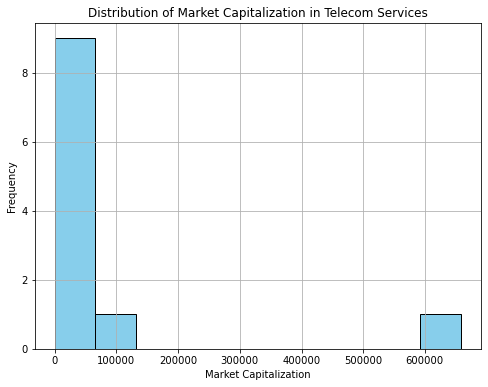

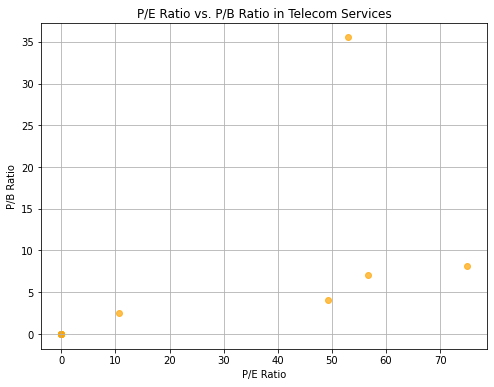

Industry Analysis: Textiles
         market_cap    pe_ratio    pb_ratio   div_yield    book_value  \
count    109.000000  109.000000  109.000000  109.000000    109.000000   
mean    1625.406239   24.190000    3.142844    0.570734    302.767507   
std     3861.675739   37.482981    5.930836    1.355212   1202.781746   
min       57.780000    0.000000    0.000000    0.000000   -133.398013   
25%      167.730000    0.000000    0.840000    0.000000     16.545131   
50%      335.150000   15.320000    1.450000    0.000000     78.047967   
75%      921.860000   30.130000    2.800000    0.520000    192.478167   
max    23013.840000  235.830000   49.930000    9.090000  12173.768678   

              eps          roe  
count  109.000000   109.000000  
mean    10.032018   -12.164194  
std     43.767034   139.781266  
min   -225.210000 -1417.384900  
25%     -1.410000    -0.232900  
50%      2.130000     5.538800  
75%     12.430000    10.310700  
max    240.770000    85.716800  



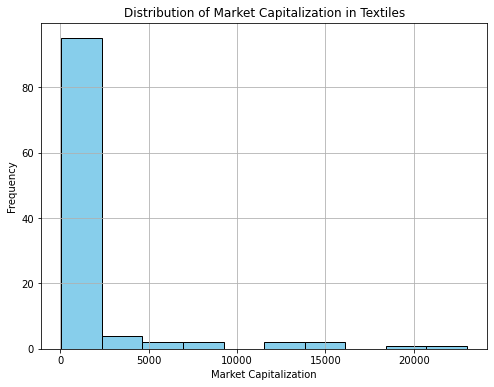

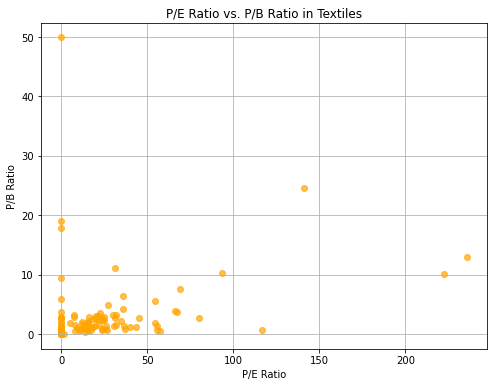

Industry Analysis: Tobacco
          market_cap   pe_ratio  pb_ratio  div_yield  book_value        eps  \
count       4.000000   4.000000  4.000000   4.000000    4.000000    4.00000   
mean   131041.980000  20.822500  4.357500   2.405000  396.034533   90.38500   
std    249424.691852   3.564944  2.463011   1.916533  378.472025   92.42691   
min       145.780000  16.240000  1.500000   0.000000   55.372566    5.47000   
25%      4292.612500  19.150000  3.000000   1.297500   74.944908   13.69750   
50%      9464.980000  21.215000  4.310000   2.770000  399.827775   86.69000   
75%    136214.347500  22.887500  5.667500   3.877500  720.917400  163.37750   
max    505092.180000  24.620000  7.310000   4.080000  729.110016  182.69000   

             roe  
count   4.000000  
mean   21.194875  
std    10.290201  
min     6.673300  
25%    17.552575  
50%    24.447200  
75%    28.089500  
max    29.211800  



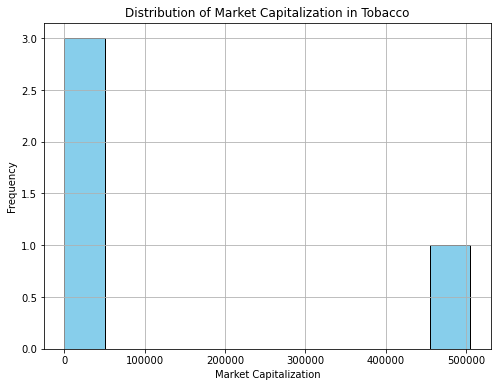

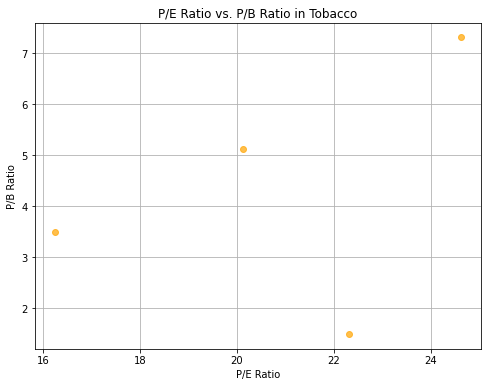

Industry Analysis: Trading Companies
          market_cap    pe_ratio   pb_ratio  div_yield    book_value  \
count      43.000000   43.000000  43.000000  43.000000     43.000000   
mean    10114.272326   45.281860   4.060930   0.577907    998.665520   
std     55879.828296   56.607371   3.437993   1.305641   5520.897942   
min        55.450000    0.000000   0.000000   0.000000   -924.993183   
25%       213.570000   12.460000   0.600000   0.000000     10.993835   
50%       476.230000   29.040000   3.610000   0.040000     55.812342   
75%      1074.455000   50.965000   7.260000   0.470000    230.575079   
max    367422.360000  290.360000  10.990000   6.870000  36269.908740   

               eps        roe  
count    43.000000  43.000000  
mean    102.284419   8.171528  
std     581.894876  10.386912  
min     -60.300000 -27.157400  
25%       0.875000   2.379450  
50%       3.400000   6.749900  
75%      16.245000  12.151200  
max    3822.920000  33.910200  



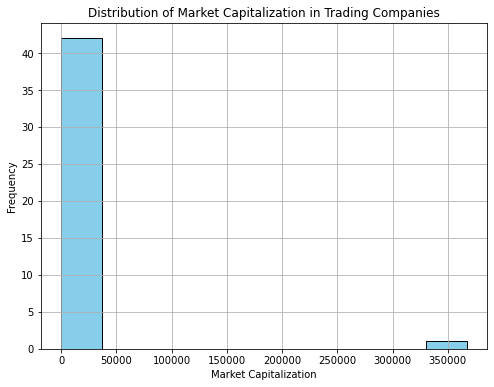

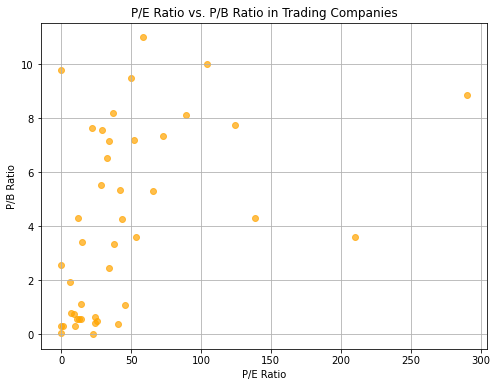

Industry Analysis: Transport Infra
          market_cap   pe_ratio   pb_ratio  div_yield  book_value         eps  \
count      16.000000  16.000000  16.000000  16.000000   16.000000   16.000000   
mean    25326.335625  15.704375   6.368125   0.245625   46.570907   -4.640625   
std     70529.522709  18.203162  13.226419   0.767437  170.322740   33.197970   
min        82.350000   0.000000   0.000000   0.000000 -350.868532 -120.600000   
25%       314.127500   0.000000   0.675000   0.000000    3.193000   -3.925000   
50%      1625.620000   6.265000   2.120000   0.000000   31.371736    0.800000   
75%      4380.165000  32.752500   5.932500   0.000000   45.610636    7.857500   
max    282319.360000  48.310000  54.050000   3.070000  518.435929   33.470000   

              roe  
count   16.000000  
mean     0.216369  
std     46.070334  
min   -111.318900  
25%     -2.697025  
50%     10.378000  
75%     17.970400  
max     63.257200  



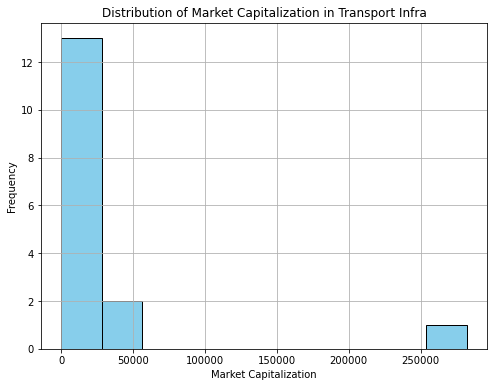

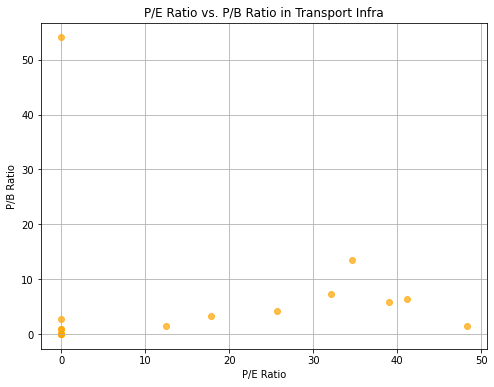

Industry Analysis: Water Utilities
       market_cap  pe_ratio  pb_ratio  div_yield  book_value   eps      roe
count        1.00      1.00       1.0        1.0    1.000000  1.00   1.0000
mean      4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
std           NaN       NaN       NaN        NaN         NaN   NaN      NaN
min       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
25%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
50%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
75%       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491
max       4523.73     72.96       2.7        0.0  269.870805  9.97  18.0491



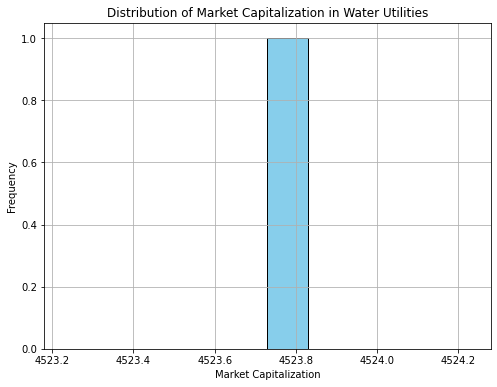

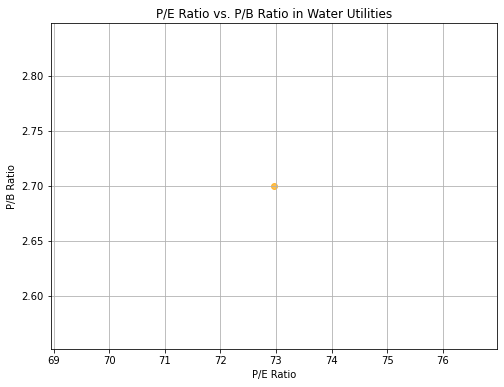

In [31]:
# Group the data by industry
industry_groups = stock.groupby('industry')

# Iterate over each industry group
for industry, industry_df in industry_groups:
    print(f"Industry Analysis: {industry}")
    print(industry_df.describe())  # Basic statistics for the industry
    print()

    # Plot histogram of market capitalization for the industry
    plt.figure(figsize=(8, 6))
    plt.hist(industry_df['market_cap'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Market Capitalization in {industry}')
    plt.xlabel('Market Capitalization')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Plot scatter plot of P/E ratio vs. P/B ratio for the industry
    plt.figure(figsize=(8, 6))
    plt.scatter(industry_df['pe_ratio'], industry_df['pb_ratio'], color='orange', alpha=0.7)
    plt.title(f'P/E Ratio vs. P/B Ratio in {industry}')
    plt.xlabel('P/E Ratio')
    plt.ylabel('P/B Ratio')
    plt.grid(True)
    plt.show()


### Company Analysis

In [32]:
# Company Analysis
# Calculate key financial metrics for each company
stock['earnings_yield'] = 1 / stock['pe_ratio']  # Earnings Yield = 1 / P/E ratio
stock['dividend_payout_ratio'] = stock['div_yield'] / stock['earnings_yield']  # Dividend Payout Ratio = Dividend Yield / Earnings Yield

# Display company analysis
print("Company Analysis:")
for index, row in stock.iterrows():
    print(f"Company: {row['stock_name']}")
    print(f"Industry: {row['industry']}")
    print(f"Market Cap: {row['market_cap']}")
    print(f"P/E Ratio: {row['pe_ratio']}")
    print(f"P/B Ratio: {row['pb_ratio']}")
    print(f"Dividend Yield: {row['div_yield']}")
    print(f"Earnings Yield: {row['earnings_yield']}")
    print(f"Dividend Payout Ratio: {row['dividend_payout_ratio']}")
    print()

# You can further analyze the data, calculate more metrics, and generate visualizations as needed


Company Analysis:
Company: Reliance Industries
Industry: Oil, Gas & Fuels
Market Cap: 1976492.87
P/E Ratio: 28.25
P/B Ratio: 2.63
Dividend Yield: 0.31
Earnings Yield: 0.035398230088495575
Dividend Payout Ratio: 8.7575

Company: Tata Consultancy Services
Industry: IT Services
Market Cap: 1510895.49
P/E Ratio: 33.67
P/B Ratio: 15.01
Dividend Yield: 2.79
Earnings Yield: 0.0297000297000297
Dividend Payout Ratio: 93.9393

Company: HDFC Bank
Industry: Banks
Market Cap: 1078493.29
P/E Ratio: 18.27
P/B Ratio: 2.47
Dividend Yield: 0.98
Earnings Yield: 0.05473453749315818
Dividend Payout Ratio: 17.904600000000002

Company: ICICI Bank
Industry: Banks
Market Cap: 717745.02
P/E Ratio: 16.91
P/B Ratio: 3.0
Dividend Yield: 0.78
Earnings Yield: 0.05913660555884092
Dividend Payout Ratio: 13.189800000000002

Company: Infosys
Industry: IT Services
Market Cap: 706572.19
P/E Ratio: 28.97
P/B Ratio: 10.09
Dividend Yield: 2.0
Earnings Yield: 0.03451846738004833
Dividend Payout Ratio: 57.93999999999999

Compa

P/E Ratio: 34.74
P/B Ratio: 7.63
Dividend Yield: 9.86
Earnings Yield: 0.028785261945883704
Dividend Payout Ratio: 342.5364

Company: Endurance Technologies (CN)
Industry: Auto Components
Market Cap: 25090.03
P/E Ratio: 41.35
P/B Ratio: 5.46
Dividend Yield: 0.39
Earnings Yield: 0.02418379685610641
Dividend Payout Ratio: 16.1265

Company: Hitachi Energy India
Industry: Electrical Equip.
Market Cap: 25152.46
P/E Ratio: 249.25
P/B Ratio: 20.54
Dividend Yield: 0.06
Earnings Yield: 0.004012036108324975
Dividend Payout Ratio: 14.955

Company: CreditAccess Grameen
Industry: Consumer Finance
Market Cap: 24825.52
P/E Ratio: 18.45
P/B Ratio: 4.28
Dividend Yield: 0.0
Earnings Yield: 0.05420054200542006
Dividend Payout Ratio: 0.0

Company: Hatsun Agro Product
Industry: Food Products
Market Cap: 24887.66
P/E Ratio: 103.65
P/B Ratio: 16.99
Dividend Yield: 0.54
Earnings Yield: 0.00964785335262904
Dividend Payout Ratio: 55.971000000000004

Company: NBCC (India)
Industry: Construction
Market Cap: 24228.

Dividend Yield: 0.29
Earnings Yield: 0.012701638511367967
Dividend Payout Ratio: 22.831699999999998

Company: Medplus Health Services
Industry: Consumer Retail
Market Cap: 8124.93
P/E Ratio: 138.43
P/B Ratio: 5.34
Dividend Yield: 0.0
Earnings Yield: 0.007223867658744491
Dividend Payout Ratio: 0.0

Company: Mastek
Industry: IT Services
Market Cap: 9530.46
P/E Ratio: 33.94
P/B Ratio: 5.32
Dividend Yield: 0.61
Earnings Yield: 0.029463759575721865
Dividend Payout Ratio: 20.7034

Company: Neuland Laboratories
Industry: Pharmaceuticals
Market Cap: 9173.76
P/E Ratio: 28.93
P/B Ratio: 8.1
Dividend Yield: 0.14
Earnings Yield: 0.034566194262011754
Dividend Payout Ratio: 4.0502

Company: CCL Products India
Industry: Food Products
Market Cap: 8605.58
P/E Ratio: 31.85
P/B Ratio: 5.43
Dividend Yield: 0.85
Earnings Yield: 0.03139717425431711
Dividend Payout Ratio: 27.0725

Company: Metropolis Healthcare
Industry: Health Care
Market Cap: 9152.7
P/E Ratio: 73.35
P/B Ratio: 8.75
Dividend Yield: 0.45
Ear

Dividend Payout Ratio: 0.0

Company: Inox Green Energy Services
Industry: Construction
Market Cap: 3602.55
P/E Ratio: 584.29
P/B Ratio: 2.74
Dividend Yield: 0.0
Earnings Yield: 0.0017114788889079054
Dividend Payout Ratio: 0.0

Company: HMA Agro Industries
Industry: Food Products
Market Cap: 3733.24
P/E Ratio: 33.89
P/B Ratio: 5.57
Dividend Yield: 0.38
Earnings Yield: 0.029507229271171435
Dividend Payout Ratio: 12.878200000000001

Company: Kirloskar Industries
Industry: Metals & Mining
Market Cap: 4078.94
P/E Ratio: 23.58
P/B Ratio: 1.01
Dividend Yield: 0.27
Earnings Yield: 0.04240882103477524
Dividend Payout Ratio: 6.3666

Company: Kaveri Seed Company
Industry: Food Products
Market Cap: 3775.0
P/E Ratio: 13.31
P/B Ratio: 2.28
Dividend Yield: 0.59
Earnings Yield: 0.07513148009015777
Dividend Payout Ratio: 7.8529

Company: Imagicaaworld Entertainment
Industry: Hotels & Leisure
Market Cap: 4063.86
P/E Ratio: 10.8
P/B Ratio: 5.18
Dividend Yield: 0.0
Earnings Yield: 0.09259259259259259
Divi

Company: Rama Steel Tubes
Industry: Metals & Mining
Market Cap: 1940.86
P/E Ratio: 57.85
P/B Ratio: 6.32
Dividend Yield: 0.0
Earnings Yield: 0.017286084701815037
Dividend Payout Ratio: 0.0

Company: HLV
Industry: Hotels & Leisure
Market Cap: 2374.65
P/E Ratio: 97.35
P/B Ratio: 5.62
Dividend Yield: 0.0
Earnings Yield: 0.010272213662044172
Dividend Payout Ratio: 0.0

Company: Pennar Industries
Industry: Metals & Mining
Market Cap: 1939.85
P/E Ratio: 20.83
P/B Ratio: 2.36
Dividend Yield: 0.0
Earnings Yield: 0.048007681228996645
Dividend Payout Ratio: 0.0

Company: Ador Welding
Industry: Machinery
Market Cap: 1959.76
P/E Ratio: 29.22
P/B Ratio: 5.94
Dividend Yield: 1.21
Earnings Yield: 0.034223134839151265
Dividend Payout Ratio: 35.3562

Company: Aeroflex Industries
Industry: Metals & Mining
Market Cap: 1969.55
P/E Ratio: 48.5
P/B Ratio: 7.19
Dividend Yield: 0.12
Earnings Yield: 0.020618556701030927
Dividend Payout Ratio: 5.82

Company: DCM Shriram Industries
Industry: Food Products
Market

Company: Shivalik Rasayan
Industry: Chemicals
Market Cap: 1046.67
P/E Ratio: 84.19
P/B Ratio: 2.83
Dividend Yield: 0.07
Earnings Yield: 0.01187789523696401
Dividend Payout Ratio: 5.8933

Company: Vertoz Advertising
Industry: Media
Market Cap: 1214.26
P/E Ratio: 70.7
P/B Ratio: 7.93
Dividend Yield: 0.0
Earnings Yield: 0.014144271570014143
Dividend Payout Ratio: 0.0

Company: Sandesh
Industry: Media
Market Cap: 992.24
P/E Ratio: 7.77
P/B Ratio: 0.89
Dividend Yield: 0.38
Earnings Yield: 0.1287001287001287
Dividend Payout Ratio: 2.9526

Company: Capital India Finance
Industry: Financial Services
Market Cap: 1073.12
P/E Ratio: 0.0
P/B Ratio: 1.73
Dividend Yield: 0.07
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Shiva Cement
Industry: Building Materials
Market Cap: 1005.42
P/E Ratio: 0.0
P/B Ratio: 0.0
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Faze Three
Industry: Household Durables
Market Cap: 1010.33
P/E Ratio: 19.24
P/B Ratio: 3.33
Dividend Y

Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Balaxi Pharmaceuticals
Industry: Health Care
Market Cap: 639.23
P/E Ratio: 0.0
P/B Ratio: 4.11
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Ind-Swift Laboratories
Industry: Pharmaceuticals
Market Cap: 627.21
P/E Ratio: 14.52
P/B Ratio: 1.15
Dividend Yield: 0.0
Earnings Yield: 0.06887052341597796
Dividend Payout Ratio: 0.0

Company: Hindustan Composites
Industry: Auto Components
Market Cap: 604.64
P/E Ratio: 16.83
P/B Ratio: 0.64
Dividend Yield: 0.49
Earnings Yield: 0.05941770647653001
Dividend Payout Ratio: 8.246699999999999

Company: Autoline Industries
Industry: Auto Components
Market Cap: 592.63
P/E Ratio: 165.33
P/B Ratio: 7.48
Dividend Yield: 0.0
Earnings Yield: 0.0060485090425210185
Dividend Payout Ratio: 0.0

Company: Mindteck (India)
Industry: IT Services
Market Cap: 606.0
P/E Ratio: 23.09
P/B Ratio: 2.99
Dividend Yield: 0.42
Earnings Yield: 0.043308791684711995
Dividend

Company: Rohit Ferro-Tech
Industry: Metals & Mining
Market Cap: 323.7
P/E Ratio: 0.0
P/B Ratio: 0.0
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Birla Precision Technologies
Industry: Machinery
Market Cap: 476.74
P/E Ratio: 46.82
P/B Ratio: 3.52
Dividend Yield: 0.0
Earnings Yield: 0.021358393848782572
Dividend Payout Ratio: 0.0

Company: Saraswati Commercial (India)
Industry: Capital Markets
Market Cap: 424.03
P/E Ratio: 6.61
P/B Ratio: 0.84
Dividend Yield: 0.0
Earnings Yield: 0.151285930408472
Dividend Payout Ratio: 0.0

Company: Natural Capsules
Industry: Pharmaceuticals
Market Cap: 322.43
P/E Ratio: 50.57
P/B Ratio: 2.55
Dividend Yield: 0.29
Earnings Yield: 0.019774569903104607
Dividend Payout Ratio: 14.665299999999998

Company: MK Exim (India)
Industry: Apparel & Luxury
Market Cap: 319.43
P/E Ratio: 19.21
P/B Ratio: 4.62
Dividend Yield: 0.0
Earnings Yield: 0.052056220718375845
Dividend Payout Ratio: 0.0

Company: Gillanders Arbuthnot & Co
Industry: I

Dividend Payout Ratio: 17.6649

Company: Smartlink Holdings
Industry: Tech Hardware
Market Cap: 172.22
P/E Ratio: 1726.5
P/B Ratio: 0.94
Dividend Yield: 0.0
Earnings Yield: 0.0005792064871126556
Dividend Payout Ratio: 0.0

Company: Indsil Hydro Power & Manganese
Industry: Metals & Mining
Market Cap: 164.91
P/E Ratio: 0.0
P/B Ratio: 1.64
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Kakatiya Cement Sugar & Industries
Industry: Building Materials
Market Cap: 179.84
P/E Ratio: 0.0
P/B Ratio: 0.79
Dividend Yield: 1.3
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Praxis Home Retail
Industry: Specialty Retail
Market Cap: 316.8
P/E Ratio: 0.0
P/B Ratio: 34.76
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Astron Paper & Board Mill
Industry: Paper & Wood Prods
Market Cap: 144.66
P/E Ratio: 0.0
P/B Ratio: 0.93
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: BLS Infotech
Industry: Consumer Servic


Company: Ind Swift
Industry: Pharmaceuticals
Market Cap: 98.2
P/E Ratio: 3.3
P/B Ratio: 0.0
Dividend Yield: 0.0
Earnings Yield: 0.30303030303030304
Dividend Payout Ratio: 0.0

Company: Kanishk Steel Industries
Industry: Metals & Mining
Market Cap: 97.66
P/E Ratio: 20.69
P/B Ratio: 1.03
Dividend Yield: 0.0
Earnings Yield: 0.04833252779120348
Dividend Payout Ratio: 0.0

Company: Marshall Machines
Industry: Machinery
Market Cap: 95.72
P/E Ratio: 0.0
P/B Ratio: 2.11
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Tatia Global Vennture
Industry: Textiles
Market Cap: 100.52
P/E Ratio: 66.3
P/B Ratio: 3.83
Dividend Yield: 0.0
Earnings Yield: 0.015082956259426848
Dividend Payout Ratio: 0.0

Company: Future Lifestyle Fashions
Industry: Specialty Retail
Market Cap: 53.67
P/E Ratio: 0.0
P/B Ratio: 0.0
Dividend Yield: 0.0
Earnings Yield: inf
Dividend Payout Ratio: 0.0

Company: Futuristic Solutions
Industry: Financial Services
Market Cap: 111.96
P/E Ratio: 38.88
P/B R

In [33]:
import pandas as pd


price = pd.DataFrame(stock['pb_ratio'] * stock['book_value'], columns=['stock_price'])

price


stock_price
0     2920.197349
1     4128.406033
2     1422.130168
3     1023.860686
4     1703.232576
...           ...
2669    32.831879
2670     4.853512
2671     1.080590
2672    51.783832
2673     1.161114

[2341 rows x 1 columns]

In [36]:
stock.isna().sum()

stock_name               0
industry                 0
cap                      0
market_cap               0
pe_ratio                 0
pb_ratio                 0
div_yield                0
book_value               0
eps                      0
roe                      0
earnings_yield           0
dividend_payout_ratio    0
price                    0
dtype: int64

In [37]:
stock[stock['industry'] == 'Chemicals']

stock_name   industry        cap  market_cap  pe_ratio  \
20                   Asian Paints  Chemicals  Large Cap   288497.92     53.06   
54            Pidilite Industries  Chemicals  Large Cap   137820.42     80.50   
115                           SRF  Chemicals  Large Cap    70528.36     47.79   
117           Berger Paints India  Chemicals  Large Cap    65596.41     58.01   
132        Solar Industries India  Chemicals  Large Cap    60601.19     75.10   
...                           ...        ...        ...         ...       ...   
2499              Bright Brothers  Chemicals  Small Cap      101.42      0.00   
2527              Agro Phos India  Chemicals  Small Cap      100.15      0.00   
2566  Kkalpana Industries (India)  Chemicals  Small Cap       94.36    501.50   
2640     Aeonx Digital Technology  Chemicals  Small Cap       79.84     65.24   
2661        Shreyas Intermediates  Chemicals  Small Cap       76.03      0.00   

      pb_ratio  div_yield  book_value    eps      roe  earnings_yield  \
20       17.42       0.85  172.664595  56.69  30.5677        0.018847   
54       18.31       0.41  148.005165  33.66  19.9997        0.012422   
115       6.50       0.30  366.055536  49.79  15.9736        0.020925   
117      13.55       0.47   41.535406   9.70  21.3265        0.017238   
132      21.20       0.12  315.910739  89.18  28.2728        0.013316   
...        ...        ...         ...    ...      ...             ...   
2499      1.48       0.56  120.905458  -9.94  -9.5841             inf   
2527      1.81       0.00   27.351238  -1.39   8.1097             inf   
2566      2.69       0.00    3.726862   0.02   3.6643        0.001994   
2640      1.85       0.58   94.045472   2.66   5.4385        0.015328   
2661      5.16       0.00    2.078065  -0.25  -9.1880             inf   

      dividend_payout_ratio        price  
20                  45.1010  3007.817241  
54                  33.0050  2709.974573  
115                 14.3370  2379.360985  
117                 27.2647   562.804753  
132                  9.0120  6697.307658  
...                     ...          ...  
2499                 0.0000   178.940077  
2527                 0.0000    49.505741  
2566                 0.0000    10.025260  
2640                37.8392   173.984124  
2661                 0.0000    10.722815  

[231 rows x 13 columns]

In [38]:
stock[stock['industry']=='Banks']

stock_name industry        cap  market_cap  pe_ratio  \
2                       HDFC Bank    Banks  Large Cap  1078493.29     18.27   
3                      ICICI Bank    Banks  Large Cap   717745.02     16.91   
7             State Bank of India    Banks  Large Cap   673585.09     10.56   
13            Kotak Mahindra Bank    Banks  Large Cap   345036.56     19.78   
17                      Axis Bank    Banks  Large Cap   329850.18     24.57   
48           Punjab National Bank    Banks  Large Cap   143308.37     18.78   
56                  IndusInd Bank    Banks  Large Cap   116262.96     13.41   
66                 Bank of Baroda    Banks  Large Cap   142496.88      7.54   
72            Union Bank of India    Banks  Large Cap   107406.37      8.09   
75                    Canara Bank    Banks  Large Cap   106253.61      7.25   
83                      IDBI Bank    Banks  Large Cap    97836.11     18.31   
88           Indian Overseas Bank    Banks  Large Cap   129027.87     51.32   
110                      UCO Bank    Banks  Large Cap    72405.28     42.95   
112                      Yes Bank    Banks  Large Cap    81745.39     78.94   
113                   Indian Bank    Banks  Large Cap    69685.18      9.12   
127                 Bank of India    Banks  Large Cap    65626.71     10.25   
136         Central Bank of India    Banks  Large Cap    57919.23     23.74   
141               IDFC First Bank    Banks  Large Cap    58587.39     19.37   
169            Punjab & Sind Bank    Banks  Large Cap    45722.95     49.97   
176           Bank of Maharashtra    Banks  Large Cap    43989.49     11.95   
192         AU Small Finance Bank    Banks  Large Cap    38879.20     24.48   
199                  Federal Bank    Banks  Large Cap    40067.45     10.37   
221                  Bandhan Bank    Banks  Large Cap    32371.40     10.85   
347          Jammu & Kashmir Bank    Banks    Mid Cap    15862.53      9.85   
351                      RBL Bank    Banks    Mid Cap    15844.97     13.27   
379              Karur Vysya Bank    Banks    Mid Cap    15138.31     10.18   
435    Equitas Small Finance Bank    Banks    Mid Cap    12160.84     15.57   
446    Ujjivan Small Finance Bank    Banks    Mid Cap    10970.34      8.69   
472               City Union Bank    Banks    Mid Cap    10357.84     10.58   
482                Karnataka Bank    Banks    Mid Cap     8766.13      6.33   
555      Tamilnad Mercantile Bank    Banks    Mid Cap     7869.28      7.34   
568             South Indian Bank    Banks    Mid Cap     7236.70      6.49   
586    Utkarsh Small Finance Bank    Banks    Mid Cap     6215.51     13.19   
601                      CSB Bank    Banks    Mid Cap     6320.96     11.06   
740                      DCB Bank    Banks  Small Cap     4251.47      8.14   
811       ESAF Small Finance Bank    Banks  Small Cap     3288.41      6.80   
917            Fino Payments Bank    Banks  Small Cap     2594.21     31.21   
1095  Suryoday Small Finance Bank    Banks  Small Cap     1835.57      9.46   
1284               Dhanlaxmi Bank    Banks  Small Cap     1208.89     13.05   

      pb_ratio  div_yield  book_value     eps        roe  earnings_yield  \
2         2.47       0.98  575.761202   77.72  13.498984        0.054735   
3         3.00       0.78  341.286895   60.47  17.719490        0.059137   
7         1.84       1.50  410.545024   71.48  18.845496        0.094697   
13        2.87       0.09  604.919413   87.75  14.506689        0.050556   
17        2.22       0.09  481.080790   43.52  15.967805        0.040700   
48        1.47       0.50   88.801984    6.93   7.802557        0.053248   
56        2.00       0.93  745.650979  111.44  14.945189        0.074571   
66        1.25       2.00  220.194928   36.53  16.589068        0.132626   
72        1.22       1.91  118.496066   17.92  15.120033        0.123609   
75        1.30       2.05  450.903375   80.83  17.925874        0.137931   
83        2.37       1.10 

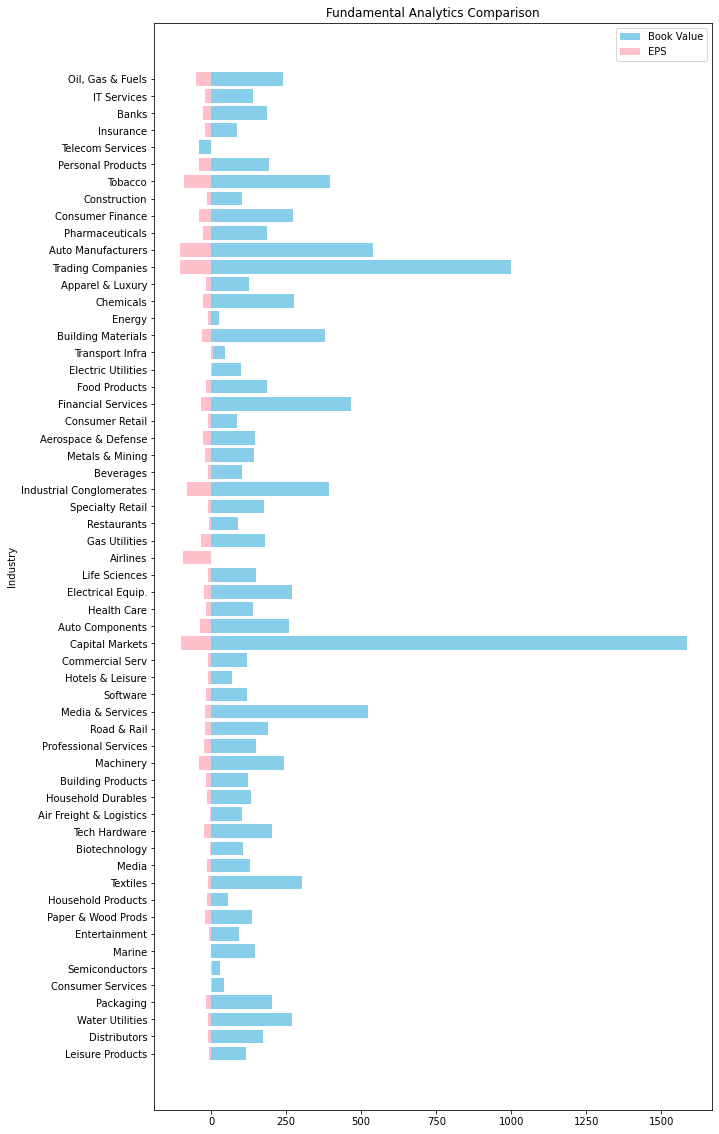

In [40]:
import matplotlib.pyplot as plt

# Sample data for demonstration
categories = stock['industry'].unique()  # Example: Taking the first 5 unique industries
male_data = stock.groupby('industry')['book_value'].mean().loc[categories]  # Example: Mean book value by industry
female_data = stock.groupby('industry')['eps'].mean().loc[categories]  # Example: Mean EPS by industry

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 20))

# Plot the male population pyramid
ax.barh(categories, male_data, color='skyblue', label='Book Value')

# Plot the female population pyramid with negative values to mirror the bars
ax.barh(categories, [-x for x in female_data], color='pink', label='EPS')

# Set the y-axis label
ax.set_ylabel('Industry')

# Set the title
ax.set_title('Fundamental Analytics Comparison')

# Show legend
ax.legend()

# Invert y-axis for better readability
ax.invert_yaxis()

# Show plot
plt.show()
